# ATDS Project P4 code (except GNN, LLN, and Data Visualization)


Team Members:
Aadithya kandeth - 6980-2791
Anol Kurian V - 56268544

In [ ]:
# Project Introduction and Instructions

# Project Title: Predictive Analysis of Global Societal Unrest
# Description:
# This project aims to predict and analyze global societal unrest events (like protests, attacks, 
# and arrests) using advanced machine learning models. The primary data sources include the 
# Global Database of Events, Language, and Tone (GDELT) and the Armed Conflict Location & 
# Event Data Project (ACLED). The project employs models like XGBoost, Graph Neural Networks (GNN), 
# and Large Language Models (LLM) to analyze patterns and forecast potential unrest events.

# Instructions:

# 1. Data Preprocessing:
#    - Load and combine data from GDELT and ACLED.
#    - Clean the data and split it into training, validation, and test sets.

# 2. Model Training:
#    - Train the model on the preprocessed data.

# 3. Data Visualization and Analysis:
#    - Visualize the data before and after model training to understand patterns.
#    - Analyze the results from each model for insights and accuracy.

# 4. Integration and Output:
#    - Combine the results from all models.
#    - Generate comprehensive insights and visualizations for decision-making.

# Note: Ensure all necessary libraries and frameworks (like xgboost, torch, dgl, openai) are installed.


#

## Data Preprocessing

In [98]:
import pandas as pd


df1 = pd.read_csv("./Data/GDELT_merged_1998to2023.csv", sep='\t')
column_names = [
    'GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
    'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
    'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
    'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
    'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
    'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
    'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
    'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
    'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
    'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
    'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long',
    'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName',
    'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat',
    'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type',
    'ActionGeo_FullName', 'ActionGeo_CountryCode', 'ActionGeo_ADM1Code',
    'ActionGeo_Lat', 'ActionGeo_Long', 'ActionGeo_FeatureID',
    'DATEADDED', 'SOURCEURL'
]

df1.columns = column_names
columns_to_drop = ['SOURCEURL', 'DATEADDED','GLOBALEVENTID','FractionDate','Actor1Name', 'Actor1Religion2Code', 'Actor1Type2Code', 'Actor1Type3Code'
                  ,'Actor2Name', 'Actor2Religion2Code', 'Actor2Type2Code', 'Actor2Type3Code','Actor1Geo_FullName','Actor1Geo_ADM1Code','Actor1Geo_FeatureID',
                  'Actor2Geo_FullName','Actor2Geo_ADM1Code','Actor2Geo_FeatureID','ActionGeo_FullName','ActionGeo_ADM1Code','ActionGeo_FeatureID']
df1 = df1.drop(columns=columns_to_drop)

df1['importance'] = (df1['NumMentions'] + df1['NumSources'] + df1['NumArticles']) / 3


def get_top_100_entries(group):
    return group.nlargest(100, 'importance')
df1['SQLDATE'] = pd.to_datetime(df1['SQLDATE'], format='%Y%m%d', errors='coerce')
top_100_per_day = df1.groupby('SQLDATE', group_keys=False, sort=True).apply(get_top_100_entries)


print(df1.shape)
print(df1.columns)

C:\Users\aadit\AppData\Local\Temp\ipykernel_13064\3443576277.py:4: DtypeWarning: Columns (24,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("C:/gdelt/gdelt_data_combined/GDELT_merged_1998to2023.csv", sep='\t')


(2857546, 38)
Index(['SQLDATE', 'MonthYear', 'Year', 'Actor1Code', 'Actor1CountryCode',
       'Actor1KnownGroupCode', 'Actor1EthnicCode', 'Actor1Religion1Code',
       'Actor1Type1Code', 'Actor2Code', 'Actor2CountryCode',
       'Actor2KnownGroupCode', 'Actor2EthnicCode', 'Actor2Religion1Code',
       'Actor2Type1Code', 'IsRootEvent', 'EventCode', 'EventBaseCode',
       'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions',
       'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type',
       'Actor1Geo_CountryCode', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor2Geo_Type', 'Actor2Geo_CountryCode', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'ActionGeo_Type', 'ActionGeo_CountryCode',
       'ActionGeo_Lat', 'ActionGeo_Long', 'importance'],
      dtype='object')


In [99]:
# to be removed
filtered_df1 = top_100_per_day[top_100_per_day["MonthYear"] == 202201]



filtered_df1['scaled_mood'] =  (filtered_df1["GoldsteinScale"]* filtered_df1["importance"] + filtered_df1["AvgTone"]* filtered_df1["importance"])/2
columns_to_drop = ['MonthYear','Year','GoldsteinScale','NumMentions','NumSources', 'NumArticles','AvgTone','Actor1Geo_Lat','Actor1Geo_Long',
                  'Actor2Geo_Lat','Actor2Geo_Long','ActionGeo_Lat','ActionGeo_Long', 'Actor1Code','Actor1KnownGroupCode', 'Actor1EthnicCode', 'Actor1Religion1Code',
                  'Actor2Code','Actor2KnownGroupCode', 'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor1Geo_Type', 'Actor2Geo_Type']
filtered_df1 = filtered_df1.drop(columns=columns_to_drop)


print(filtered_df1.shape)
print(filtered_df1.head().to_string(index=False))


(3000, 16)
   SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode Actor2Type1Code  IsRootEvent EventCode EventBaseCode EventRootCode  QuadClass Actor1Geo_CountryCode Actor2Geo_CountryCode  ActionGeo_Type ActionGeo_CountryCode  importance  scaled_mood
2022-01-01               NaN             COP               NaN             NaN            1        10            10             1          1                   NaN                   NaN               0                   NaN 2061.666667 -5060.735897
2022-01-01               USA             MNC               NaN             NaN            1       160           160            16          4                    US                   NaN               2                    US 1262.333333 -4852.576083
2022-01-01               NaN             COP               NaN             NaN            1       114           114            11          3                   NaN                   NaN               0                   NaN 1159.666667 -3814.6317

C:\Users\aadit\AppData\Local\Temp\ipykernel_13064\1849667737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['scaled_mood'] =  (filtered_df1["GoldsteinScale"]* filtered_df1["importance"] + filtered_df1["AvgTone"]* filtered_df1["importance"])/2


In [100]:
import os
import sys
import pandas as pd


df2 = pd.read_json("./Data/acled_all_data.json")
print(df2.columns)
# print(df2.head().to_string(index=False))

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')


In [101]:
date_country_map = filtered_df1.groupby('SQLDATE')['ActionGeo_CountryCode'].agg(set).to_dict()
print(date_country_map)

{Timestamp('2022-01-01 00:00:00'): {'US', 'UP', 'RS', 'AS', 'SF', 'UK', 'KN', 'CH', 'BR', 'AE', 'IN', 'RO', nan, 'PL', 'IT', 'FR'}, Timestamp('2022-01-02 00:00:00'): {'US', 'GZ', 'AS', 'SF', 'UK', 'KN', 'EI', 'IS', nan, 'KS', 'SU'}, Timestamp('2022-01-03 00:00:00'): {'US', 'SZ', 'AS', 'RS', 'GM', 'KN', 'UK', 'IS', 'IZ', nan, 'KS', 'BR', 'SU', 'IR', 'SN'}, Timestamp('2022-01-04 00:00:00'): {'US', 'JA', 'IC', 'SF', 'UK', 'CH', 'IZ', nan, 'CB', 'FR'}, Timestamp('2022-01-05 00:00:00'): {'US', 'AS', 'UK', 'KN', 'VE', 'SF', 'IS', 'CH', 'HK', 'KZ', nan, 'LT', 'FR'}, Timestamp('2022-01-06 00:00:00'): {'US', 'RS', 'GM', 'UK', 'CH', 'RE', 'IS', 'BF', 'KZ', nan, 'PK'}, Timestamp('2022-01-07 00:00:00'): {'RS', 'US', 'GM', 'UK', 'MX', 'KZ', nan, 'CB', 'FR'}, Timestamp('2022-01-08 00:00:00'): {'RS', 'US', 'UP', 'ER', 'AS', 'ET', 'UK', 'CH', nan, 'KZ', 'CB', 'AL', 'TH', 'FR'}, Timestamp('2022-01-09 00:00:00'): {'US', 'UP', 'RS', 'UK', 'VT', 'SP', 'OD', 'KZ', nan, 'BR', 'SU', 'PE', 'CY'}, Timestamp('2

In [102]:
country_map={'4':'AF','8':'AL','12':'AG','16':'AQ','20':'AN','24':'AO','660':'AV','28':'AC','32':'AR','51':'AM','533':'AA','36':'AS','40':'AU','31':'AJ','44':'BF','48':'BA','50':'BG','52':'BB','112':'BO','56':'BE','84':'BZ','204':'BN','60':'BM','64':'BT','68':'BL','70':'BK','72':'BC','76':'BR','92':'VI','96':'BX','100':'BU','854':'UV','116':'CB','120':'CM','124':'CA','132':'CV','136':'CJ','140':'CT','148':'CD','152':'BL','156':'CH','162':'KT','166':'CK','170':'CO','174':'CN','178':'CF','184':'CW','188':'CS','384':'CI','191':'HR','192':'CU','196':'CY','203':'EZ','208':'DA','262':'DJ','212':'DO','214':'DR','218':'EC','818':'EG','222':'ES','226':'EK','232':'ER','233':'EN','231':'ET','238':'FA','234':'FO','242':'FJ','246':'FI','250':'FR','254':'FG','258':'FP','266':'GB','270':'GA','268':'GE','276':'GM','288':'GH','292':'GI','300':'GR','304':'GL','308':'GJ','312':'GP','316':'GQ','320':'GT','316':'GU','324':'GN','624':'PU','328':'GY','332':'HA','336':'VT','340':'HO','348':'HU','352':'IC','356':'IN','360':'ID','364':'IR','368':'IZ','372':'EI','376':'IS','380':'IT','388':'JM','392':'JA','400':'JO','398':'KZ','404':'KE','408':'KR','410':'KS','414':'KU','417':'KG','418':'LA','428':'LG','422':'LE','430':'LT','438':'LU','440':'LV','442':'LT','807':'MK','450':'MA','454':'MI','458':'MY','462':'MV','466':'ML','470':'MT','474':'MB','478':'MR','480':'MP','175':'YT','484':'MX','583':'FM','498':'MD','492':'MC','500':'MS','504':'MO','508':'MZ','104':'BM','516':'WA','520':'NR','524':'NP','528':'NL','530':'NT','540':'NC','554':'NZ','558':'NU','566':'NG','562':'NE','566':'NI','570':'NU','574':'NF','580':'CQ','578':'NO','512':'MU','586':'PK','585':'PS','591':'PM','598':'PP','600':'PA','604':'PE','608':'RP','612':'PC','616':'PL','620':'PO','630':'RQ','634':'QA','638':'RE','642':'RO','643':'RS','646':'RW','659':'SC','662':'ST','666':'SB','670':'VC','674':'SM','678':'TP','682':'SA','686':'SG','688':'SR','703':'SV','705':'SI','090':'BP','706':'SO','710':'SF','724':'SP','144':'CE','729':'SU','740':'NS','744':'SV','748':'WZ','752':'SW','756':'SZ','760':'SY','158':'TW','762':'TI','834':'TZ','764':'TH','768':'TO','772':'TL','776':'TN','780':'TD','788':'TS','792':'TU','795':'TX','796':'TK','798':'TV','800':'UG','804':'UP','784':'TC','826':'UK','840':'US','858':'UY','860':'UZ','548':'NH','862':'VE','704':'VM','850':'VQ','876':'WF','732':'WI','882':'WS','887':'YM','710':'ZA','894':'ZR','716':'ZI','434':'LY','275':'WE','180':'CG','499':'MJ','728':'OD','0':'XK','108':'BI','663':'MF','496':'MN','831':'GG','694':'SL','296':'KI','626':'TT','531':'CW','426':'LT'}
reverse_country_map = {
    'AF': '4',
    'AL': '8',
    'AG': '12',
    'AQ': '16',
    'AN': '20',
    'AO': '24',
    'AV': '660',
    'AC': '28',
    'AR': '32',
    'AM': '51',
    'AA': '533',
    'AS': '36',
    'AU': '40',
    'AJ': '31',
    'BF': '44',
    'BA': '48',
    'BG': '50',
    'BB': '52',
    'BO': '112',
    'BE': '56',
    'BZ': '84',
    'BN': '204',
    'BM': '60',
    'BT': '64',
    'BL': '68',
    'BK': '70',
    'BC': '72',
    'BR': '76',
    'VI': '92',
    'BX': '96',
    'BU': '100',
    'UV': '854',
    'CB': '116',
    'CM': '120',
    'CA': '124',
    'CV': '132',
    'CJ': '136',
    'CT': '140',
    'CD': '148',
    'BL': '152',
    'CH': '156',
    'KT': '162',
    'CK': '166',
    'CO': '170',
    'CN': '174',
    'CF': '178',
    'CW': '184',
    'CS': '188',
    'CI': '384',
    'HR': '191',
    'CU': '192',
    'CY': '196',
    'EZ': '203',
    'DA': '208',
    'DJ': '262',
    'DO': '212',
    'DR': '214',
    'EC': '218',
    'EG': '818',
    'ES': '222',
    'EK': '226',
    'ER': '232',
    'EN': '233',
    'ET': '231',
    'FA': '238',
    'FO': '234',
    'FJ': '242',
    'FI': '246',
    'FR': '250',
    'FG': '254',
    'FP': '258',
    'GB': '266',
    'GA': '270',
    'GE': '268',
    'GM': '276',
    'GH': '288',
    'GI': '292',
    'GR': '300',
    'GL': '304',
    'GJ': '308',
    'GP': '312',
    'GQ': '316',
    'GT': '320',
    'GU': '316',
    'GN': '324',
    'PU': '624',
    'GY': '328',
    'HA': '332',
    'VT': '336',
    'HO': '340',
    'HU': '348',
    'IC': '352',
    'IN': '356',
    'ID': '360',
    'IR': '364',
    'IZ': '368',
    'EI': '372',
    'IS': '376',
    'IT': '380',
    'JM': '388',
    'JA': '392',
    'JO': '400',
    'KZ': '398',
    'KE': '404',
    'KR': '408',
    'KS': '410',
    'KU': '414',
    'KG': '417',
    'LA': '418',
    'LG': '428',
    'LE': '422',
    'LT': '430',
    'LU': '438',
    'LV': '440',
    'LT': '442',
    'MK': '807',
    'MA': '450',
    'MI': '454',
    'MY': '458',
    'MV': '462',
    'ML': '466',
    'MT': '470',
    'MB': '474',
    'MR': '478',
    'MP': '480',
    'YT': '175',
    'MX': '484',
    'FM': '583',
    'MD': '498',
    'MC': '492',
    'MS': '500',
    'MO': '504',
    'MZ': '508',
    'BM': '104',
    'WA': '516',
    'NR': '520',
    'NP': '524',
    'NL': '528',
    'NT': '530',
    'NC': '540',
    'NZ': '554',
    'NU': '558',
    'NG': '566',
    'NE': '562',
    'NI': '566',
    'NU': '570',
    'NF': '574',
    'CQ': '580',
    'NO': '578',
    'MU': '512',
    'PK': '586',
    'PS': '585',
    'PM': '591',
    'PP': '598',
    'PA': '600',
    'PE': '604',
    'RP': '608',
    'PC': '612',
    'PL': '616',
    'PO': '620',
    'RQ': '630',
    'QA': '634',
    'RE': '638',
    'RO': '642',
    'RS': '643',
    'RW': '646',
    'SC': '659',
    'ST': '662',
    'SB': '666',
    'VC': '670',
    'SM': '674',
    'TP': '678',
    'SA': '682',
    'SG': '686',
    'SR': '688',
    'SV': '703',
    'SI': '705',
    'BP': '090',
    'SO': '706',
    'SF': '710',
    'SP': '724',
    'CE': '144',
    'SU': '729',
    'NS': '740',
    'SV': '744',
    'WZ': '748',
    'SW': '752',
    'SZ': '756',
    'SY': '760',
    'TW': '158',
    'TI': '762',
    'TZ': '834',
    'TH': '764',
    'TO': '768',
    'TL': '772',
    'TN': '776',
    'TD': '780',
    'TS': '788',
    'TU': '792',
    'TX': '795',
    'TK': '796',
    'TV': '798',
    'UG': '800',
    'UP': '804',
    'TC': '784',
    'UK': '826',
    'US': '840',
    'UY': '858',
    'UZ': '860',
    'NH': '548',
    'VE': '862',
    'VM': '704',
    'VQ': '850',
    'WF': '876',
    'WI': '732',
    'WS': '882',
    'YM': '887',
    'ZA': '710',
    'ZR': '894',
    'ZI': '716',
    'LY': '434',
    'WE': '275',
    'CG': '180',
    'MJ': '499',
    'OD': '728',
    'XK': '0',
    'BI': '108',
    'MF': '663',
    'MN': '496',
    'GG': '831',
    'SL': '694',
    'KI': '296',
    'TT': '626',
    'CW': '531',
    'LT': '426'
}

In [103]:
event_index = {
    "Government regains territory": "0",
    "Non-state actor overtakes territory": "1",
    "Armed clash": "2",
    "Excessive force against protesters": "3",
    "Protest with intervention": "4",
    "Peaceful protest": '5',
    "Violent demonstration": "6",
    "Mob violence": "7",
    "Chemical weapon": "8",
    "Air/drone strike": "9",
    "Suicide bomb": "10",
    "Shelling/artillery/missile attack": "11",
    "Remote explosive/landmine/IED": "12",
    "Grenade": "13",
    "Sexual violence": "14",
    "Attack": "15",
    "Abduction/forced disappearance": "16",
    "Agreement": "17",
    "Arrests": "18",
    "Change to group/activity": "19",
    "Disrupted weapons use": "20",
    "Headquarters or base established": "21",
    "Looting/property destruction": "22",
    "Non-violent transfer of territory": "23",
    "Other": "24"
}


In [104]:
xydf1 = filtered_df1

for i in range(25):
    column_name = f'y{i}'  # Generate column name (y0, y1, ..., y24)
    xydf1[column_name] = 0

In [105]:
df2['event_date'] = pd.to_datetime(df2['event_date'])

In [106]:
xydf1_temp = xydf1

for index, row in df2.iterrows():
    date = row['event_date']
    country = row['iso']
    print(row['country'])
    country_fips = country_map[str(country)] 
    sub_event_type = row['sub_event_type']
    column = 'y'+ str(event_index[sub_event_type])
    
    # Check if the associated country is in the hashmap value for the date key
    if country_fips in date_country_map.get(date, []):
        # If it's there, print the row
        
        filter1 = xydf1['SQLDATE'] == date
        filter2 = xydf1['ActionGeo_CountryCode'] == country_fips
        filter3 = xydf1['scaled_mood'] < 0

        xydf1_temp.loc[filter1 & filter2 & filter3, column] = 1
        
        #print(row)

Burkina Faso
Burkina Faso
Burkina Faso
Burkina Faso
Ghana
Mali
Mali
Nigeria
Nigeria
Nigeria
Tunisia
Ivory Coast
Niger
Nigeria
Central African Republic
Nigeria
Nigeria
Morocco
Algeria
Algeria
Libya
Nigeria
Nigeria
Burkina Faso
Burkina Faso
Iran
Israel
Palestine
Turkey
Turkey
Turkey
Israel
Iran
Lebanon
Palestine
Turkey
Costa Rica
Haiti
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Cuba
Cuba
Dominican Republic
Mexico
Puerto Rico
Puerto Rico
El Salvador
El Salvador
El Salvador
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
El Salvador
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Trinidad and Tobago
Mexico
Mexico
Sudan
Tanzania
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
eSwatini
Iraq
Syria
Syria
Syria
Syria
Syria
Syria
Iraq
Iraq
Iraq
Syria
Syria
Syria
Iraq
Syria
Syria
Argentina
Colombia
Brazil
Brazil
Brazil
Brazil
Brazil
Venezuela
Venezuela
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Argentina
Peru
Bolivi

Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Iran
Germany
Italy
Spain
Venezuela
Palestine
Palestine
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Democratic Republic of Congo
Israel
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Czech Republic
Nepal
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Mauritania
Brazil
Brazil
Brazil
Democratic Republic of Congo
Honduras
Burkina Faso
Germany
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
France
Austria
Sp

Philippines
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
Indonesia
Costa Rica
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Colombia
Colombia
Colombia
Colombia
Colombia
Colombia
Colombia
Colombia
Myanmar
Madagascar
Indonesia
Nepal
Indonesia
Indonesia
Myanmar
Nepal
Nepal
Nepal
Nepal
India
India
India
India
India
Israel
Mali
Italy
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Uganda
Yemen
Brazil
Iran
Iran
India
Spain
Spain
Brazil
Venezuela
Venezuela
Venezuela
Palestine
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Israel
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Russia
Nepal
Myanmar
Myanmar
Myanmar
Myanmar
Democratic Republic of Congo
Honduras
Honduras
Burkina Faso
Burkina Faso
Burkina Faso
Myanmar
Moldova
United States
United States
United States
Un

Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Argentina
Argentina
Chile
Colombia
Bolivia
Bolivia
Bolivia
Bolivia
Argentina
Bolivia
Brazil
Brazil
Brazil
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Brazil
Venezuela
Argentina
Argentina
Paraguay
Colombia
Guatemala
Guatemala
Guatemala
Guatemala
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Panama
Mexico
Mexico
Mexico
Mexico
Mexico
Guatemala
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Puerto Rico
Mexico
Mexico
Mexico
Mexico
Haiti
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Bahamas
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatema

China
China
China
El Salvador
Colombia
Myanmar
Chile
Chile
South Sudan
Myanmar
Syria
South Sudan
South Sudan
India
Pakistan
Pakistan
Pakistan
Niger
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Guatemala
Mexico
Afghanistan
Canada
Democratic Republic of Congo
South Korea
Somalia
Somalia
Somalia
Somalia
Somalia
Somalia
Somalia
Somalia
India
Peru
Myanmar
Myanmar
Myanmar
Philippines
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Indonesia
Colombia
Colombia
Cameroon
Puerto Rico
Mexico
South Africa
South Africa
India
India
Nepal
Nepal
Nepal
Nepal
Nepal
Nepal
India
Venezuela
Venezuela
Nigeria
Syria
Italy
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
India
India
Indonesia
Uganda
Uganda
Uganda
Uganda


Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Yemen
Cambodia
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Thailand
Myanmar
Myanmar
Malaysia
Malaysia
Indonesia
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
South Korea
Finland
Finland
Finland
Sweden
Russia
Russia
Russia
Kyrgyzstan
Norway
Serbia
Czech Republic
Czech Republic
Czech Republic
Czech Republic
Czech Republic
Czech Republic
Czech Republic
Belarus
Belarus
Serbia
Estonia
Poland
Norway
Georgia
Georgia
Norway
Norway
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Russia
Finland
Montenegro
Albania
Kazakhstan
Russia
Kyrgyzstan
Montenegro
Montenegro
Montenegro
Montenegro
Montenegro
Montenegro
Montenegro
Montenegro
Hungary
Austria
Austria
Germany
Germany
Germany
Germany
Germany
Germany


United States
Greece
Japan
Myanmar
Germany
United States
Ukraine
Colombia
Belize
Belize
Myanmar
Venezuela
South Africa
Nigeria
Brazil
Mexico
Mexico
Myanmar
Myanmar
Zambia
Germany
France
Honduras
Venezuela
Myanmar
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Argentina
Somalia
Thailand
Bahrain
Colombia
Yemen
Myanmar
France
Saudi Arabia
Myanmar
Yemen
Yemen
Sudan
Sudan
Palestine
India
India
Palestine
Democratic Republic of Congo
Portugal
Yemen
Yemen
Burkina Faso
Mauritania
Mali
Mali
Morocco
Nigeria
Nigeria
Nigeria
Nigeria
Niger
Senegal
Tunisia
Nigeria
Niger
Burkina Faso
Nigeria
Morocco
Mali
Cameroon
Cameroon
Tunisia
Tunisia
Nigeria
Nigeria
Burundi
Mali
Tunisia
Tunisia
Mali
Iran
Palestine
Turkey
Turkey
Turkey
Turkey
Iran
Turkey
Turkey
Turkey
Turkey
Lebanon
Israel
Palestine
Democratic Republic of Congo
Ethiopia
Mauritius
Mauritius
Mauritius
South Africa
Democratic Republic of Congo
Democratic Republic of Congo
Democratic Republic of Congo
Democrat

Kazakhstan
Kazakhstan
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Armenia
Montenegro
Albania
Poland
Montenegro
Slovenia
Cyprus
Greece
India
India
India
India
India
India
India
India
India
India
India
India
India
India
India
India
India
Pakistan
Pakistan
Pakistan
India
India
India
India
Pakistan
Pakistan
Bangladesh
Pakistan
Pakistan
Pakistan
Bangladesh
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
India
India
India
India
India
India
India
India
India
Bangladesh
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
Austria
Austria
France
France
Portugal
France
Netherlands
Netherlands
San Marino
France
Netherlands
Germany
Germany
Germany
Germany
Germany
Portugal
Morocco
Nigeria
Mali
Mali
Algeria
Burundi
Benin
Turkey
Democratic Republic of Congo
Democratic Republic of Congo
Angola
Mozambique
Mozambi

New Caledonia
Greece
South Korea
Myanmar
United States
Ukraine
Venezuela
Cambodia
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Iraq
Burkina Faso
Bangladesh
Bolivia
Brazil
India
India
Mexico
Myanmar
Myanmar
Nepal
El Salvador
Somalia
Myanmar
Czech Republic
United Kingdom
Netherlands
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Colombia
Thailand
Bahrain
Bahrain
Colombia
Colombia
Colombia
Colombia
Germany
Colombia
France
Democratic Republic of Congo
Yemen
Myanmar
Palestine
India
Indonesia
Palestine
Yemen
Guinea
Kenya
Yemen
Yemen
Yemen
Yemen
Benin
Burkina Faso
Ghana
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Senegal
Ivory Coast
Algeria
Nigeria
Mali
Mali
Guinea
Chad
Morocco
Algeria
Algeria
Tunisia
Tunisia
Nigeria
Nigeria
Senegal
Mali
Tunisia
Nigeria
Burkina Faso
Burkina Faso
Burkina Faso
Iran
Iran
Iran
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Lebanon
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Lebanon
Iran
Turkey
Iran
Lebanon
Palestine
Palestine
Tu

Iran
Turkey
Palestine
Palestine
Palestine
Turkey
Somalia
Angola
Kenya
Kenya
Democratic Republic of Congo
Democratic Republic of Congo
South Africa
Iraq
Iraq
Iraq
Syria
Syria
Syria
Syria
Syria
Iraq
Iraq
Iraq
Iraq
Syria
Syria
Iraq
Syria
Syria
Syria
Syria
Syria
Syria
Syria
Argentina
Brazil
Brazil
Colombia
Venezuela
Brazil
Brazil
Peru
Argentina
Venezuela
Venezuela
Venezuela
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Venezuela
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Argentina
Jamaica
Mexico
Mexico
Mexico
Mexico
El Salvador
Trinidad and Tobago
Belize
Mexico
Mexico
Cuba
Mexico
Mexico
Mexico
Dominican Republic
El Salvador
Mexico
Puerto Rico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
El Salvador
El Salvador
El Salvador
El Salvador
El Salvador
Mexico
Mexico
Trinidad and Tobago
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Taiwan
Indonesia
Indonesia
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar


Colombia
Colombia
Myanmar
Cuba
Myanmar
Myanmar
Russia
Kazakhstan
Ukraine
Yemen
Israel
Israel
India
India
Jordan
Germany
Colombia
Iraq
Syria
Nigeria
France
Kazakhstan
Italy
Italy
Italy
Italy
Italy
Iraq
Iraq
Uganda
Uganda
Italy
France
Iran
Iran
Bahrain
Germany
Iraq
Myanmar
El Salvador
Afghanistan
Venezuela
Venezuela
Brazil
Brazil
Brazil
Brazil
Brazil
Palestine
Denmark
Croatia
Serbia
Myanmar
Myanmar
Myanmar
Myanmar
Democratic Republic of Congo
Sudan
India
Brazil
Honduras
Burkina Faso
Burkina Faso
Austria
Germany
Germany
Cyprus
Italy
Italy
Germany
Germany
Austria
Germany
Germany
Germany
Austria
France
Germany
Iraq
Kazakhstan
South Sudan
Mexico
Spain
Spain
Spain
Spain
Spain
Spain
Iraq
Mozambique
Mali
Syria
Syria
Japan
Myanmar
Myanmar
Myanmar
Greece
United States
United States
United States
United States
United States
United Kingdom
Germany
Germany
Germany
United States
United States
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Canada
Canada
Australia
Canada
New Cale

Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Slovenia
Georgia
Greece
Greece
Greece
Greece
Czech Republic
Poland
Afghanistan
Afghanistan
Afghanistan
Afghanistan
India
India
India
India
India
India
India
India
India
Pakistan
Bangladesh
India
India
India
India
India
India
India
India
Afghanistan
Afghanistan
India
India
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Bangladesh
Bangladesh
Bangladesh
Bangladesh
India
India
Afghanistan
Afghanistan
Bangladesh
Bangladesh
Austria
France
Spain
Italy
Spain
Spain
Spain
France
Italy
Italy
Italy
France
France
France
Germany
France
Germany
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
U

Spain
United Kingdom
Portugal
Spain
Spain
Austria
France
Spain
Germany
Germany
Germany
Netherlands
Netherlands
Portugal
Austria
Germany
Germany
Germany
Germany
Germany
Germany
Netherlands
Portugal
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
Nigeria
Morocco
Morocco
Morocco
Cameroon
Ghana
Mali
Mali
Mali
Burundi
Zimbabwe
Democratic Republic of Congo
Somalia
Venezuela
Colombia
Colombia
Haiti
Mexico
Myanmar
Myanmar
Myanmar
India
Pakistan
Germany
Germany
Germany
Germany
France
Nigeria
Angola
Ethiopia
South Africa
Honduras
Brazil
Brazil
Syria
Syria
Syria
Yemen
Kazakhstan
Kazakhstan
Afghanistan
Afghanistan
Australia
South Africa
Syria
Ecuador
Kazakhstan
United States
United States
Venezuela
Kazakhstan
Kazakhstan
Turkey
Syria
Kazakhstan
Somalia
Afghanistan
Italy
Italy
Spain
Netherlands
Italy
Italy
Italy


France
France
France
France
France
France
Italy
Myanmar
India
Sri Lanka
Syria
Syria
Sudan
Sudan
Somalia
Somalia
Somalia
Somalia
Palestine
Burkina Faso
Lebanon
Brazil
Kenya
Myanmar
Myanmar
Myanmar
South Korea
Japan
Germany
United States
China
United States
United States
New Zealand
Myanmar
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
Japan
South Korea
North Korea
United States
United States
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Colombia
Colombia
Iraq
Bahrain
Libya
Cambodia
Nigeria
Nigeria
Iraq
Iraq
Iraq
Nepal
Colombia
Mexico
Myanmar
Myanmar
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Ethiopia
Ethiopia
Myanmar
Myanmar
Myanmar
Ukraine
Ecuador
Colombia
Colombia
Colombia
Colombia
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Palestine
Palestine
Indonesia
Kenya
Guinea-Bissau
Myanmar
Guinea
Bahrain
Kenya
Iran
Iran
Lebanon
Palestine
Palestine
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Iran
Lebanon
Lebanon
Leba

Japan
South Korea
South Korea
South Korea
South Korea
Ukraine
Ukraine
Libya
Sudan
Sudan
Cambodia
Kazakhstan
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Iraq
Nepal
Italy
Romania
Bangladesh
India
United Kingdom
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Ukraine
Libya
Germany
Bahrain
Guinea
Myanmar
Germany
Myanmar
Yemen
Yemen
Yemen
Yemen
Italy
Haiti
South Sudan
Yemen
Yemen
Colombia
Colombia
Colombia
Yemen
Palestine
Indonesia
Democratic Republic of Congo
Guinea
Yemen
Bahrain
Iran
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Iran
Turkey
Turkey
Iran
Iran
Iran
Iran
Iran
Iran
Turkey
Turkey
Palestine
Palestine
Palestine
Turkey
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Peru
Peru
Colombia
Colombia
Colombia
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Colombia
Colombia
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Burkina Faso
Morocco
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria

Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Luxembourg
France
France
France
France
France
France
France
Malta
Germany
United Kingdom
Germany
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
Myanmar
Myanmar
Myanmar
Liberia
Nigeria
Taiwan
Myanmar
Sweden
Afghanistan
Afghanistan
Italy
Spain
Germany
Mexico
Brazil
Brazil
Syria
Norway
Kazakhstan
Kazakhstan
United States
Papua New Guinea
Canada
Niger
Niger
Tanzania
Democratic Republic of Congo
Myanmar
Myanmar
Nigeria
Kazakhstan
Poland
Philippines
Serbia
Egypt
Mozambique
Kazakhstan
Kazakhstan
Spain
Italy
Spain
Spain
Spain
Spain
Italy
Germany
Italy
Italy
Spain
Italy
China
China
China
Kazakhstan
Germany
South Sudan
Czech Republic
Pakistan
Pakistan
Pakistan
India
Syria
Syria
Syria
Syria
Haiti
Guatemala
Guatemala
Guatemala
Sudan
Afghanistan
United States
Madagascar
Democratic 

United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
Myanmar
India
Palest

Venezuela
Venezuela
Venezuela
Venezuela
Brazil
Brazil
Brazil
Brazil
Brazil
Israel
Israel
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Syria
India
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Myanmar
Mauritania
Brazil
Honduras
Burkina Faso
Kenya
Kenya
Democratic Republic of Congo
Belgium
Germany
Iraq
Iraq
Iraq
Iraq
Kazakhstan
Kazakhstan
Kenya
Italy
Sri Lanka
Sri Lanka
Sri Lanka
Sri Lanka
Syria
Palestine
Bahamas
Myanmar
Myanmar
Myanmar
South Korea
South Korea
South Korea
United States
United States
United States
Japan
Japan
Canada
Canada
New Zealand
Germany
Myanmar
South Korea
North Korea
Colombia
Colombia
Israel
Myanmar
eSwatini
Libya
Cambodia
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
Syria
Iraq
Iraq
India
Nepal
India
India
India
Kazakhstan
Myanmar
eSwatini
Paraguay
Palestine
Myanmar
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Yemen
Ukraine
Ukraine
Ukrain

Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
France
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germany
United Kingdom
Germany
Germany
Germany
Germany
United States
United States
United States
United States
United States
United States
United States
United States
Myanmar
Myanmar
Myanmar
India
India
India
Nepal
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Syria
Benin
Ivory Coast
Democratic Republic of Congo
Democratic Republic of Congo
Ghana
Kenya
Kenya
Libya
Lesotho
Nigeria
Nigeria
Nigeria
Nigeria
Nigeria
South Africa
eSwatini
Zimbabwe
Kazakhstan
Kazakhstan
Germany
Germany
Germany
Germany
Germany
Germany
Germany
Germa

India
India
India
India
India
Pakistan
Pakistan
Bangladesh
India
Pakistan
Pakistan
India
India
India
India
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Pakistan
Bangladesh
India
Ukraine
Russia
Kazakhstan
Greece
Ukraine
Uzbekistan
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Ukraine
Spain
Germany
Germany
France
France
United Kingdom
Germany
Germany
Germany
Germany
France
Germany
United Kingdom
France
Germany
Spain
United States
United States
United States
United States
Myanmar
Myanmar
Myanmar
Myanmar
India
India
India
Iran
Palestine
Palestine
Turkey
Turkey
Turkey
Turkey
Turkey
Syria
Democratic Republic of Congo
Nigeria
Nigeria
Nigeria
Nigeria
eSwatini
Ukraine
Germany
Germany
Germany
France
United States
Cuba
Honduras
Haiti
Jamaica
Mexico
Mexico
Mexico
Brazil
Brazil
Colombia
Paraguay
South Korea
South Korea
Turkey
Turkey
Libya
Democratic Republic of Congo
Democratic Republic of Congo
Myanmar
North Korea
Nigeria
Co

In [107]:
print(xydf1_temp.shape)
xdf1 = xydf1_temp.iloc[:, :-25]
ydf1 = xydf1_temp.iloc[:, -25:]
print(xdf1.shape)
print(ydf1.shape)


xdf1_beforeonehot = xdf1

(3000, 41)
(3000, 16)
(3000, 25)


### Model Start

In [108]:
print(xydf1.head())

         SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode  \
317   2022-01-01               NaN             COP               NaN   
834   2022-01-01               USA             MNC               NaN   
1484  2022-01-01               NaN             COP               NaN   
35839 2022-01-01               NaN             NaN               NaN   
15831 2022-01-01               NaN             NaN               USA   

      Actor2Type1Code  IsRootEvent EventCode EventBaseCode EventRootCode  \
317               NaN            1        10            10             1   
834               NaN            1       160           160            16   
1484              NaN            1       114           114            11   
35839             BUS            1        14            14             1   
15831             NaN            1        43            43             4   

       QuadClass  ... y15 y16  y17 y18  y19  y20  y21  y22  y23  y24  
317            1  ...   0   0    0   0 

In [109]:
print(xydf1.columns)

Index(['SQLDATE', 'Actor1CountryCode', 'Actor1Type1Code', 'Actor2CountryCode',
       'Actor2Type1Code', 'IsRootEvent', 'EventCode', 'EventBaseCode',
       'EventRootCode', 'QuadClass', 'Actor1Geo_CountryCode',
       'Actor2Geo_CountryCode', 'ActionGeo_Type', 'ActionGeo_CountryCode',
       'importance', 'scaled_mood', 'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6',
       'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16',
       'y17', 'y18', 'y19', 'y20', 'y21', 'y22', 'y23', 'y24'],
      dtype='object')


In [110]:
y_columns = xydf1.columns[16:41]
print(y_columns)

Index(['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24'],
      dtype='object')


In [111]:
melted_df = pd.melt(xydf1, id_vars=xydf1.columns[:16], value_vars=y_columns, var_name='y_column', value_name='value')
print(melted_df.head())

     SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode  \
0 2022-01-01               NaN             COP               NaN   
1 2022-01-01               USA             MNC               NaN   
2 2022-01-01               NaN             COP               NaN   
3 2022-01-01               NaN             NaN               NaN   
4 2022-01-01               NaN             NaN               USA   

  Actor2Type1Code  IsRootEvent EventCode EventBaseCode EventRootCode  \
0             NaN            1        10            10             1   
1             NaN            1       160           160            16   
2             NaN            1       114           114            11   
3             BUS            1        14            14             1   
4             NaN            1        43            43             4   

   QuadClass Actor1Geo_CountryCode Actor2Geo_CountryCode  ActionGeo_Type  \
0          1                   NaN                   NaN               0   
1     

In [112]:
melted_df = melted_df[melted_df['value'] == 1]

In [113]:
melted_df['y'] = melted_df['y_column'].apply(lambda x: chr(ord('a') + int(x[1:])))

In [114]:
melted_df = melted_df.drop(['y_column', 'value'], axis=1)

In [115]:
melted_df.reset_index(drop=True, inplace=True)


In [116]:
print(melted_df.head())


     SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode  \
0 2022-01-17               NaN             CVL               YEM   
1 2022-01-17               NaN             UAF               YEM   
2 2022-01-17               YEM             NaN               NaN   
3 2022-01-23               AFG             NaN               NaN   
4 2022-01-23               AFG             INS               AFG   

  Actor2Type1Code  IsRootEvent EventCode EventBaseCode EventRootCode  \
0             NaN            0       190           190            19   
1             NaN            0       190           190            19   
2             NaN            1       111           111            11   
3             NaN            1        20            20             2   
4             NaN            1       120           120            12   

   QuadClass Actor1Geo_CountryCode Actor2Geo_CountryCode  ActionGeo_Type  \
0          4                    YM                    YM               4   
1     

In [117]:
melted_df.to_csv('./Data/meltdf.csv', index=False)

In [118]:
sorted_df = melted_df.sort_values(by='SQLDATE')
sorted_df.reset_index(drop=True, inplace=True)
print(sorted_df.head())
# sorted_df.to_csv('C:/gdelt/sorted_df.csv', index=False)

     SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode  \
0 2022-01-01               NaN             NaN               WST   
1 2022-01-01               NaN             COP               NaN   
2 2022-01-01               NaN             CVL               NaN   
3 2022-01-01               NaN             GOV               NaN   
4 2022-01-01               USA             NaN               NaN   

  Actor2Type1Code  IsRootEvent EventCode EventBaseCode EventRootCode  \
0             IGO            0        40            40             4   
1             NaN            1        90            90             9   
2             NaN            1       160           160            16   
3             NaN            0        20            20             2   
4             COP            1        10            10             1   

   QuadClass Actor1Geo_CountryCode Actor2Geo_CountryCode  ActionGeo_Type  \
0          1                   NaN                    IT               1   
1     

In [119]:
print(sorted_df.head())

     SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode  \
0 2022-01-01               NaN             NaN               WST   
1 2022-01-01               NaN             COP               NaN   
2 2022-01-01               NaN             CVL               NaN   
3 2022-01-01               NaN             GOV               NaN   
4 2022-01-01               USA             NaN               NaN   

  Actor2Type1Code  IsRootEvent EventCode EventBaseCode EventRootCode  \
0             IGO            0        40            40             4   
1             NaN            1        90            90             9   
2             NaN            1       160           160            16   
3             NaN            0        20            20             2   
4             COP            1        10            10             1   

   QuadClass Actor1Geo_CountryCode Actor2Geo_CountryCode  ActionGeo_Type  \
0          1                   NaN                    IT               1   
1     

In [120]:
sorted_df.columns

Index(['SQLDATE', 'Actor1CountryCode', 'Actor1Type1Code', 'Actor2CountryCode',
       'Actor2Type1Code', 'IsRootEvent', 'EventCode', 'EventBaseCode',
       'EventRootCode', 'QuadClass', 'Actor1Geo_CountryCode',
       'Actor2Geo_CountryCode', 'ActionGeo_Type', 'ActionGeo_CountryCode',
       'importance', 'scaled_mood', 'y'],
      dtype='object')

In [121]:
print(sorted_df.shape)

(3647, 17)


In [122]:
graphdf = sorted_df

In [123]:
!pip install dgl

## Graph Neural Network (GNN)

In [124]:
graphdf1 = sorted_df

In [125]:
import time
startTime = time.time()

#### Graph Creation

In [126]:
import dgl
import torch
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

graphdf1['SQLDATE'] = pd.to_datetime(graphdf1['SQLDATE'])

# Encode categorical data for use in DGL
country1_encoder = LabelEncoder()
country2_encoder = LabelEncoder()

actor1_encoded = country1_encoder.fit_transform(graphdf1['Actor1CountryCode'].fillna(''))
actor2_encoded = country2_encoder.fit_transform(graphdf1['Actor2CountryCode'].fillna(''))

y_encoder = LabelEncoder()
graphdf1['y'] = y_encoder.fit_transform(graphdf1['y'])

# Create graphs for each day
graphs_by_date = defaultdict(dgl.DGLGraph)

for date, group in graphdf1.groupby('SQLDATE'):
    g = dgl.graph((torch.tensor(actor1_encoded[group.index]), torch.tensor(actor2_encoded[group.index])))
    # Add edge features here, e.g., scaled_mood, event_code
    g.edata['scaled_mood'] = torch.tensor(group['scaled_mood'].values, dtype=torch.float32)
    g.edata['y'] = torch.tensor(group['y'].values, dtype=torch.int64)
    # Add more edge features as needed
    graphs_by_date[date] = g

In [127]:
pip install --upgrade matplotlib networkx

Note: you may need to restart the kernel to use updated packages.


#### Graph Visualization

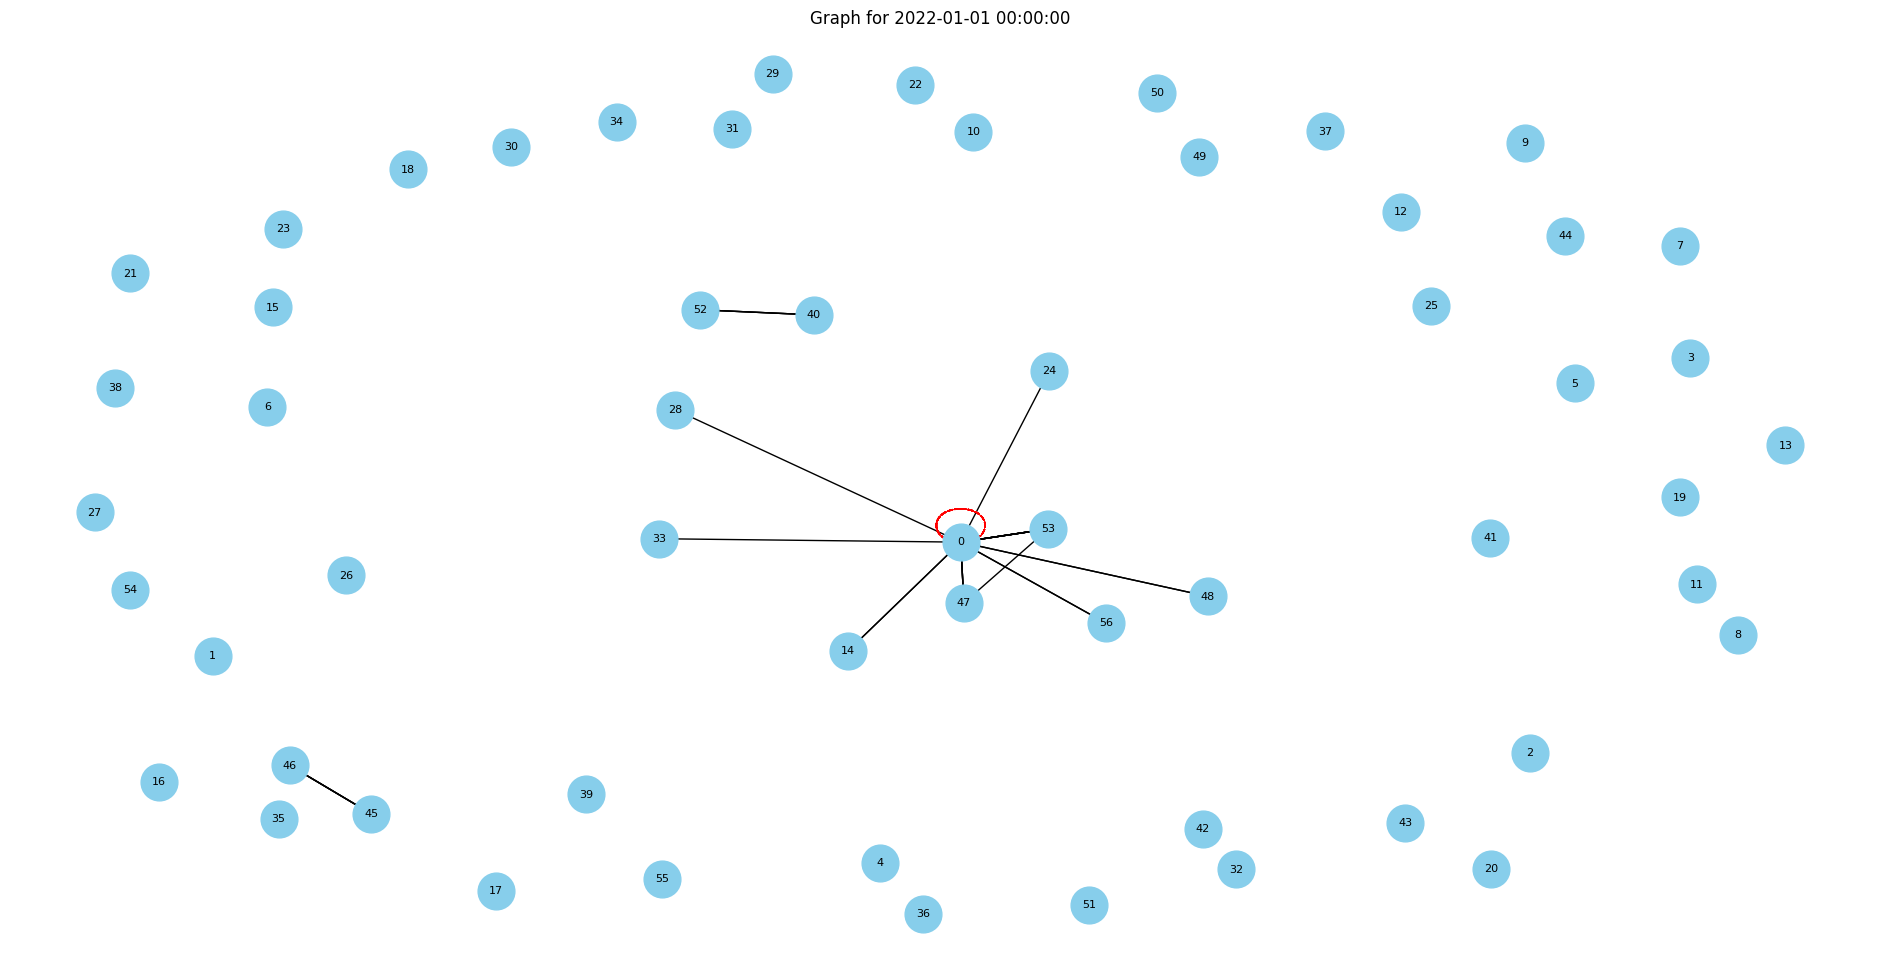

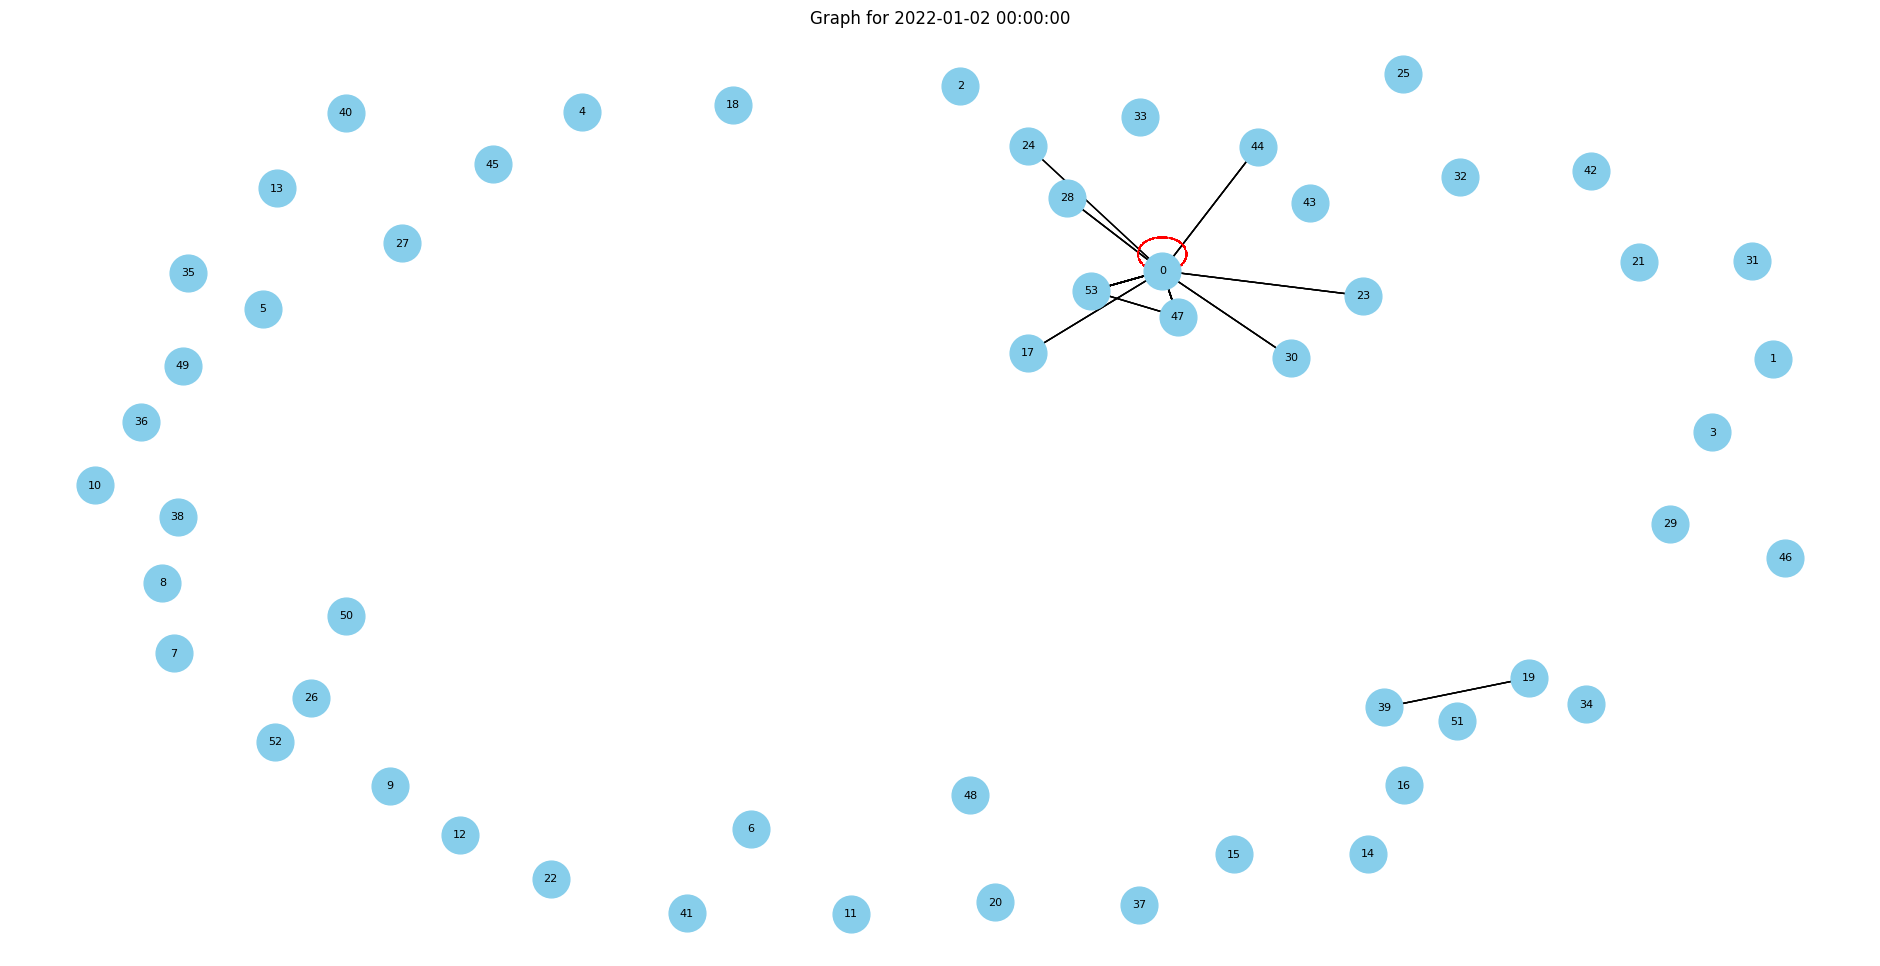

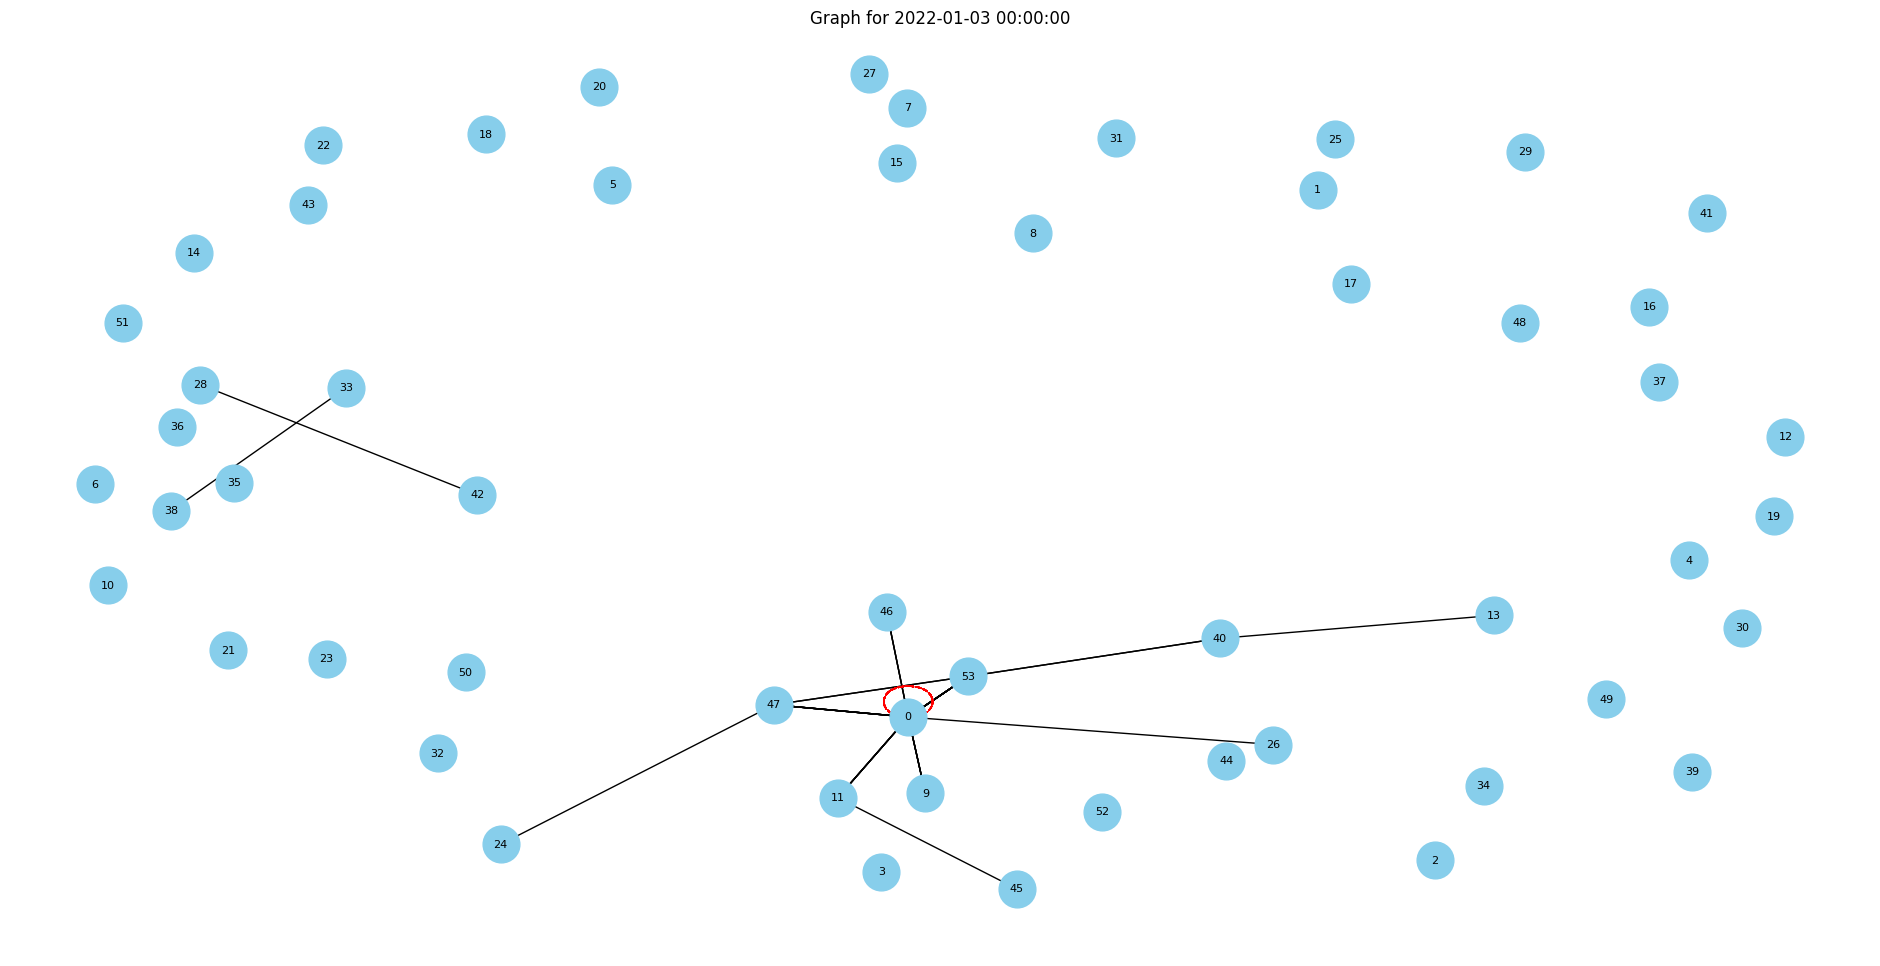

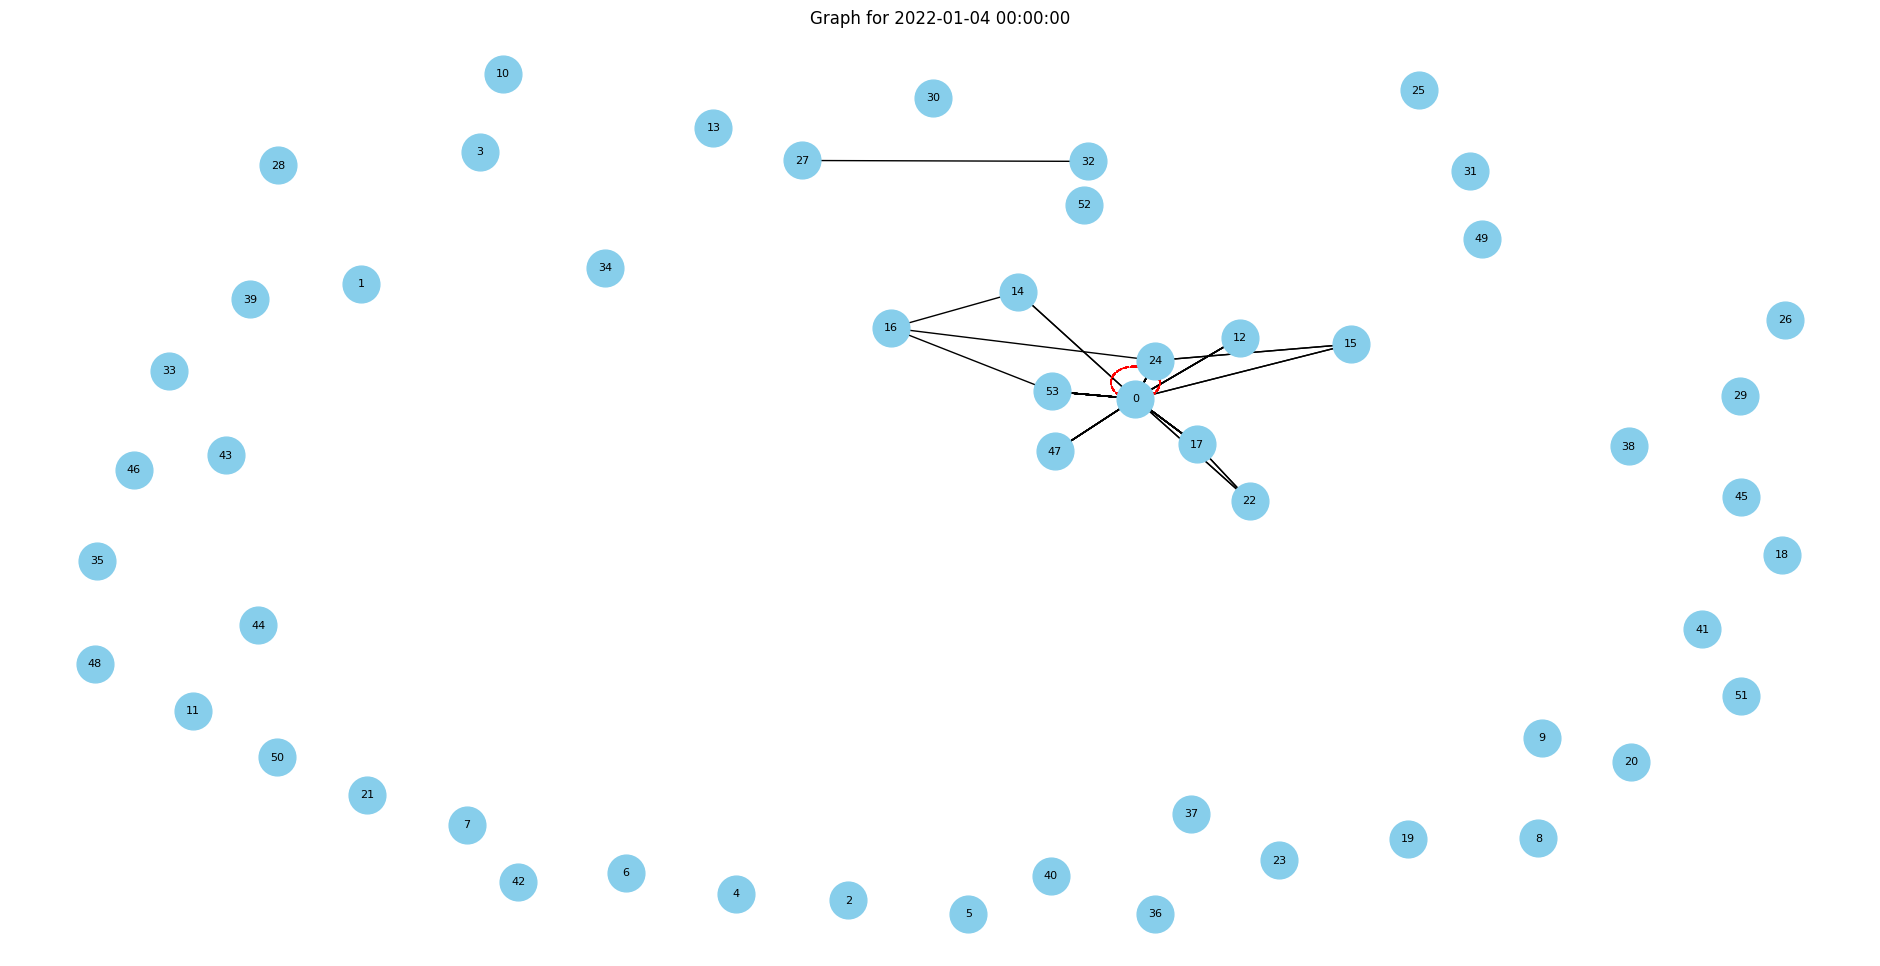

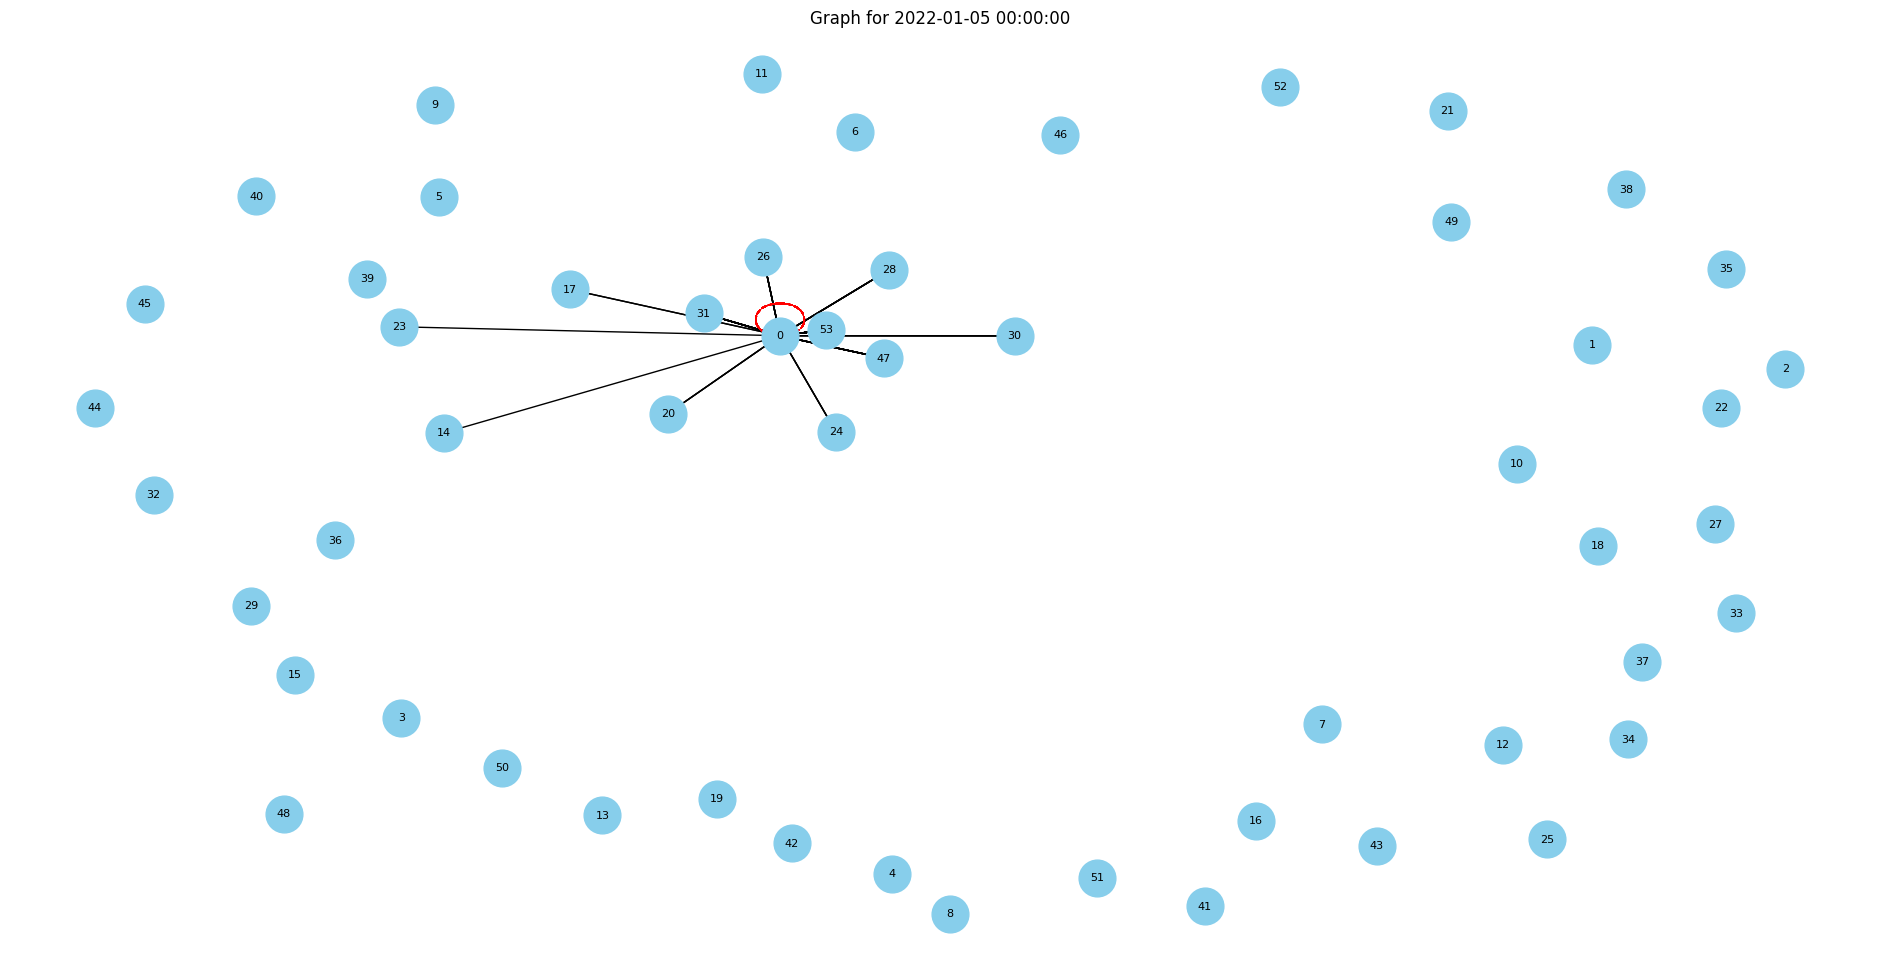

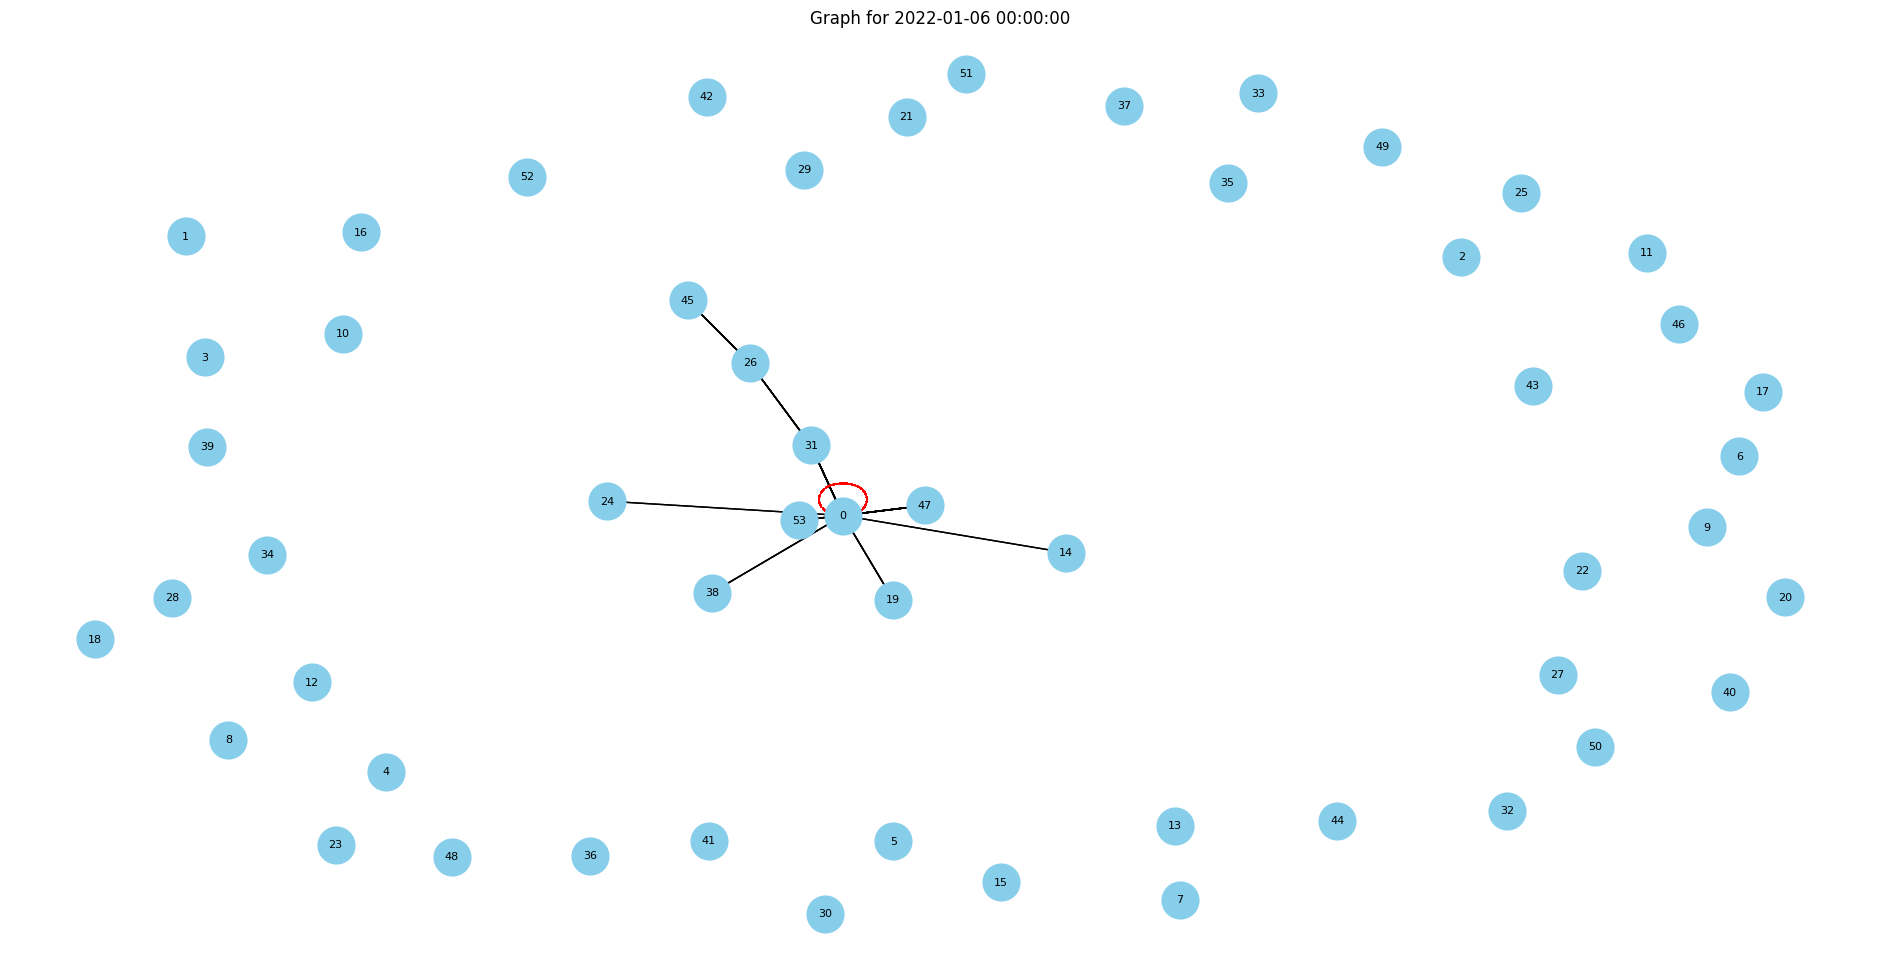

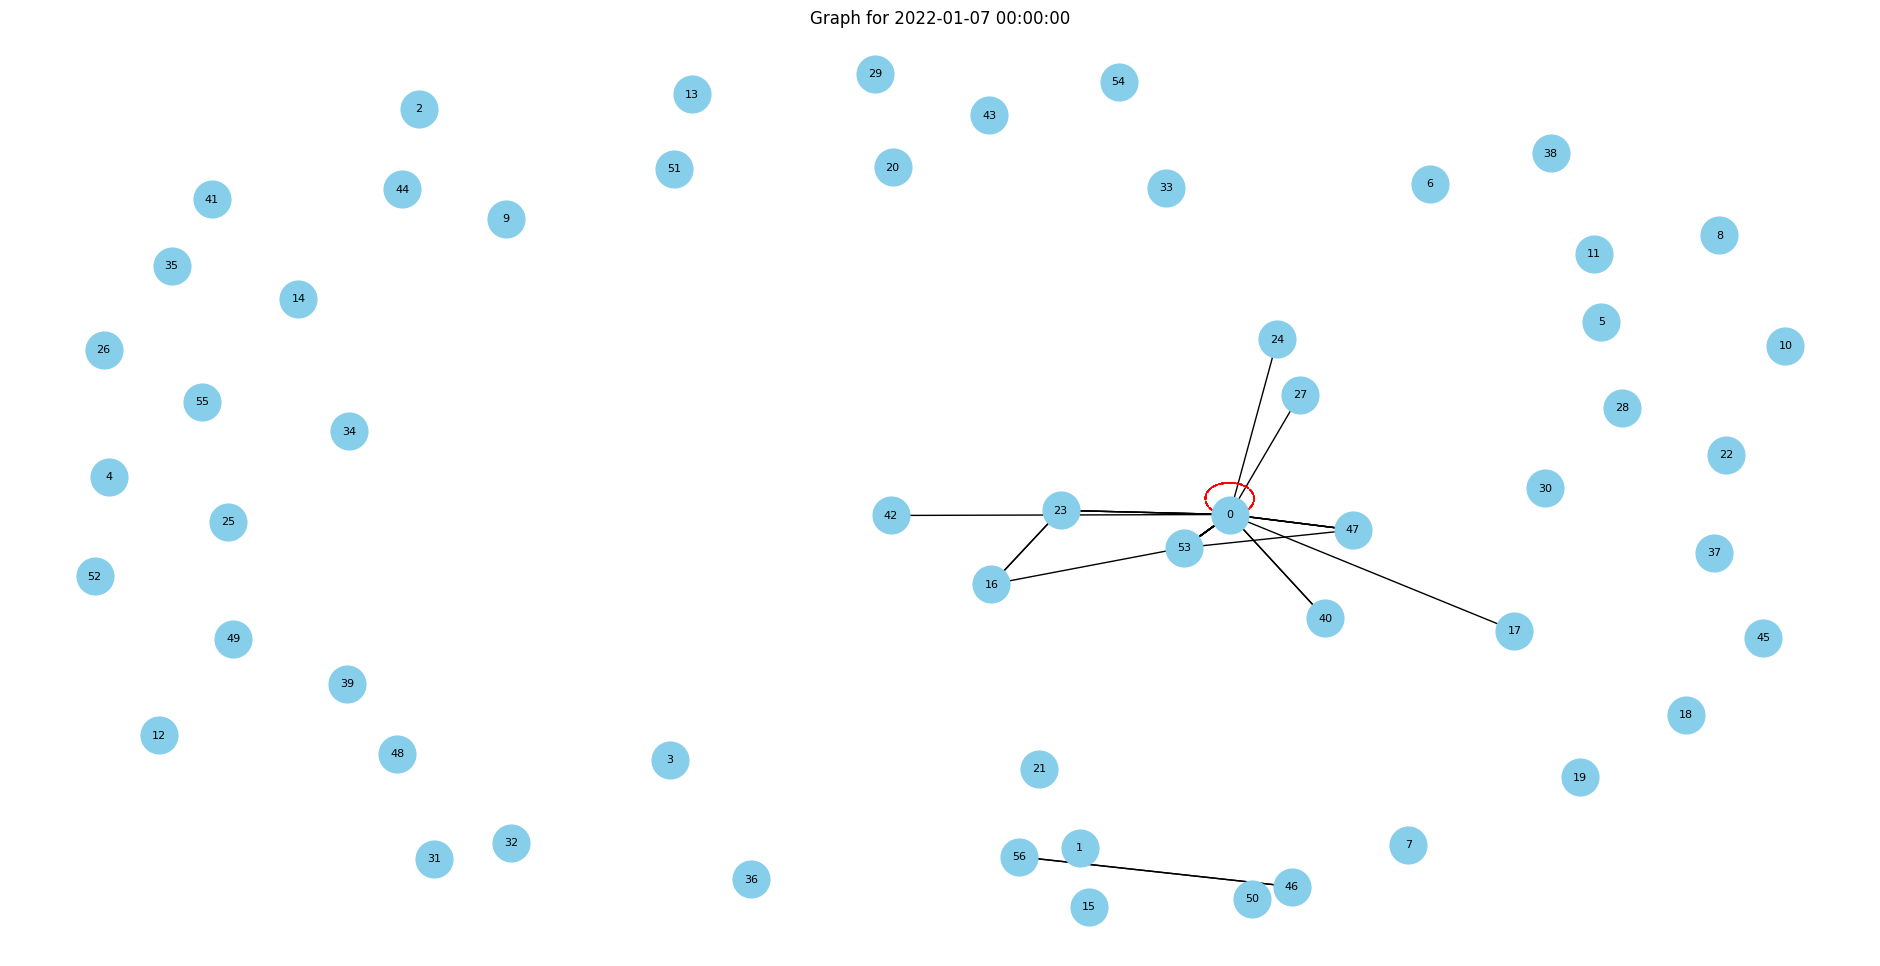

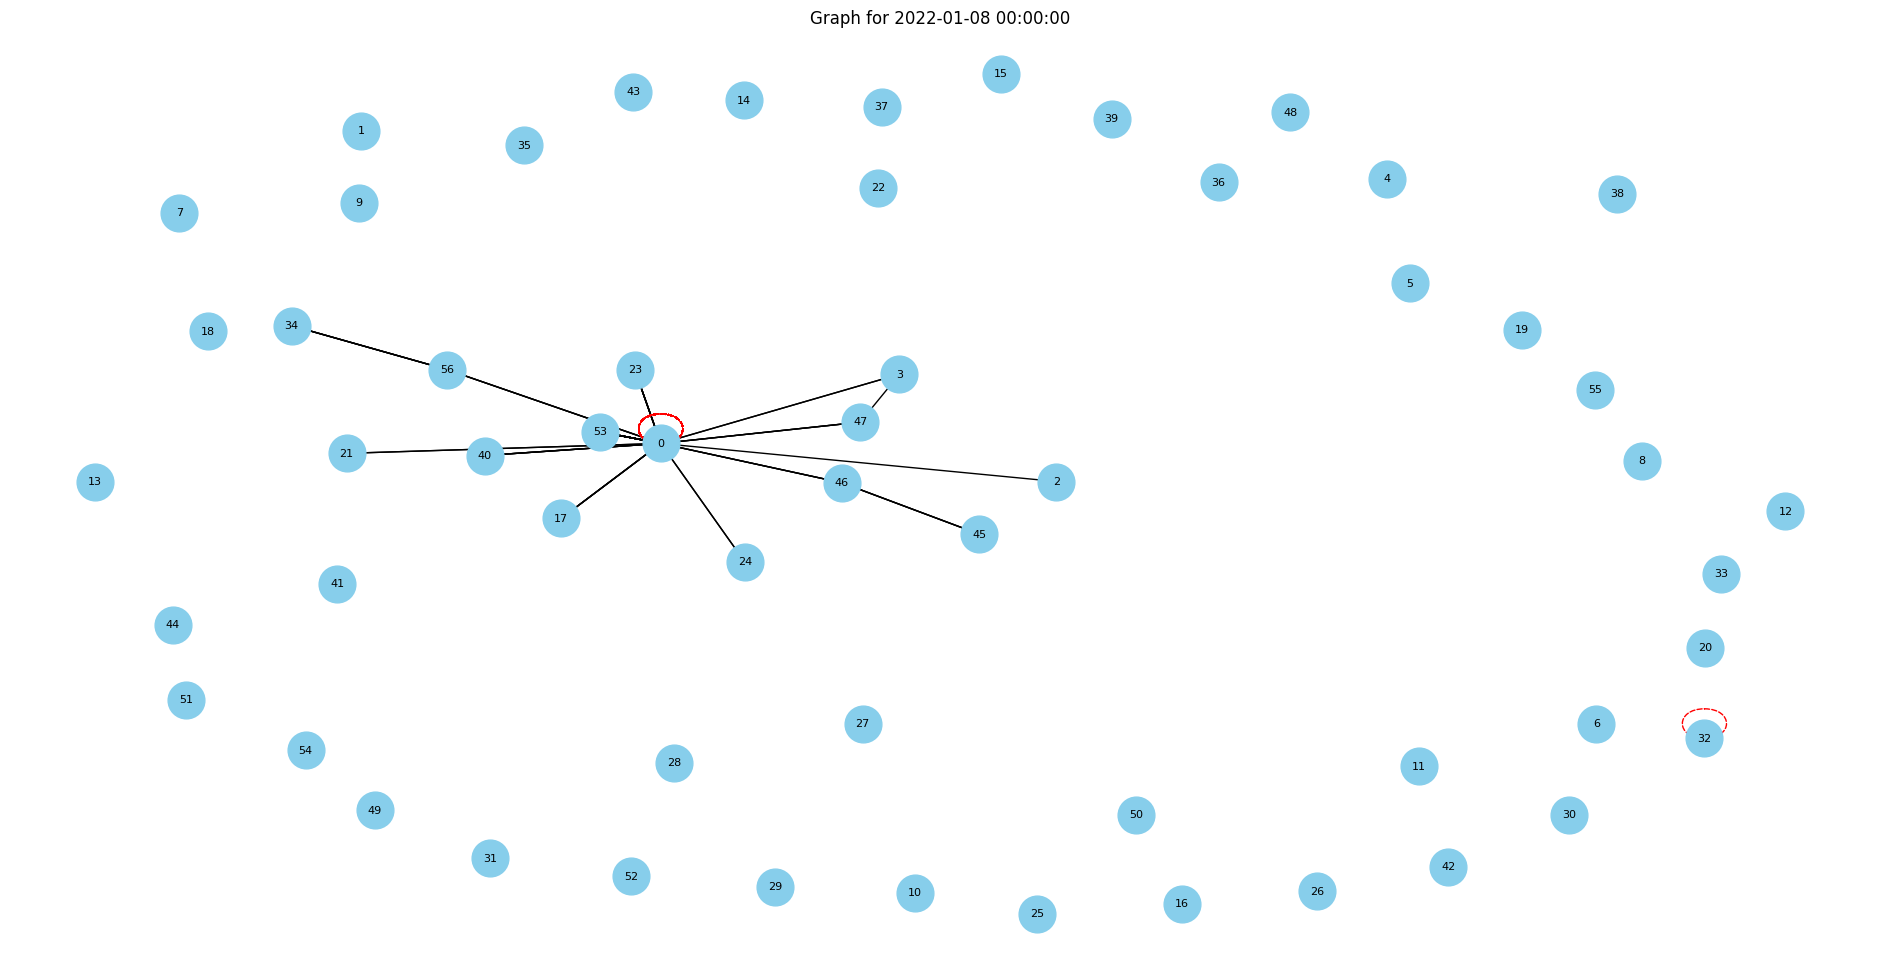

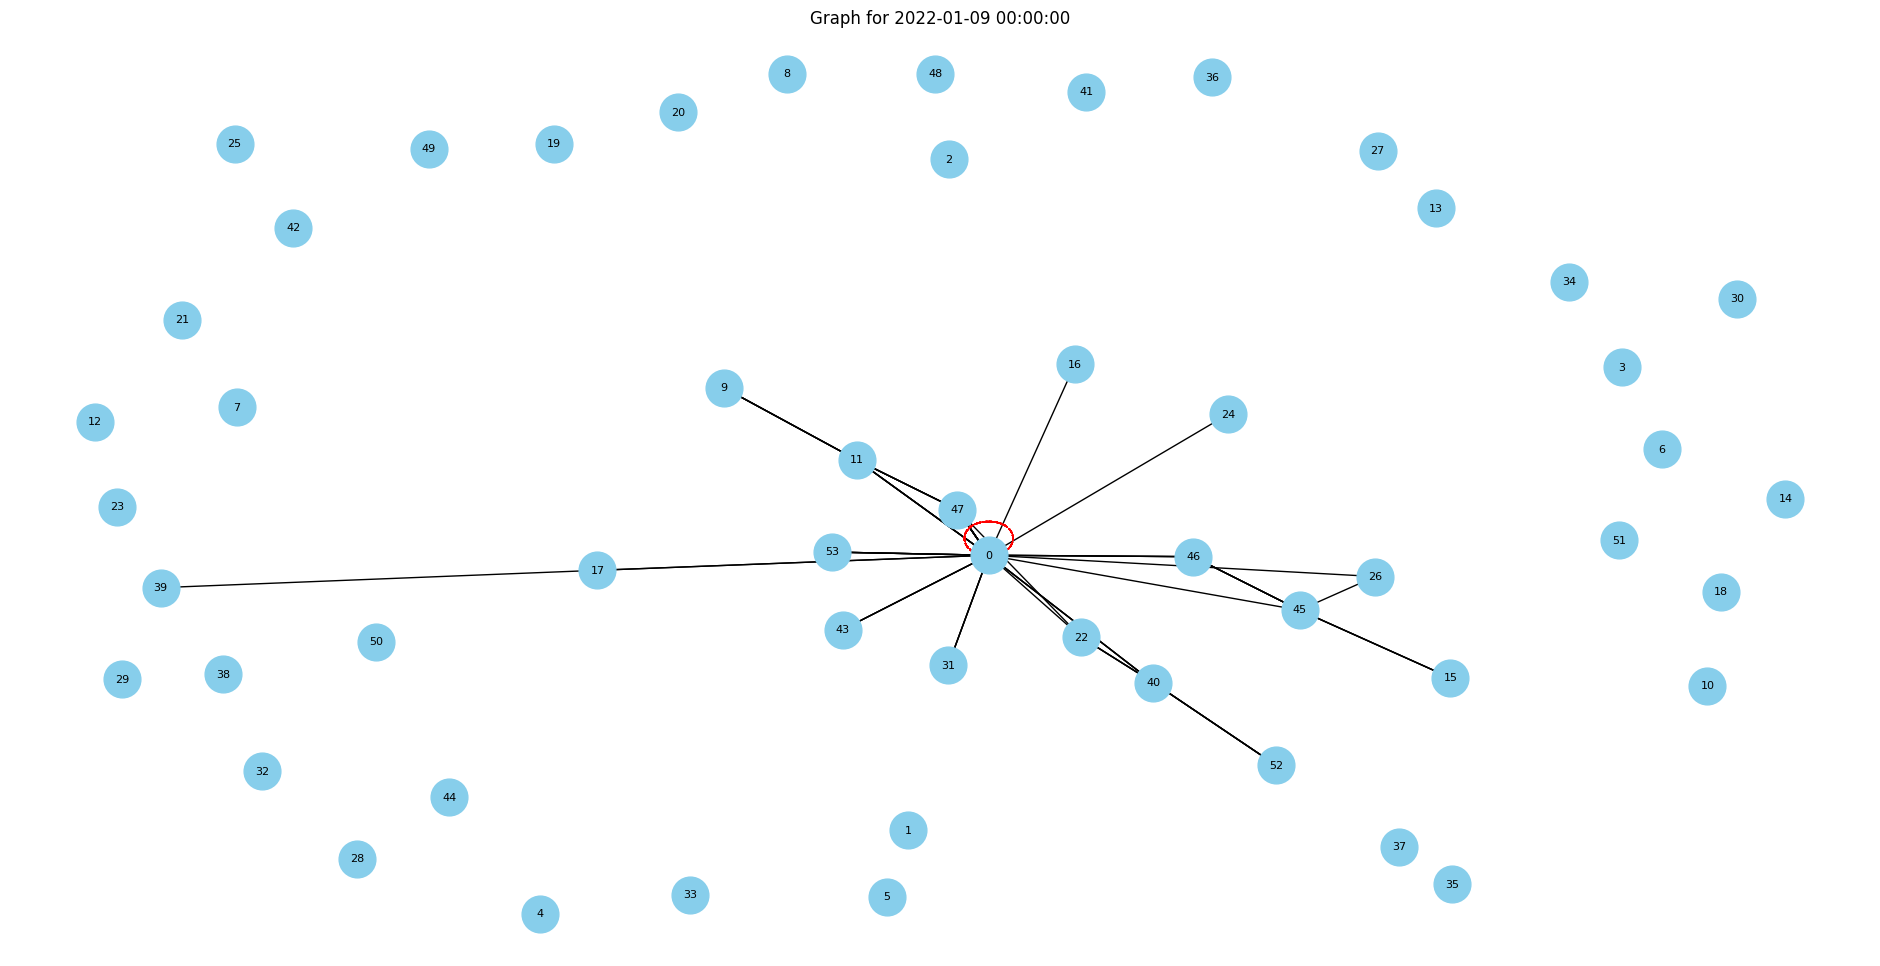

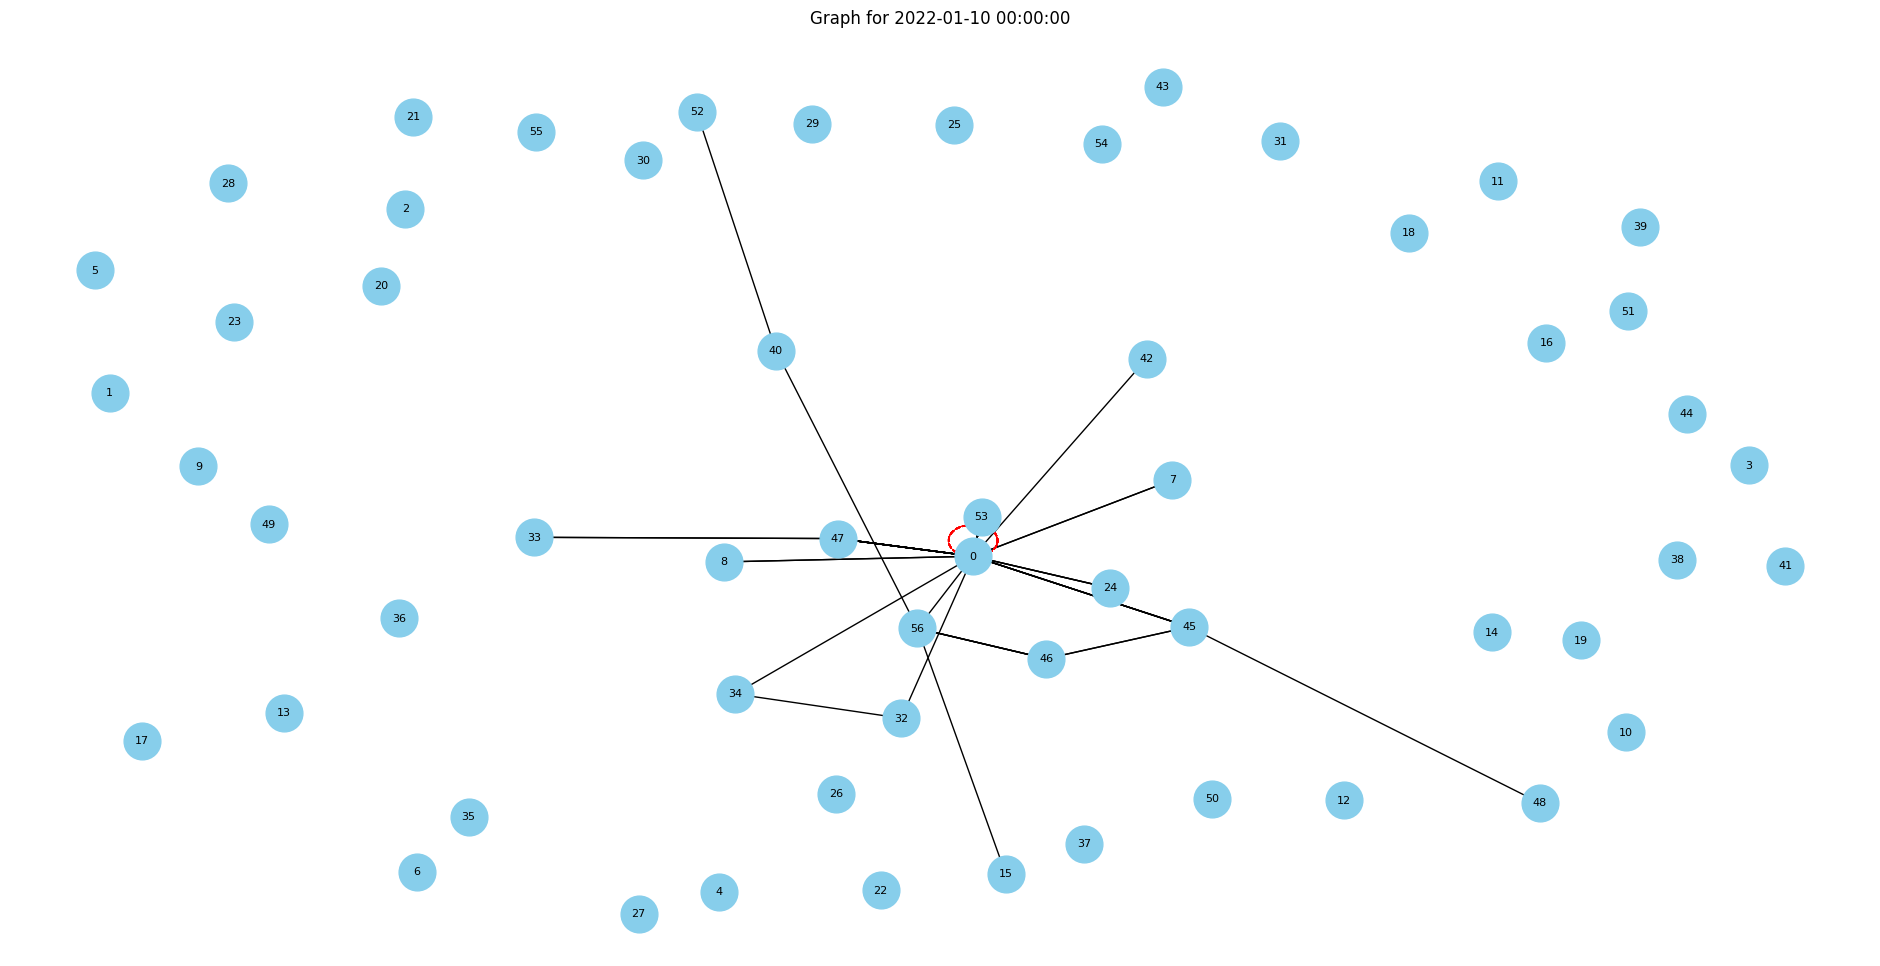

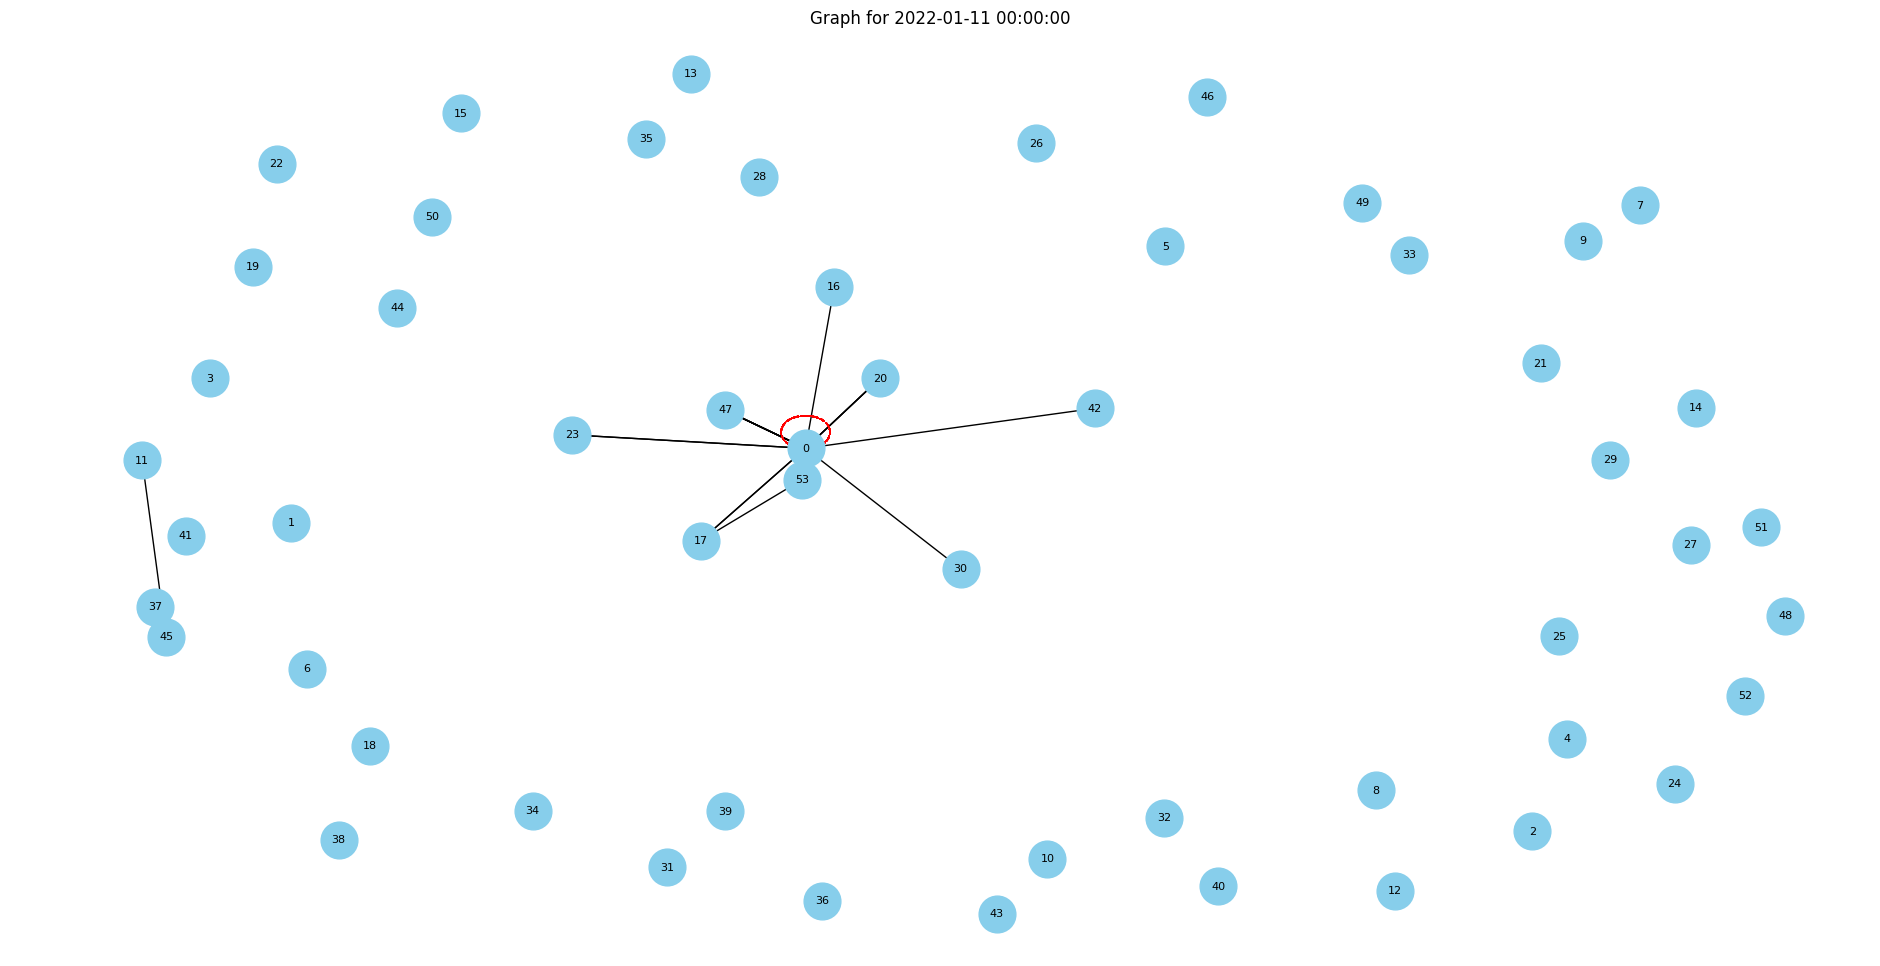

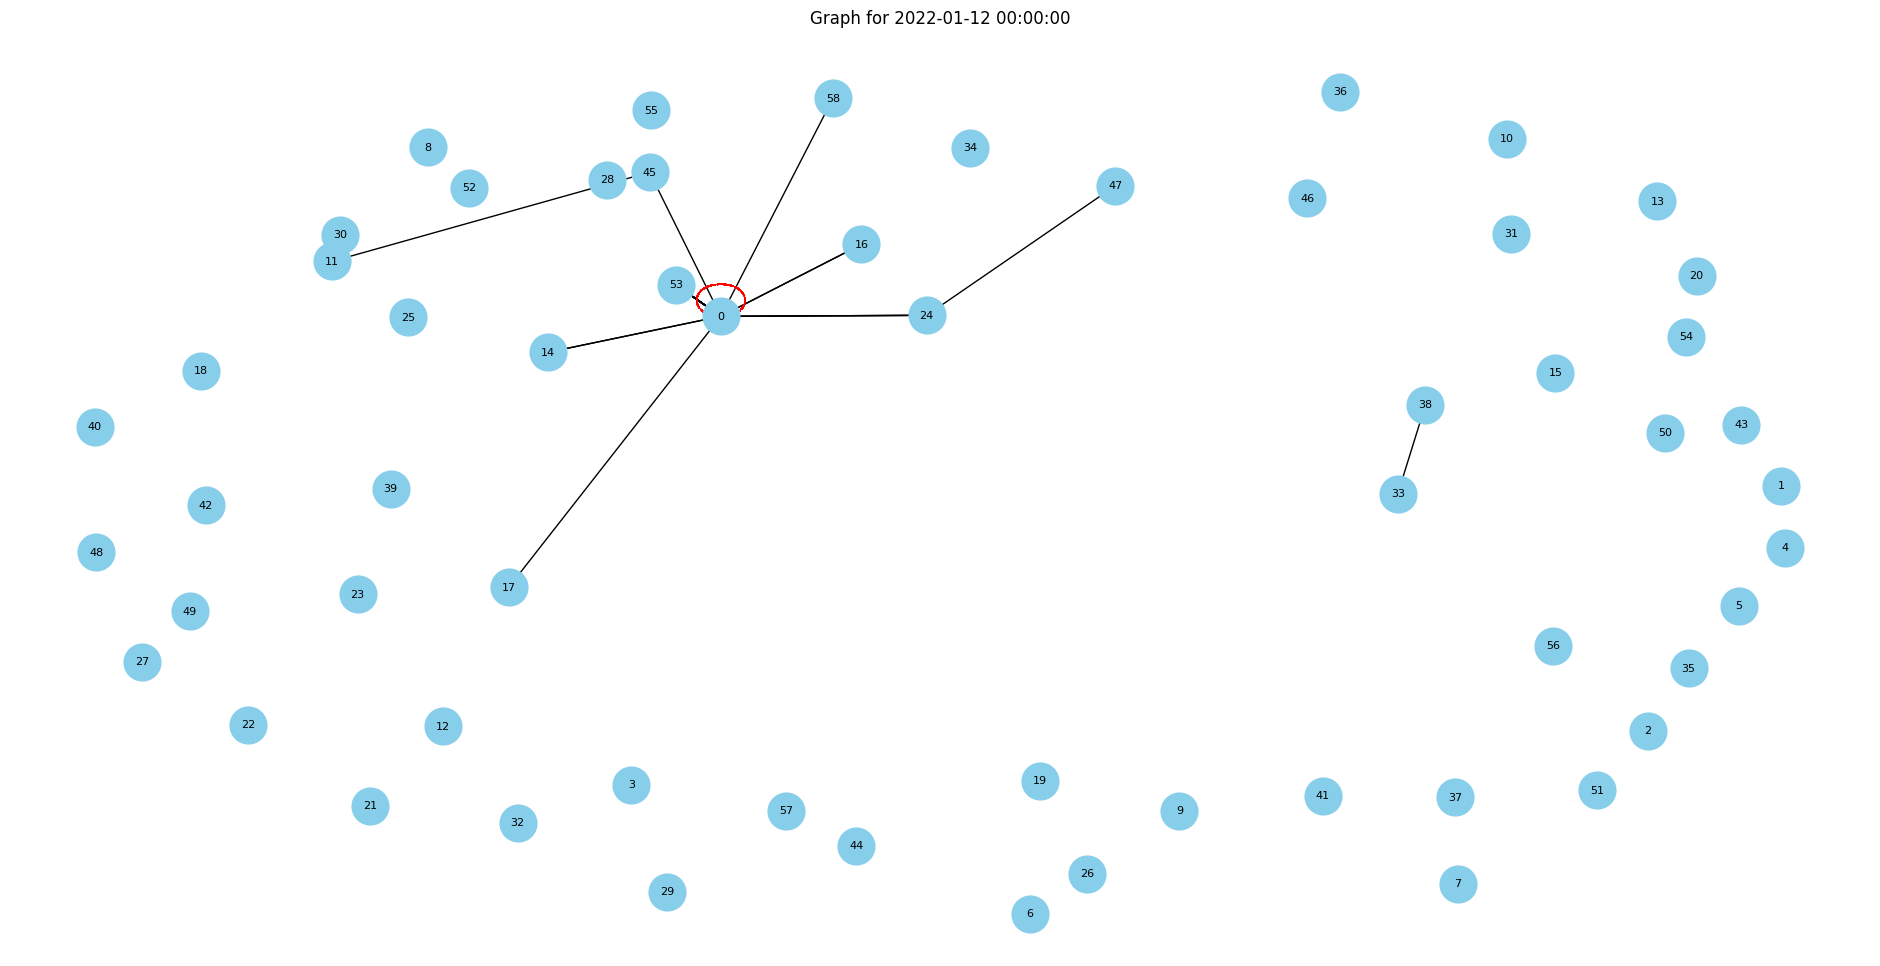

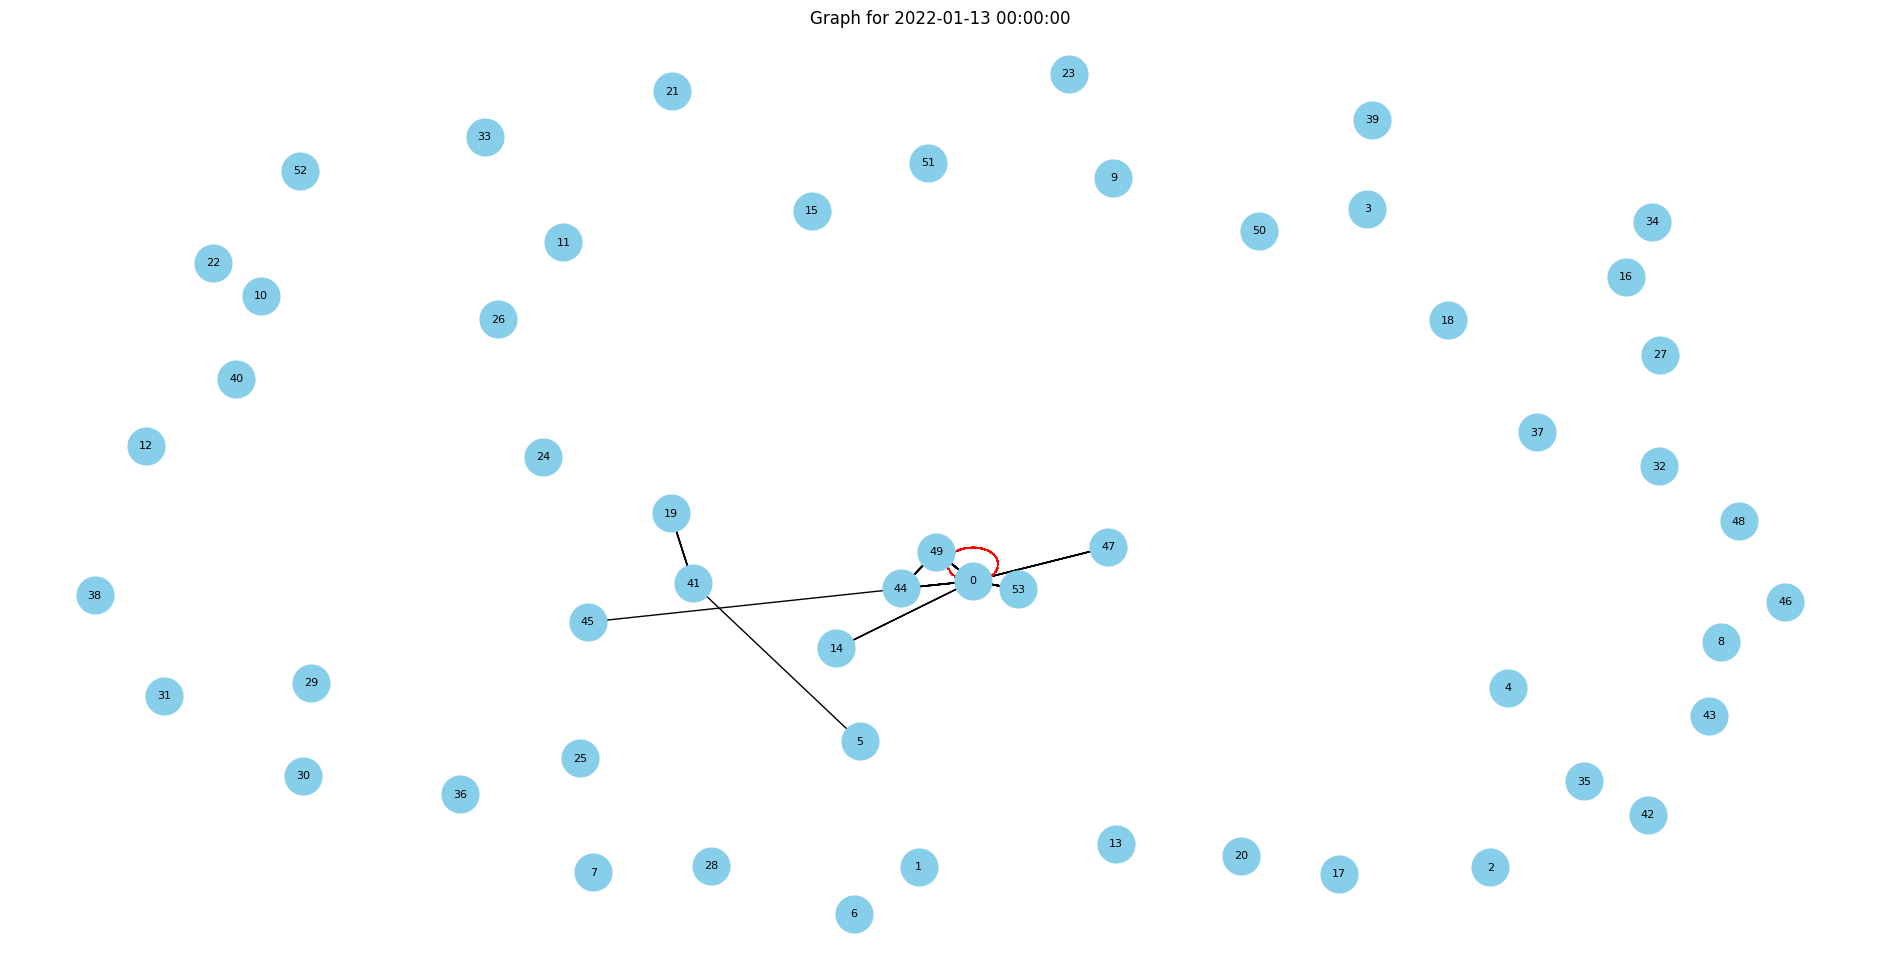

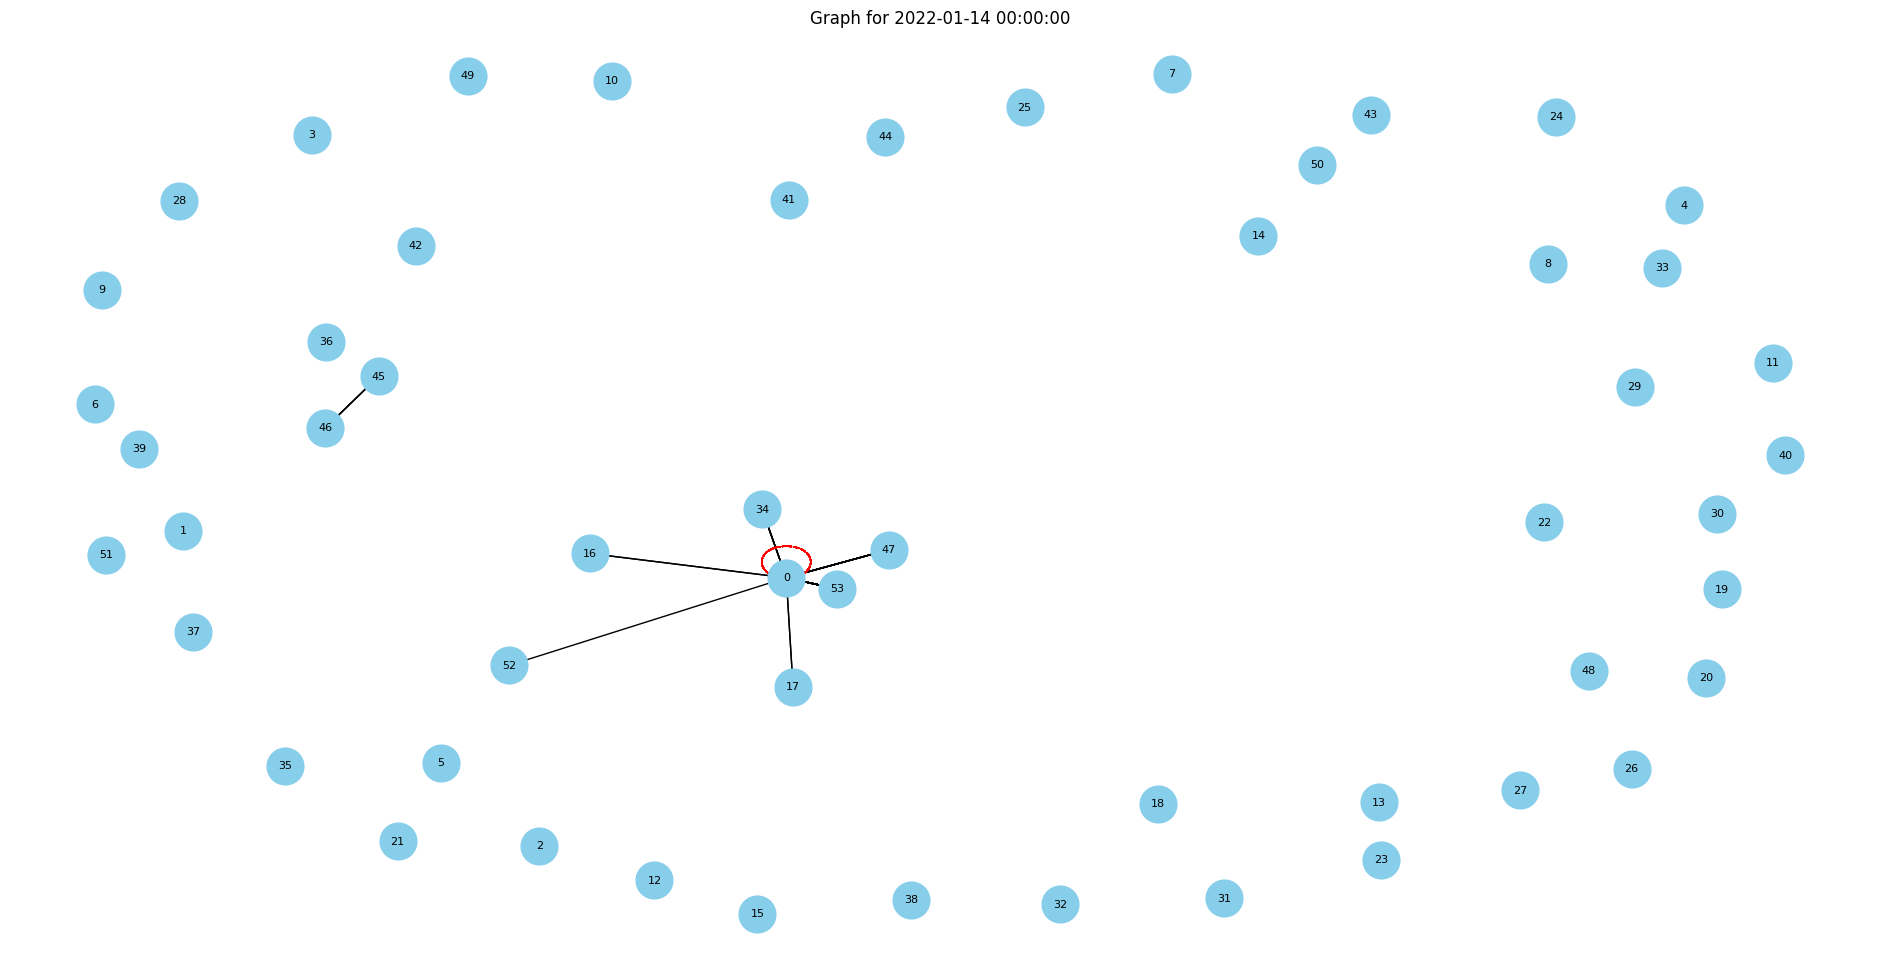

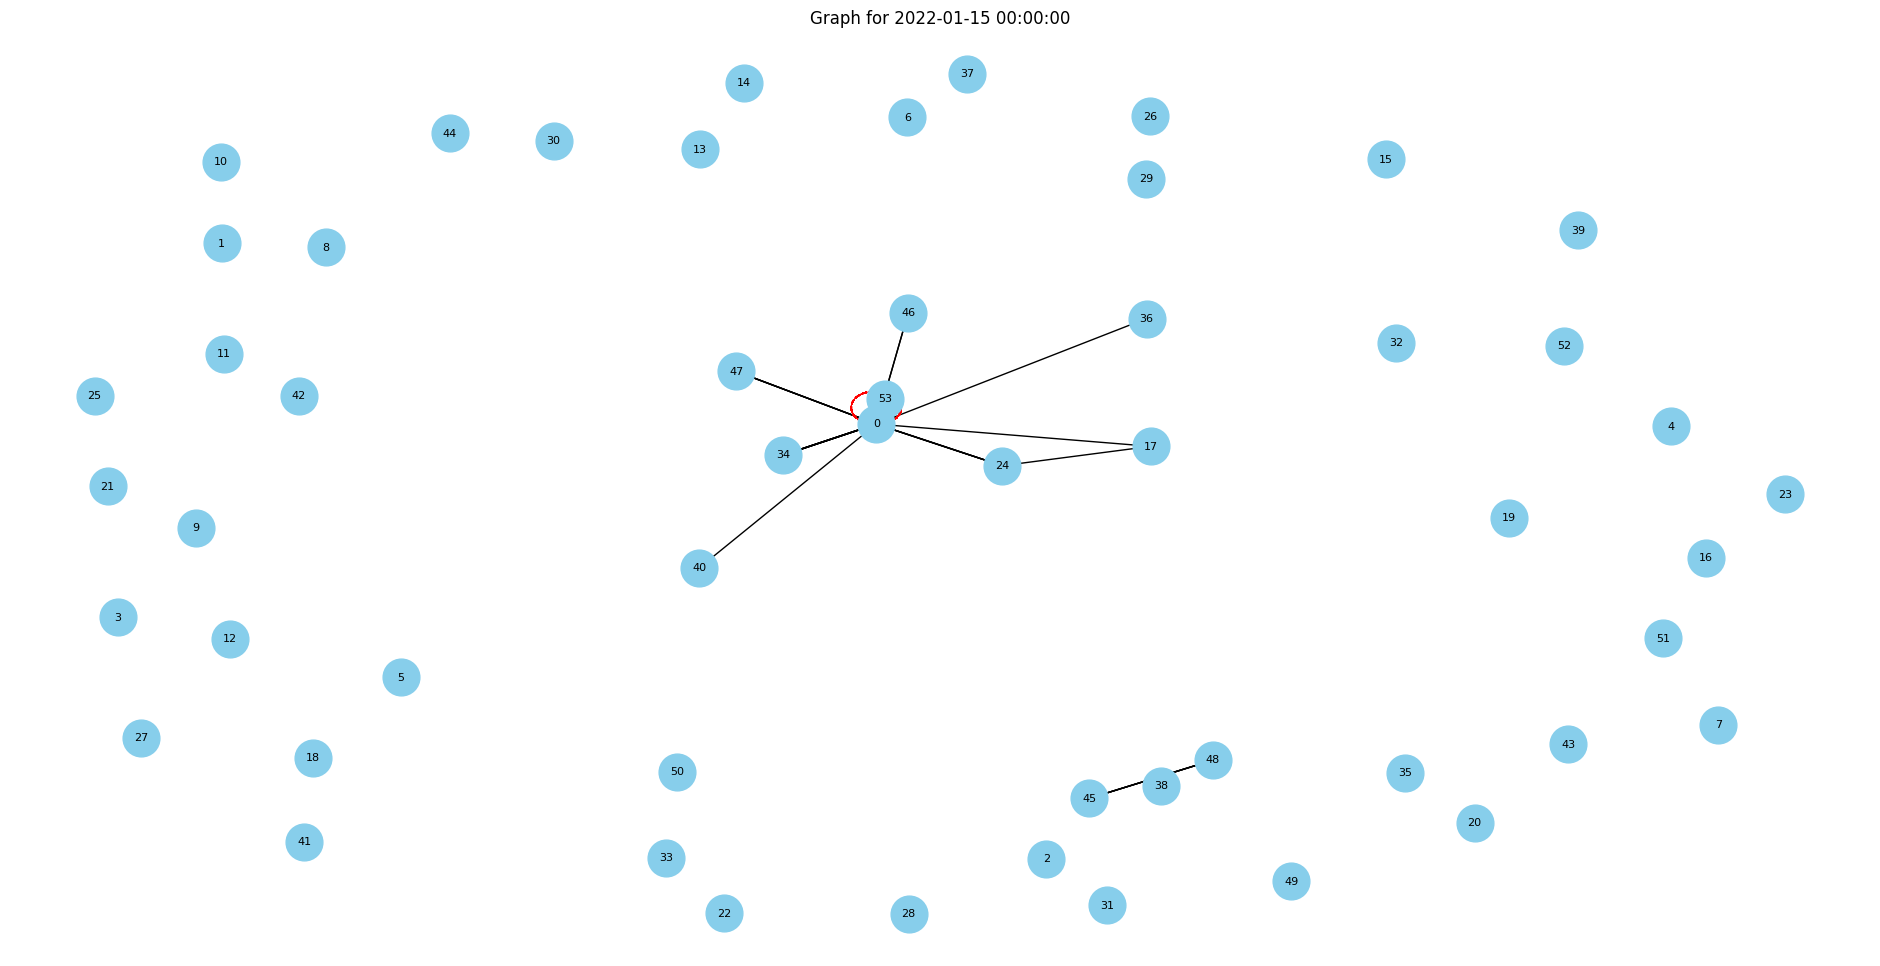

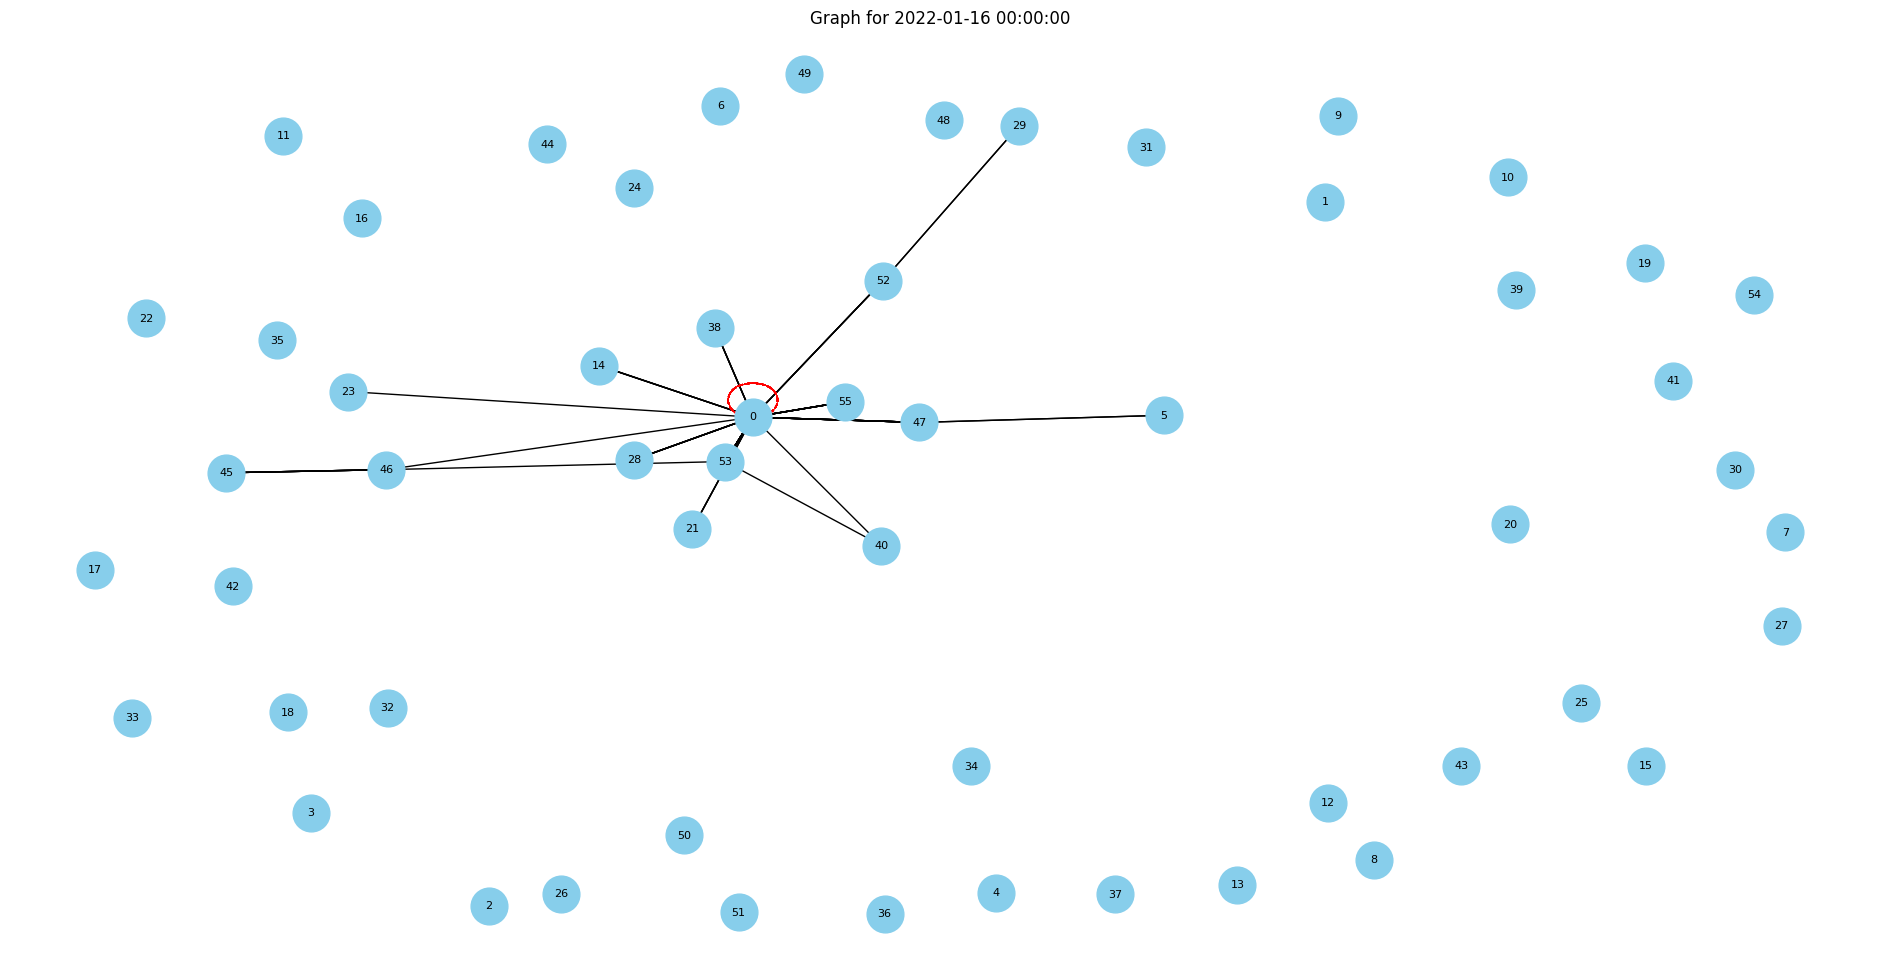

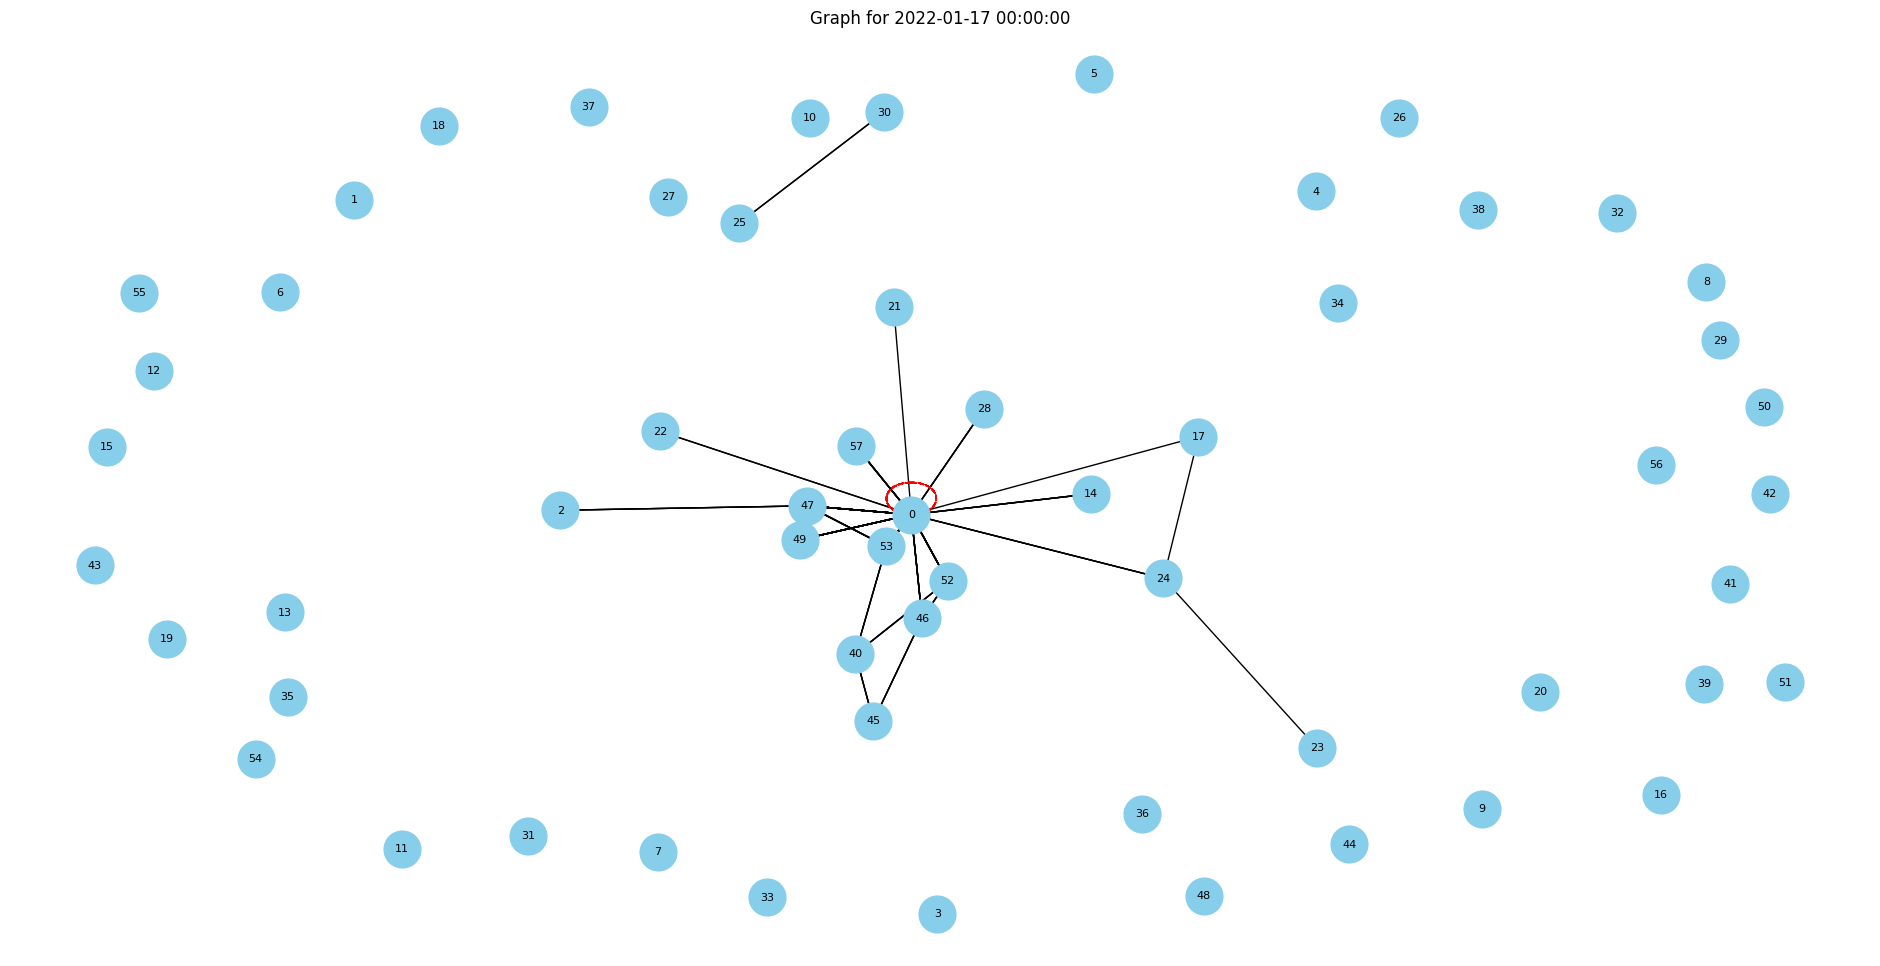

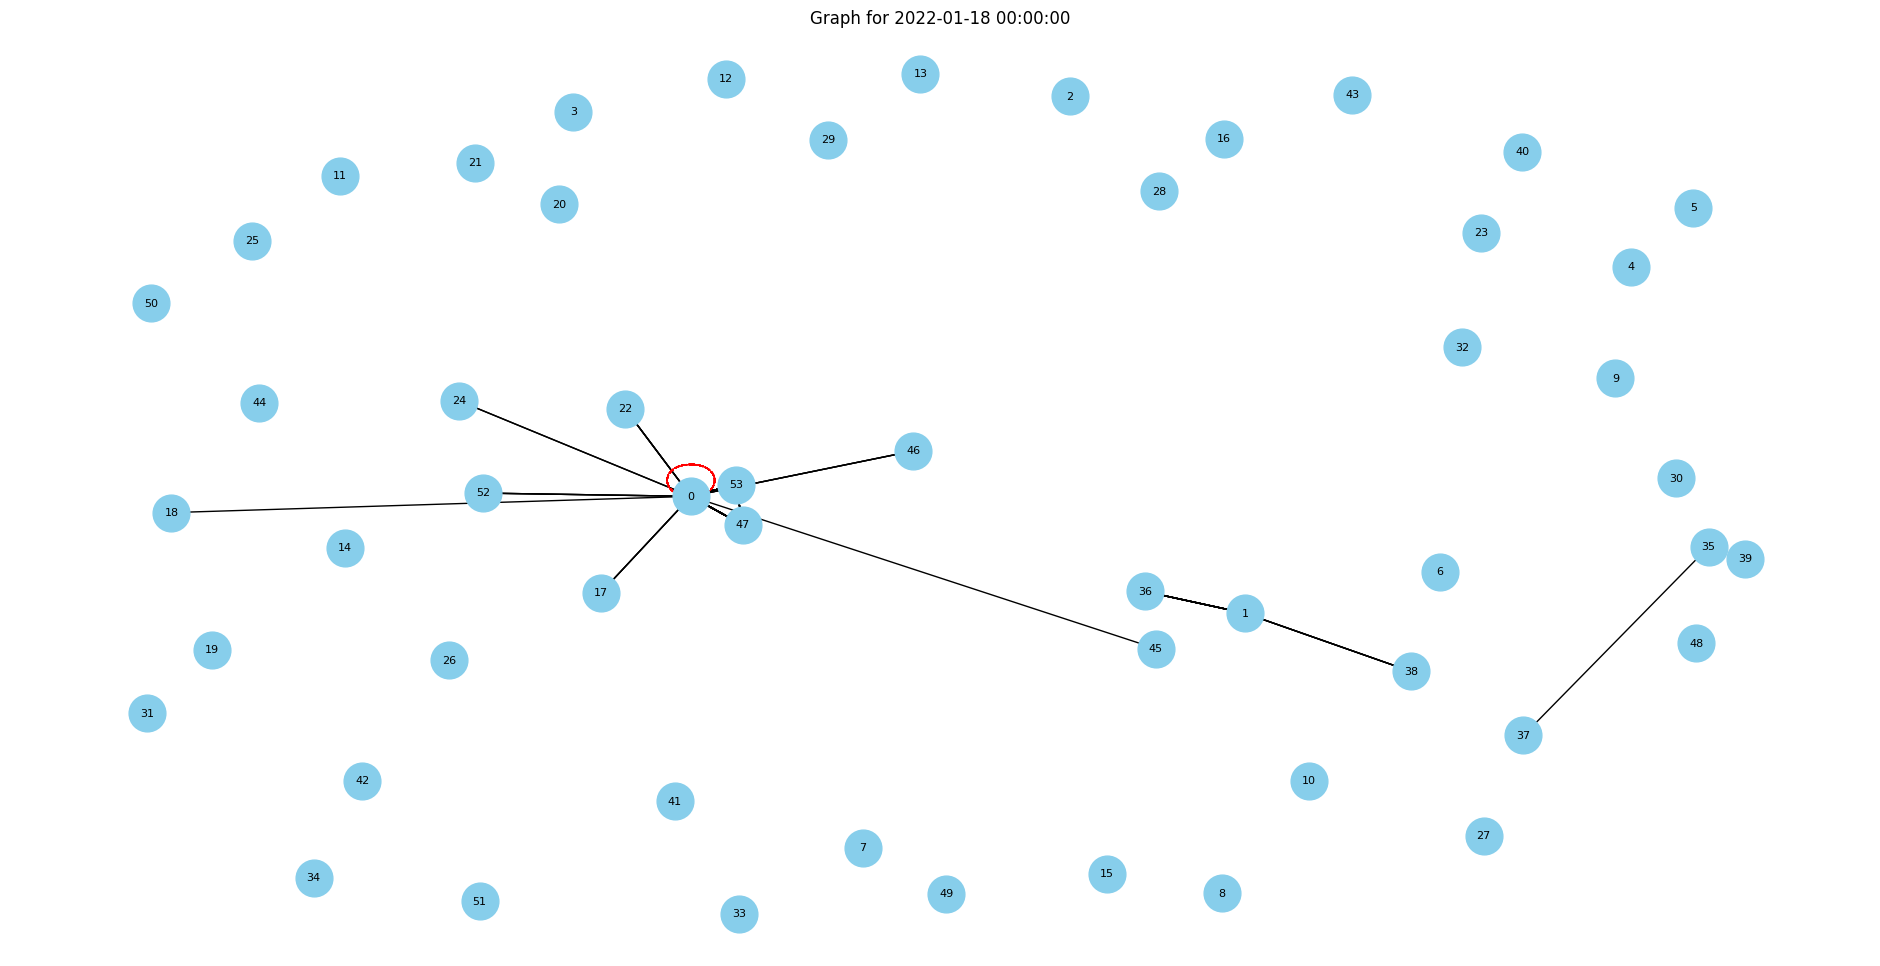

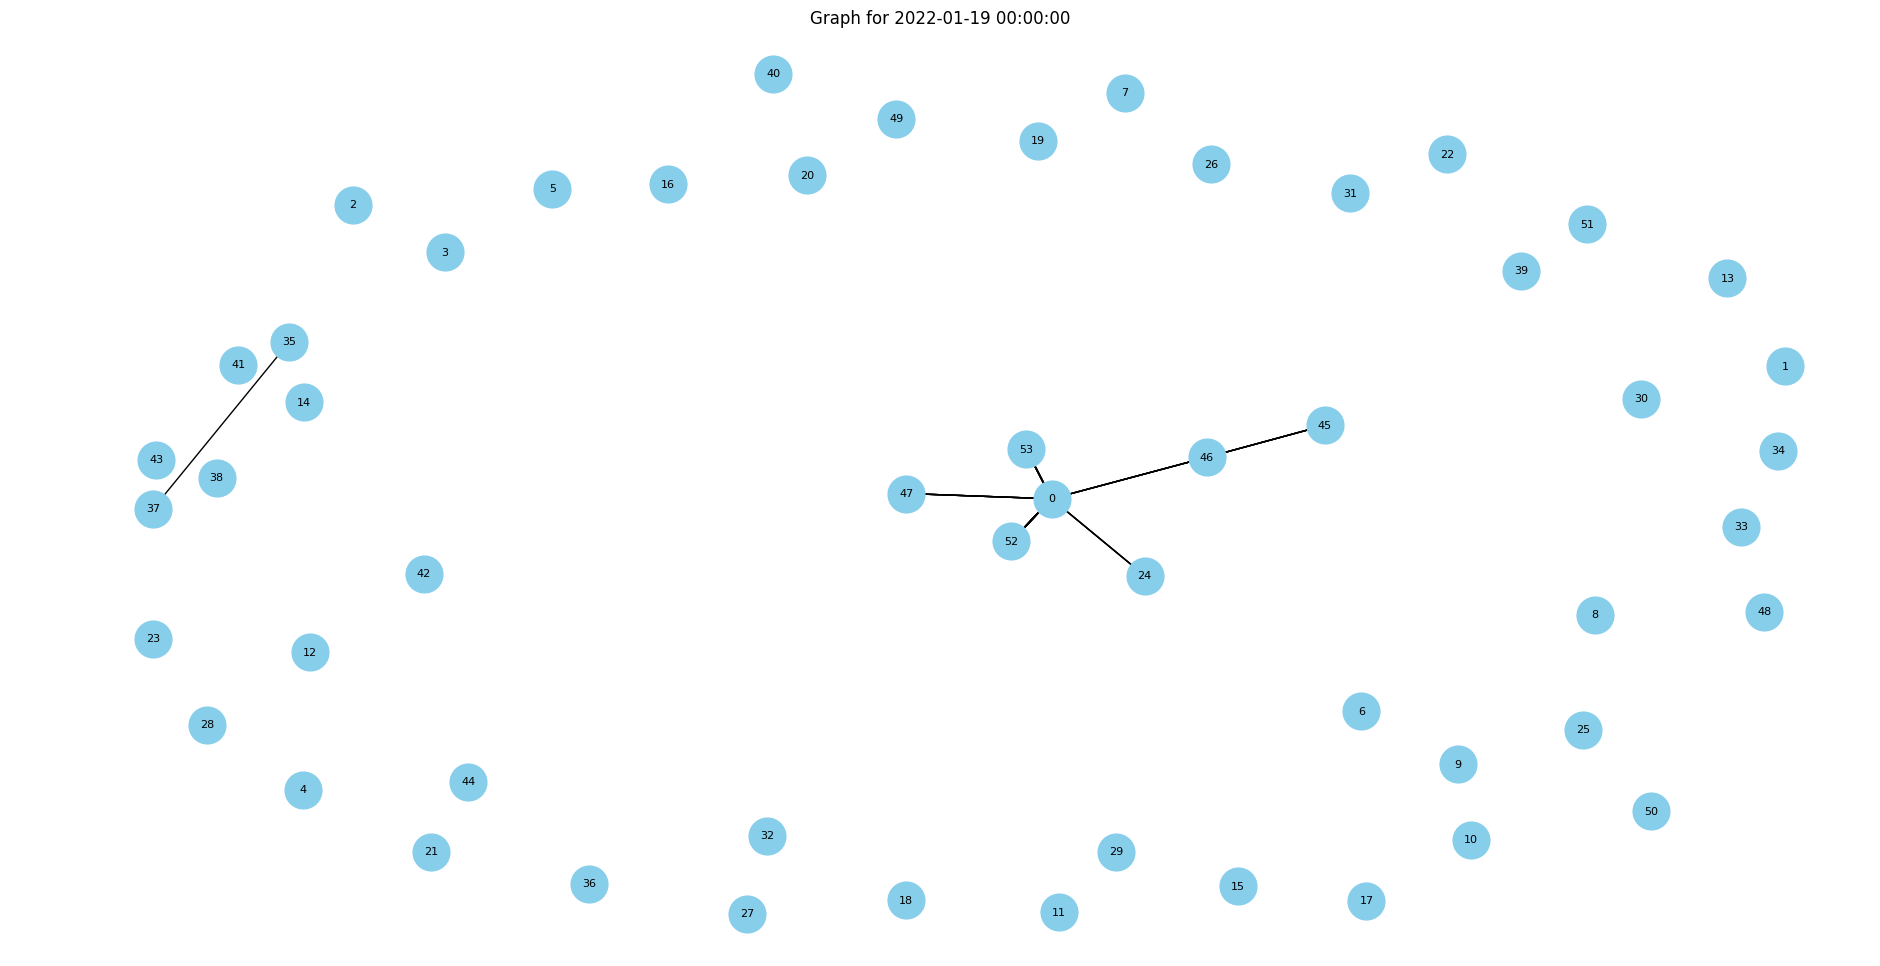

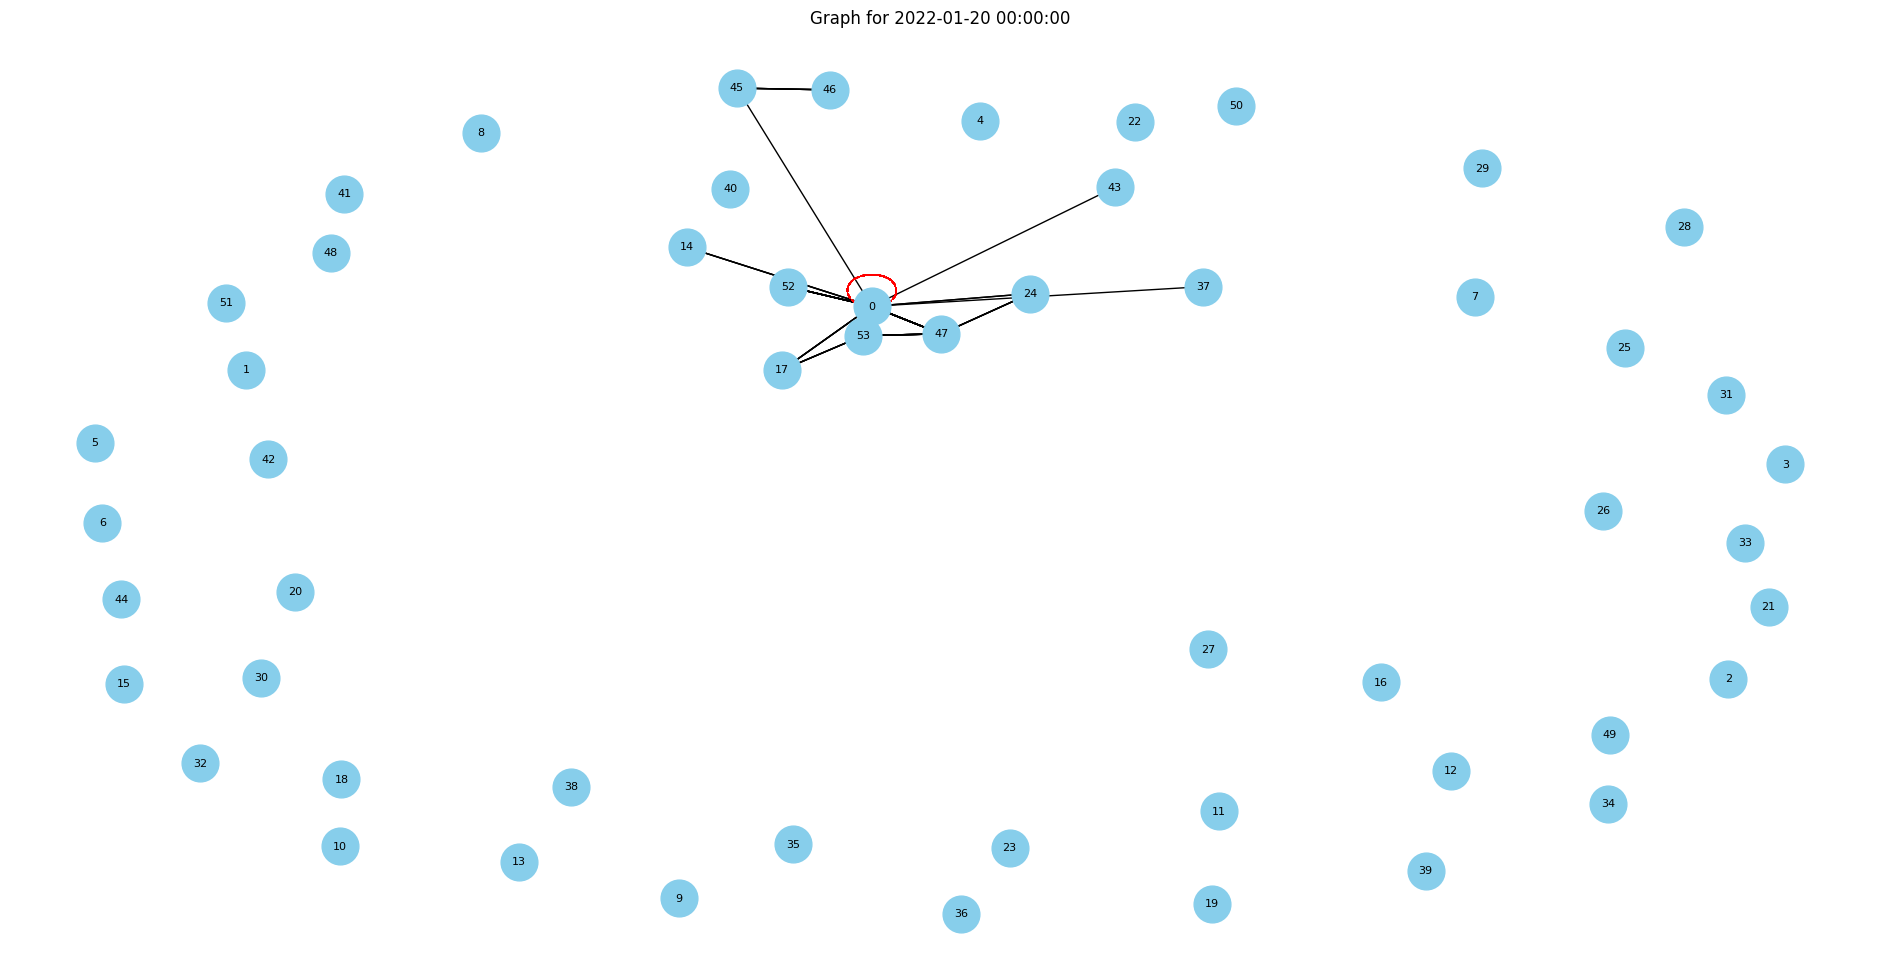

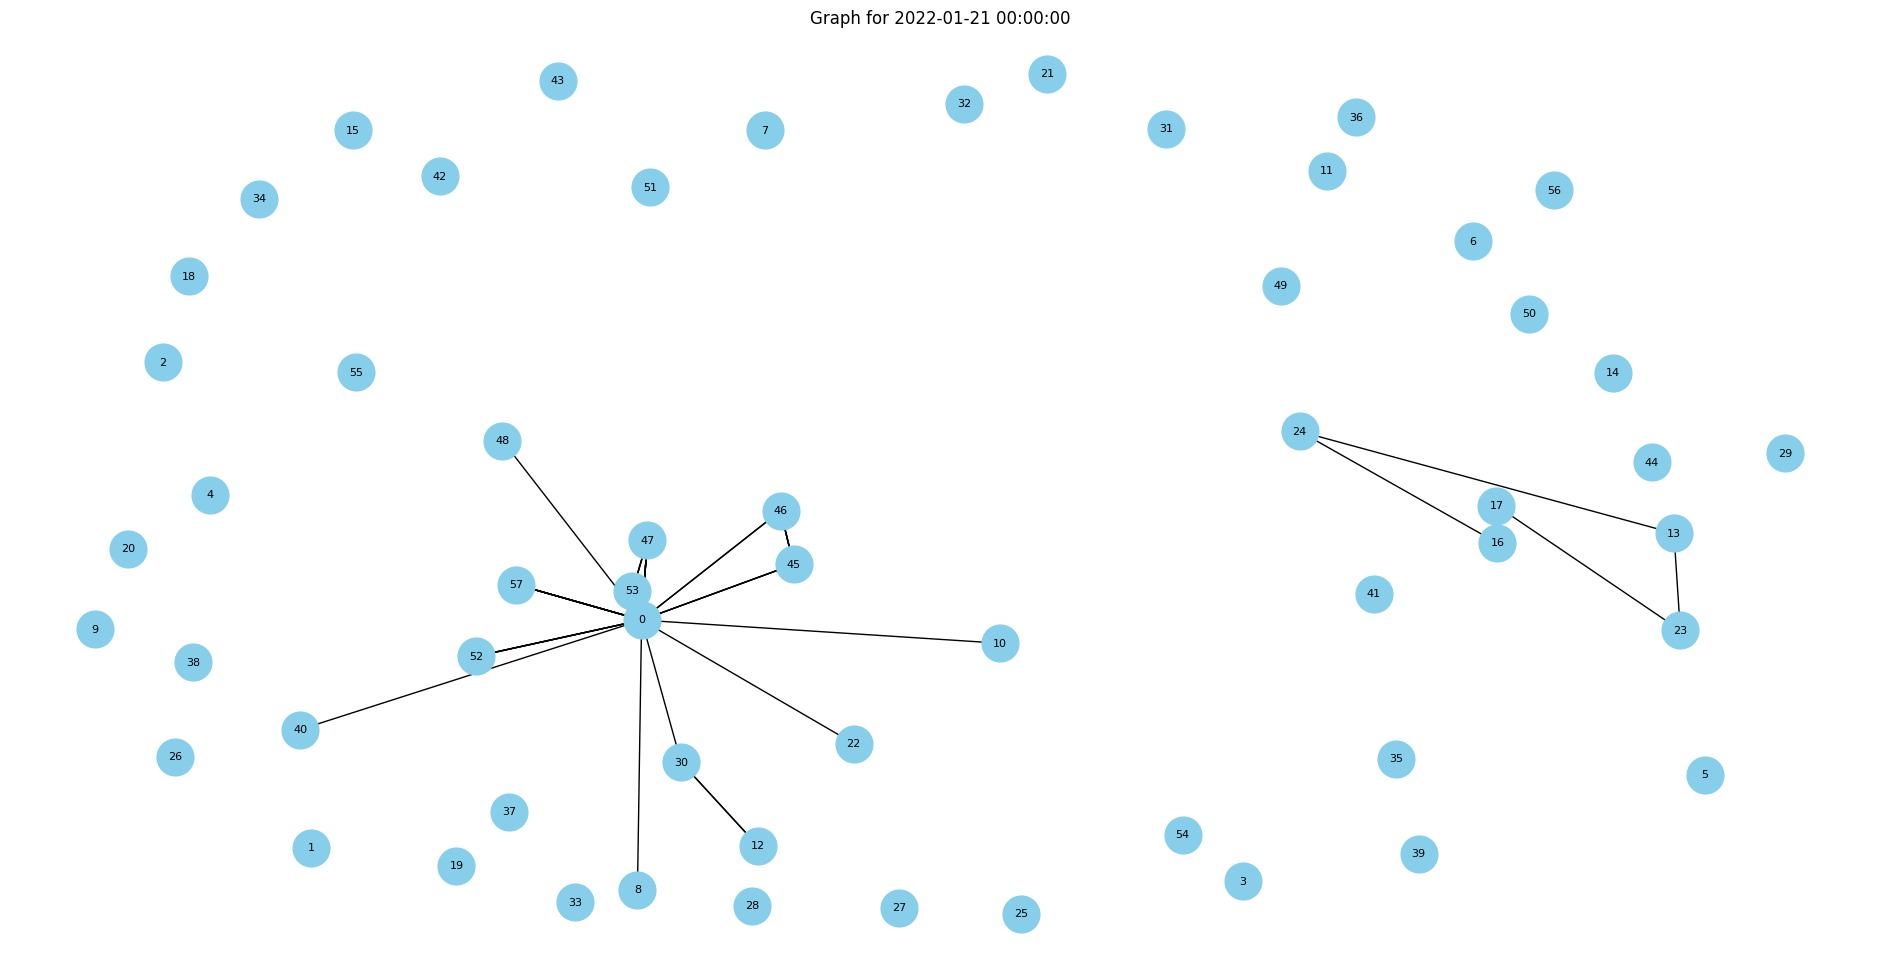

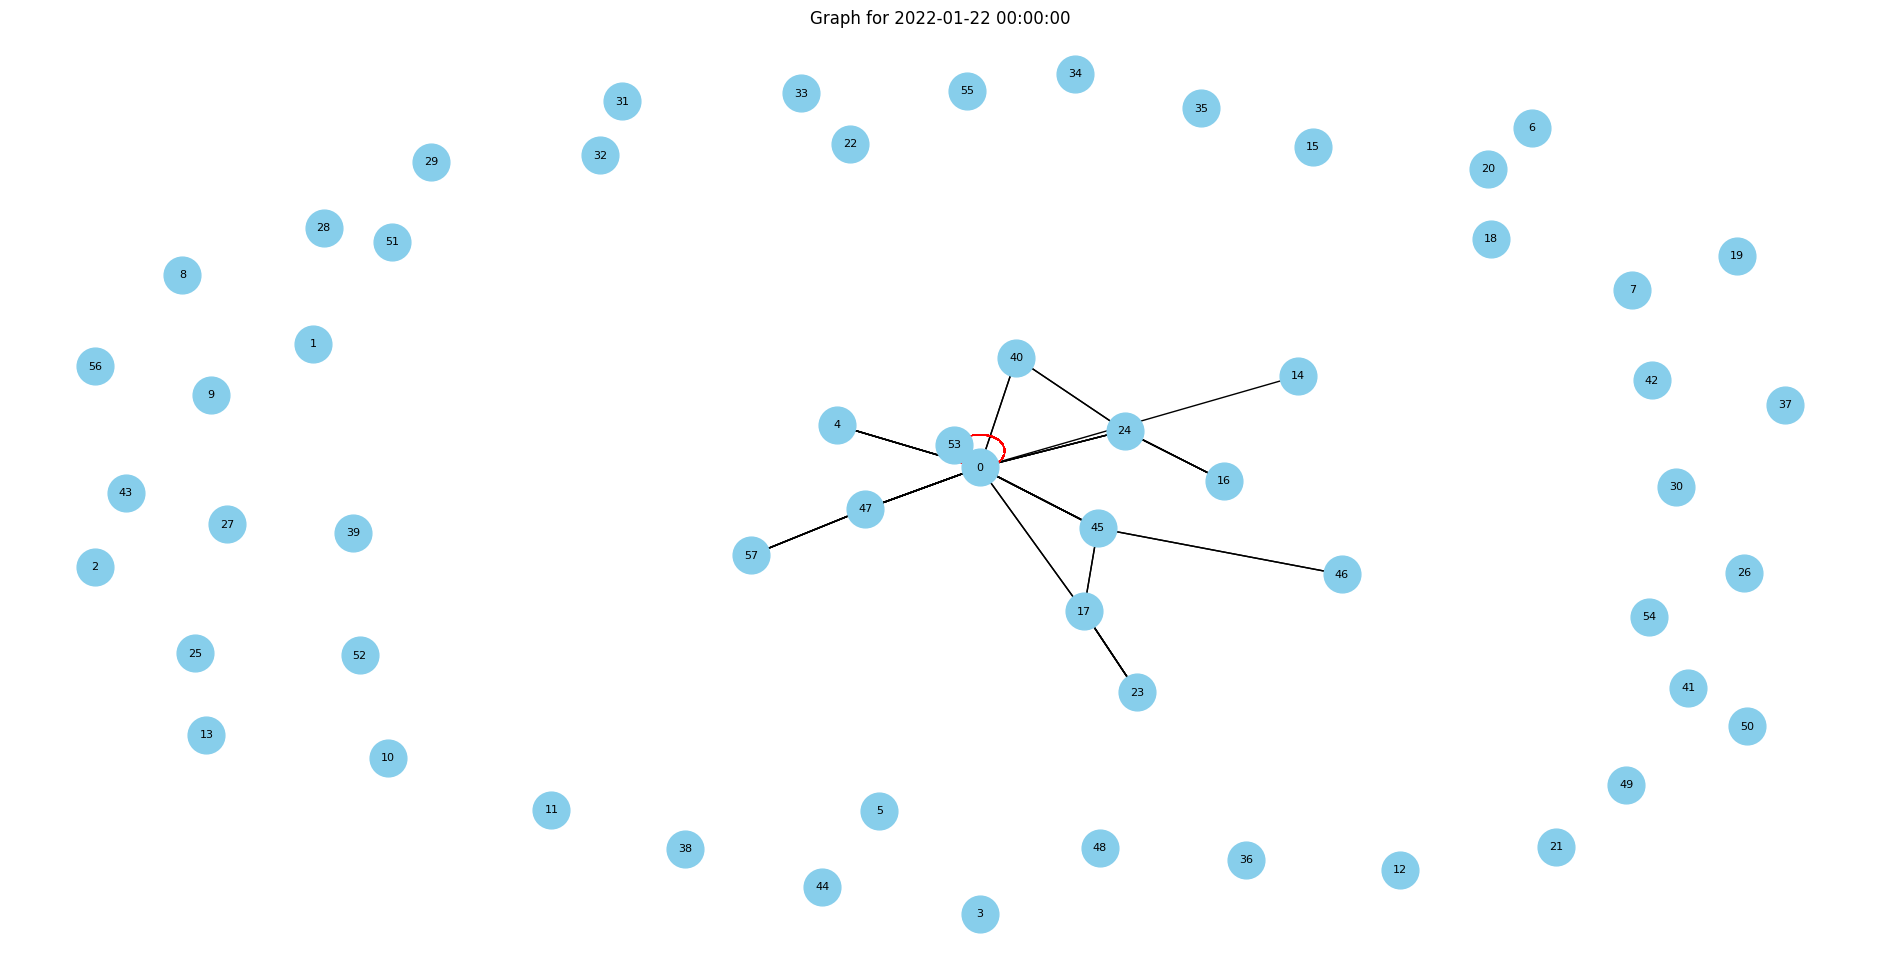

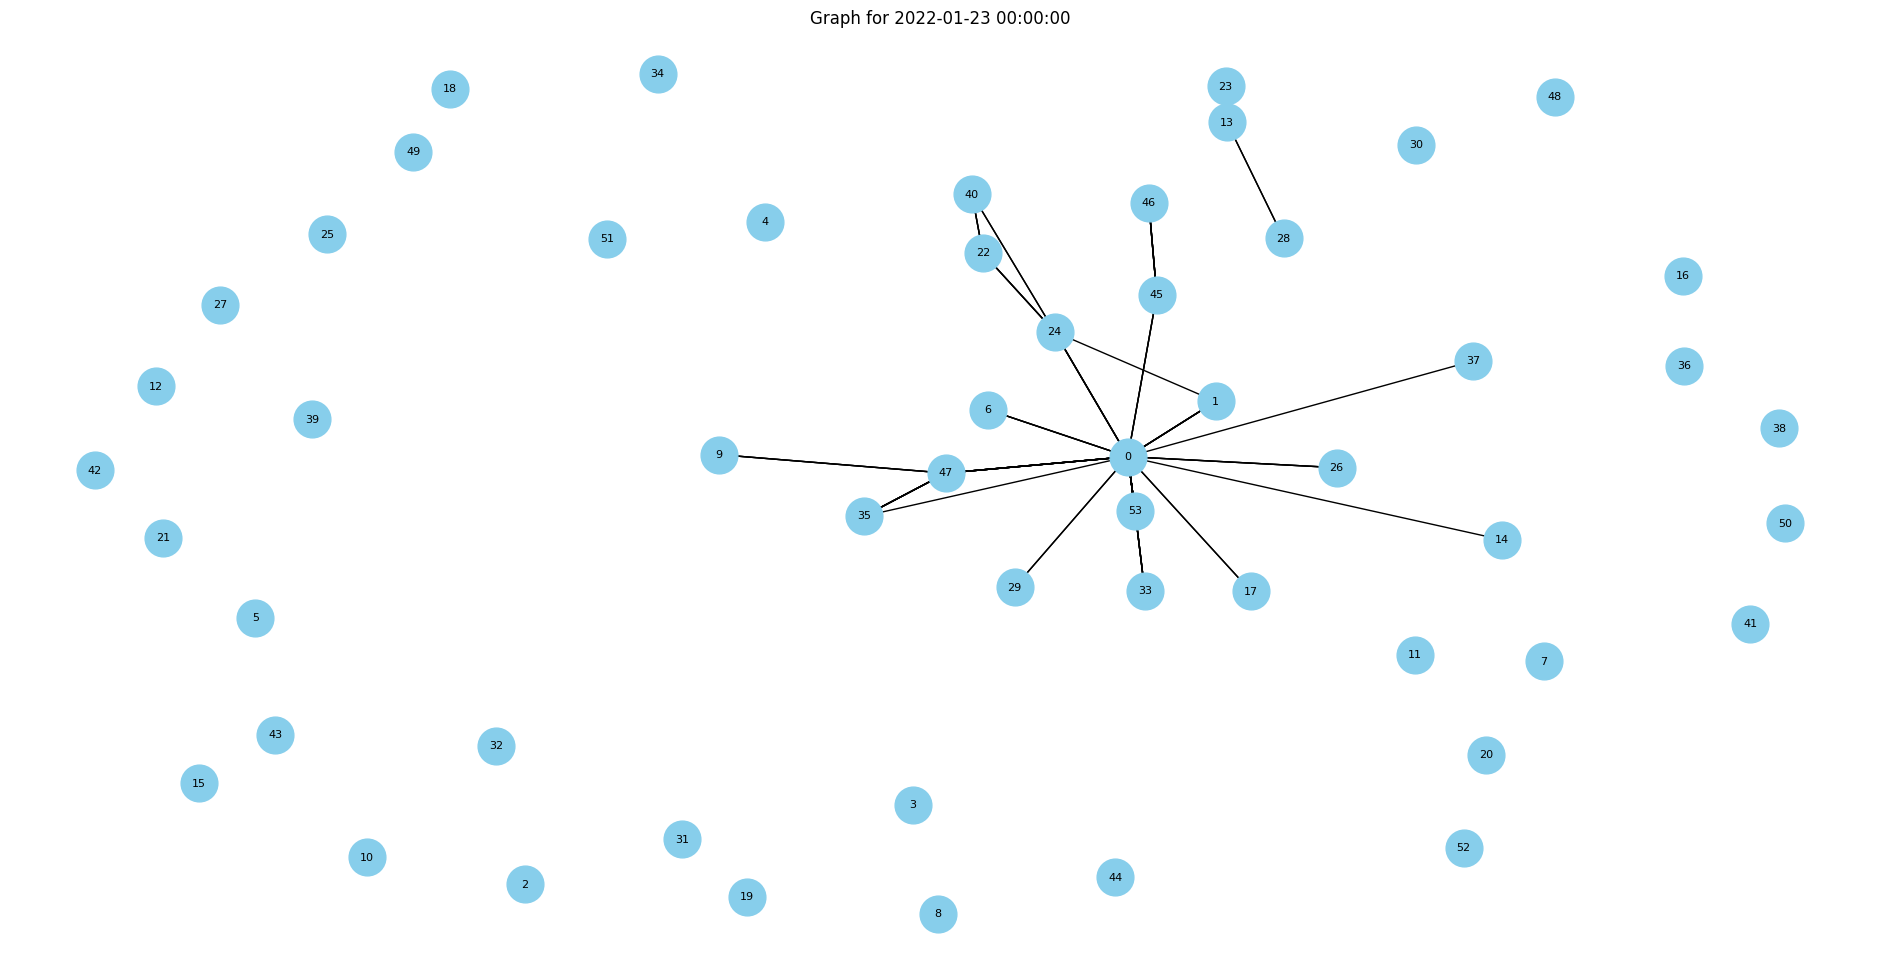

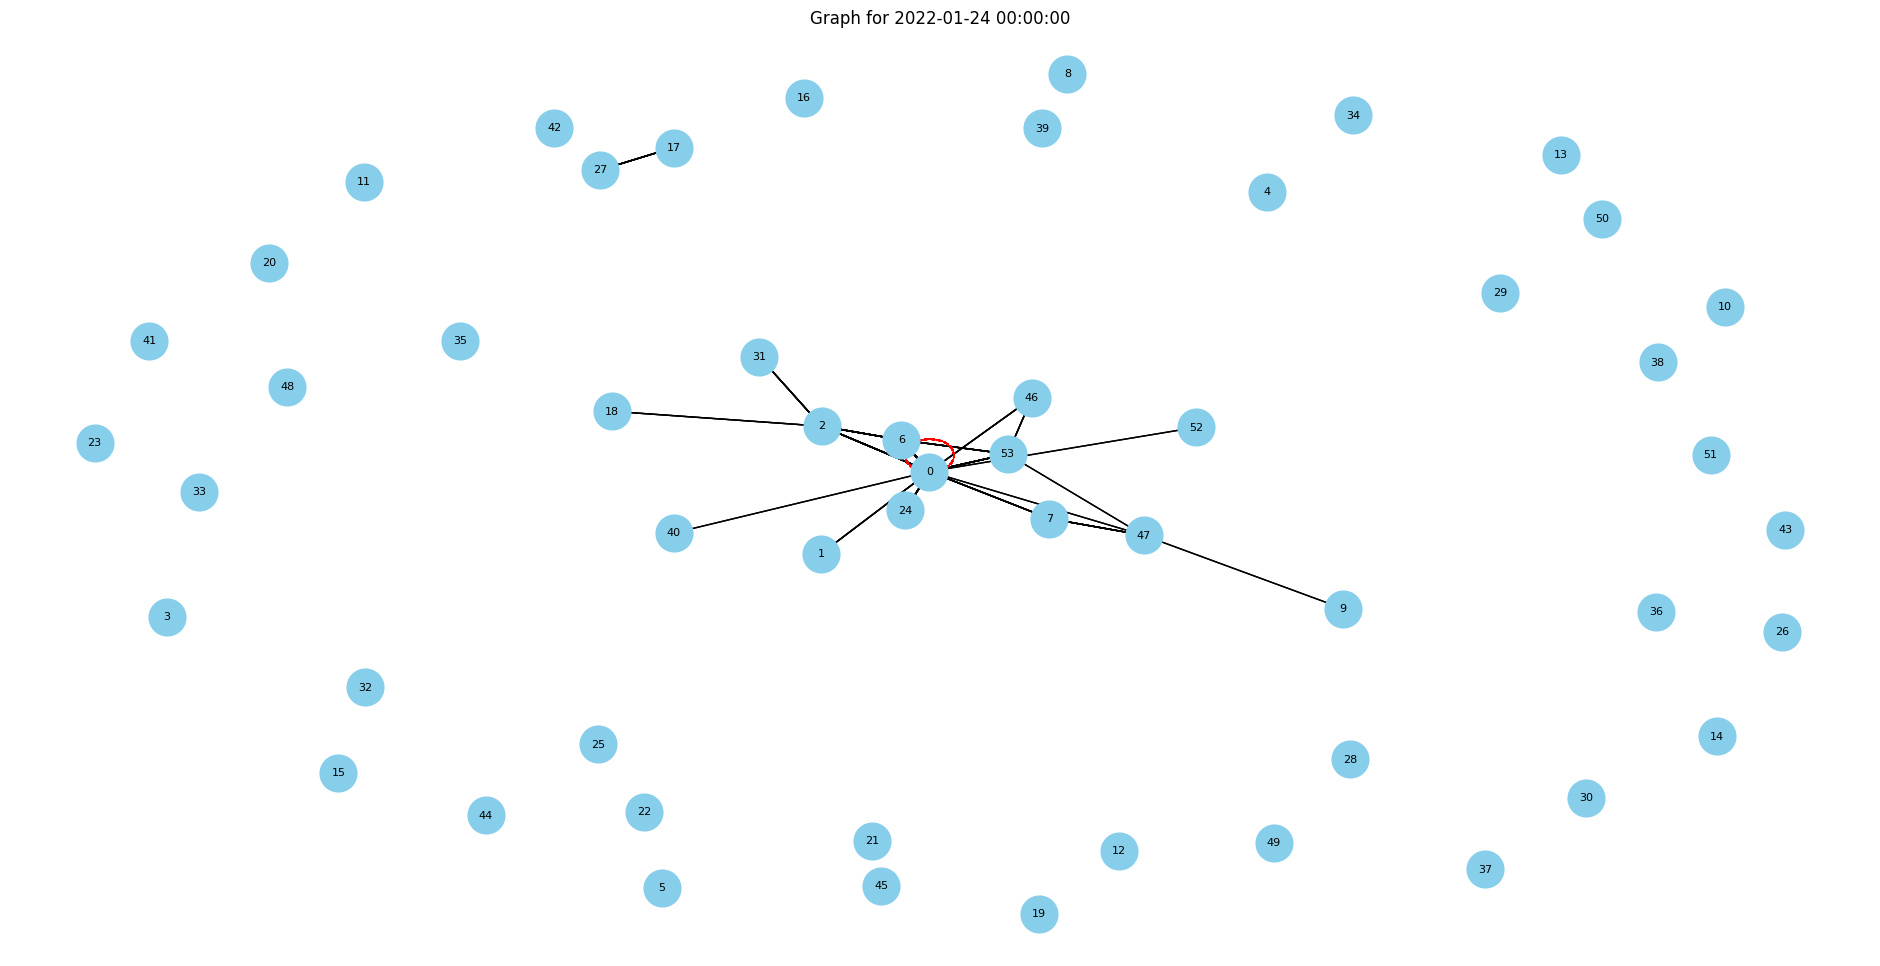

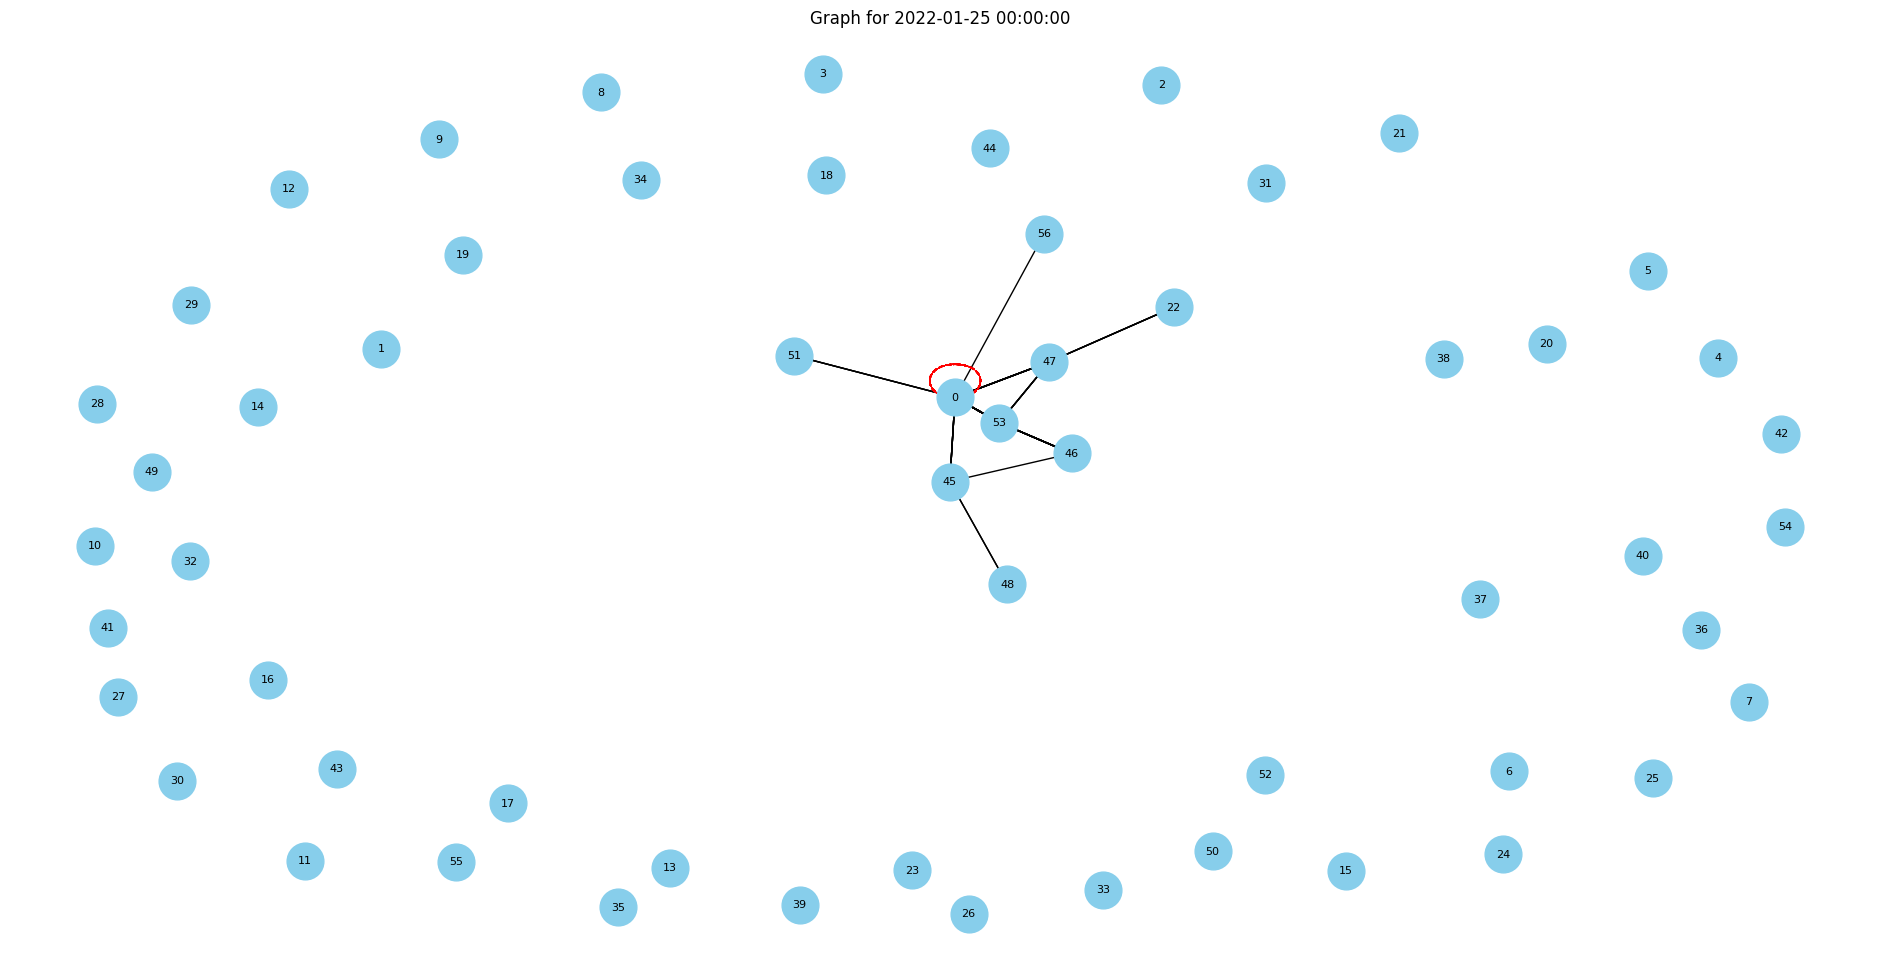

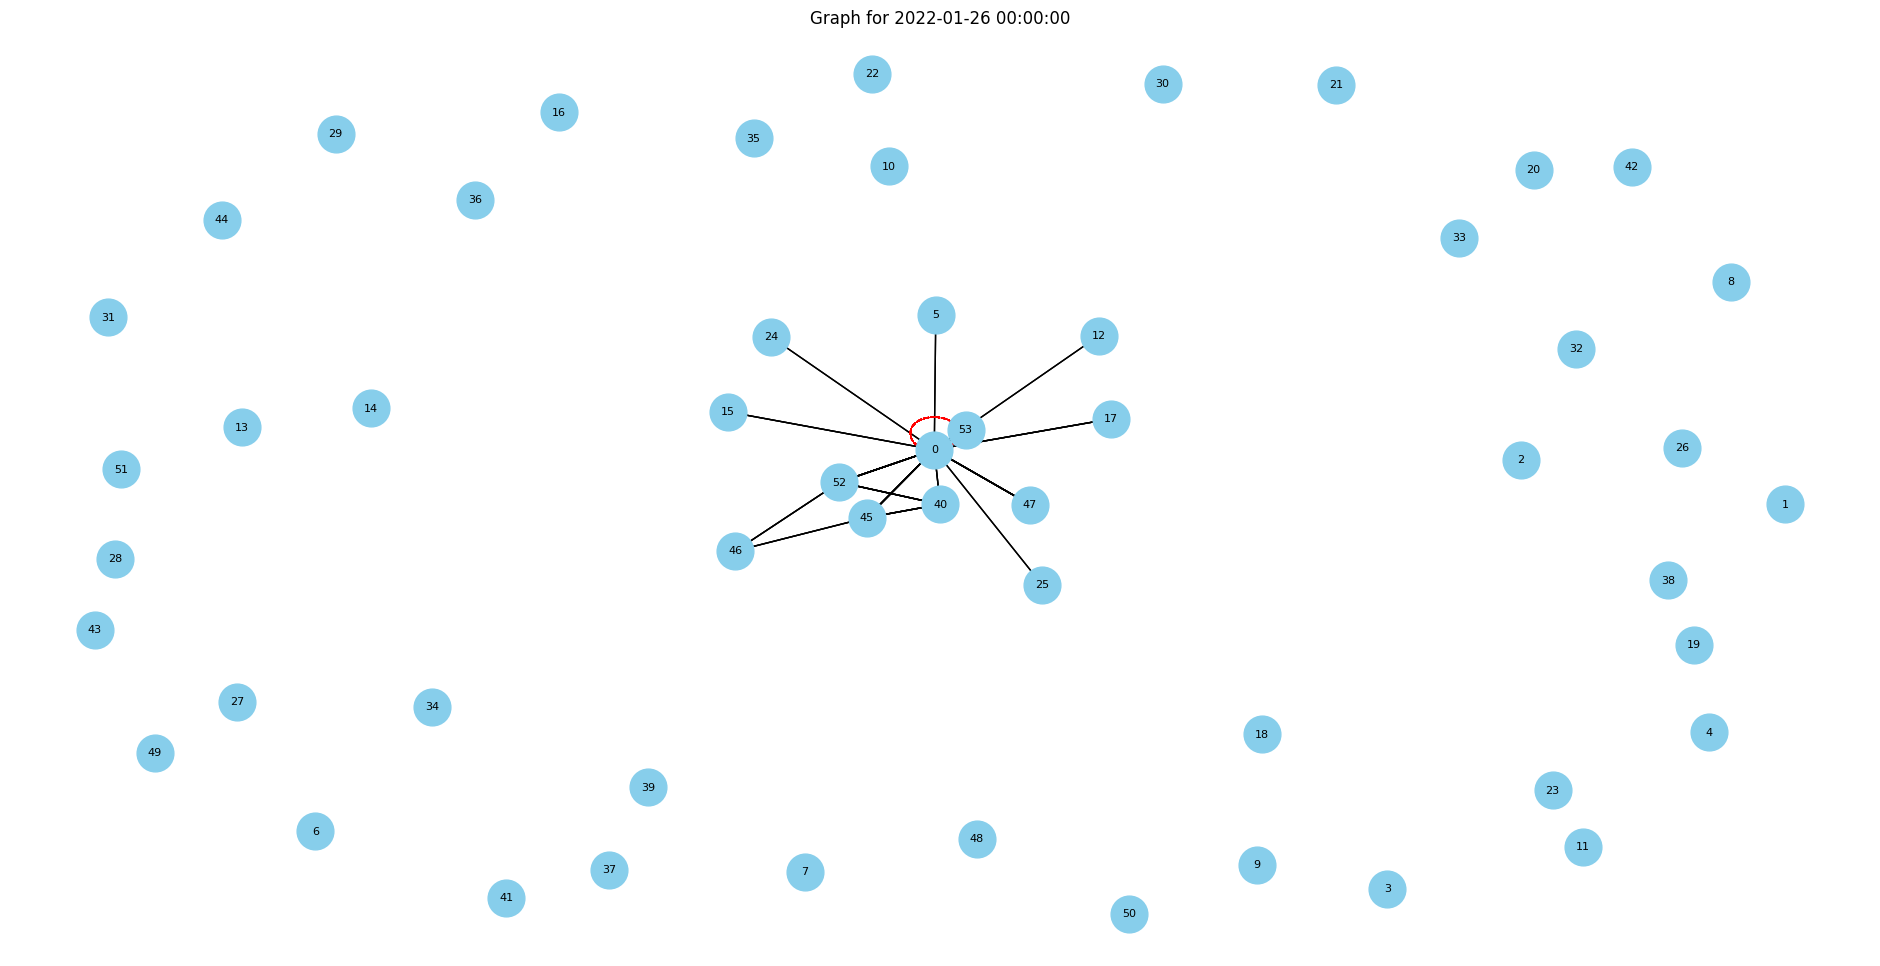

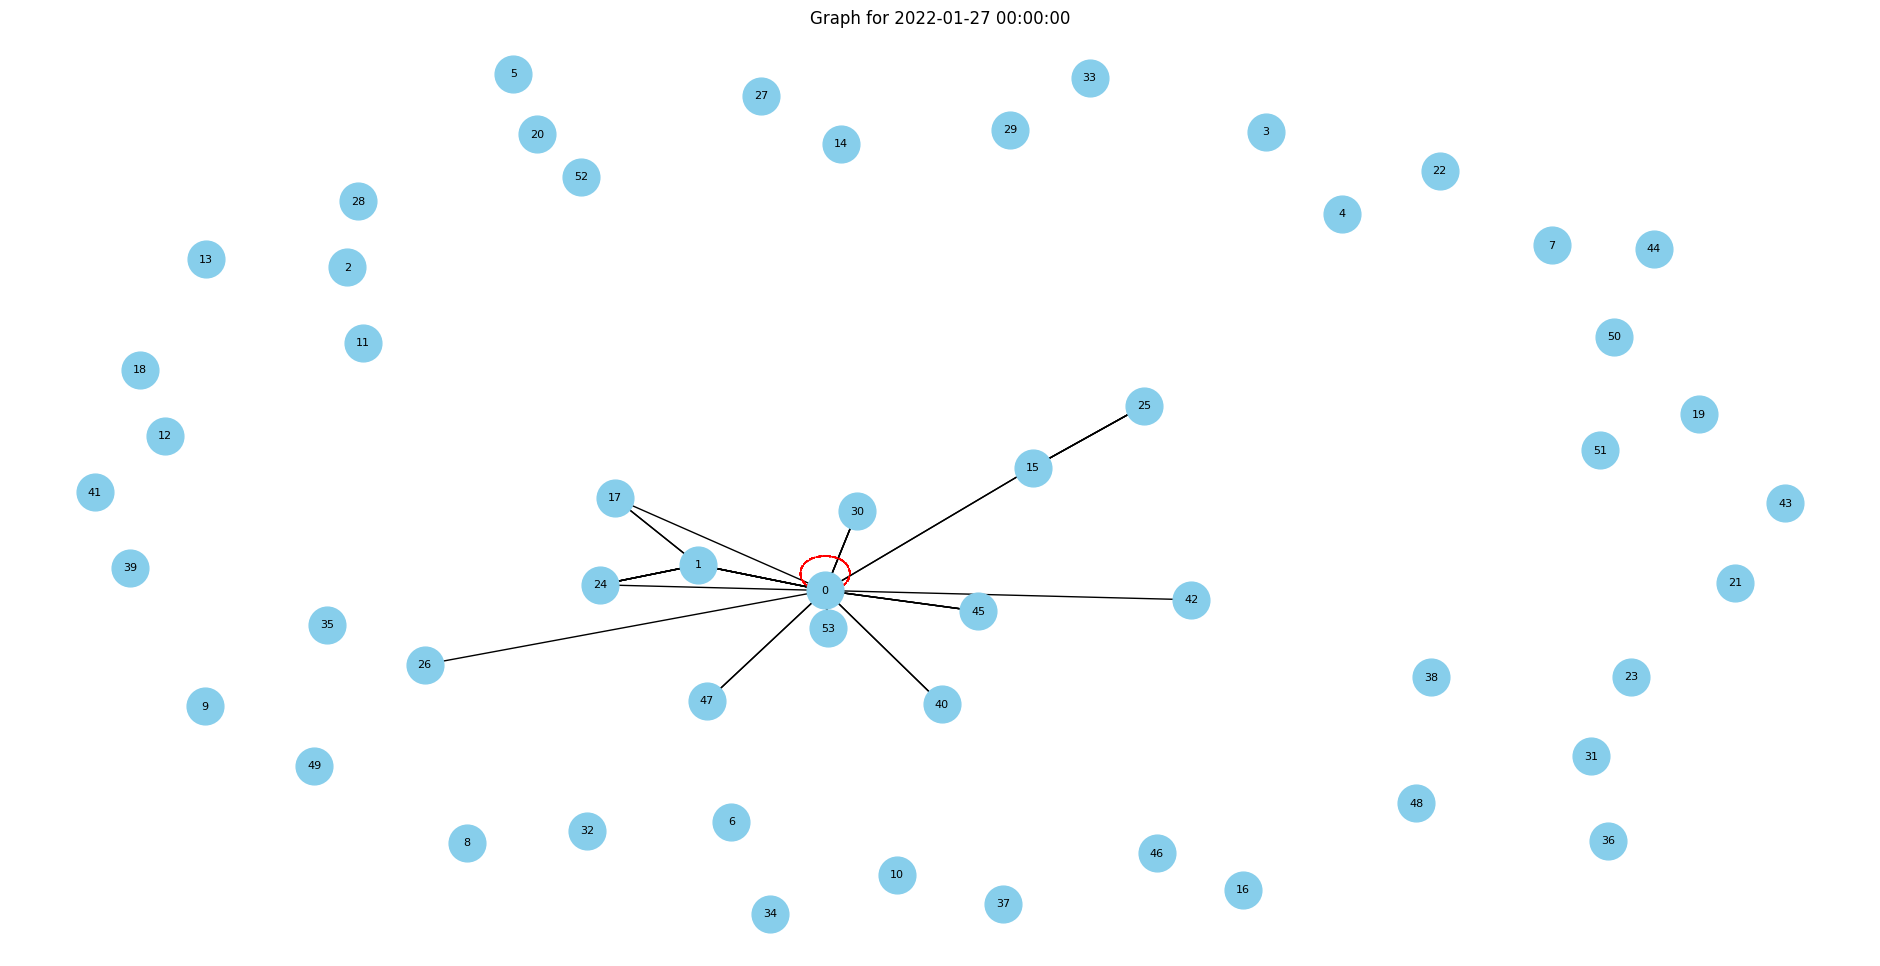

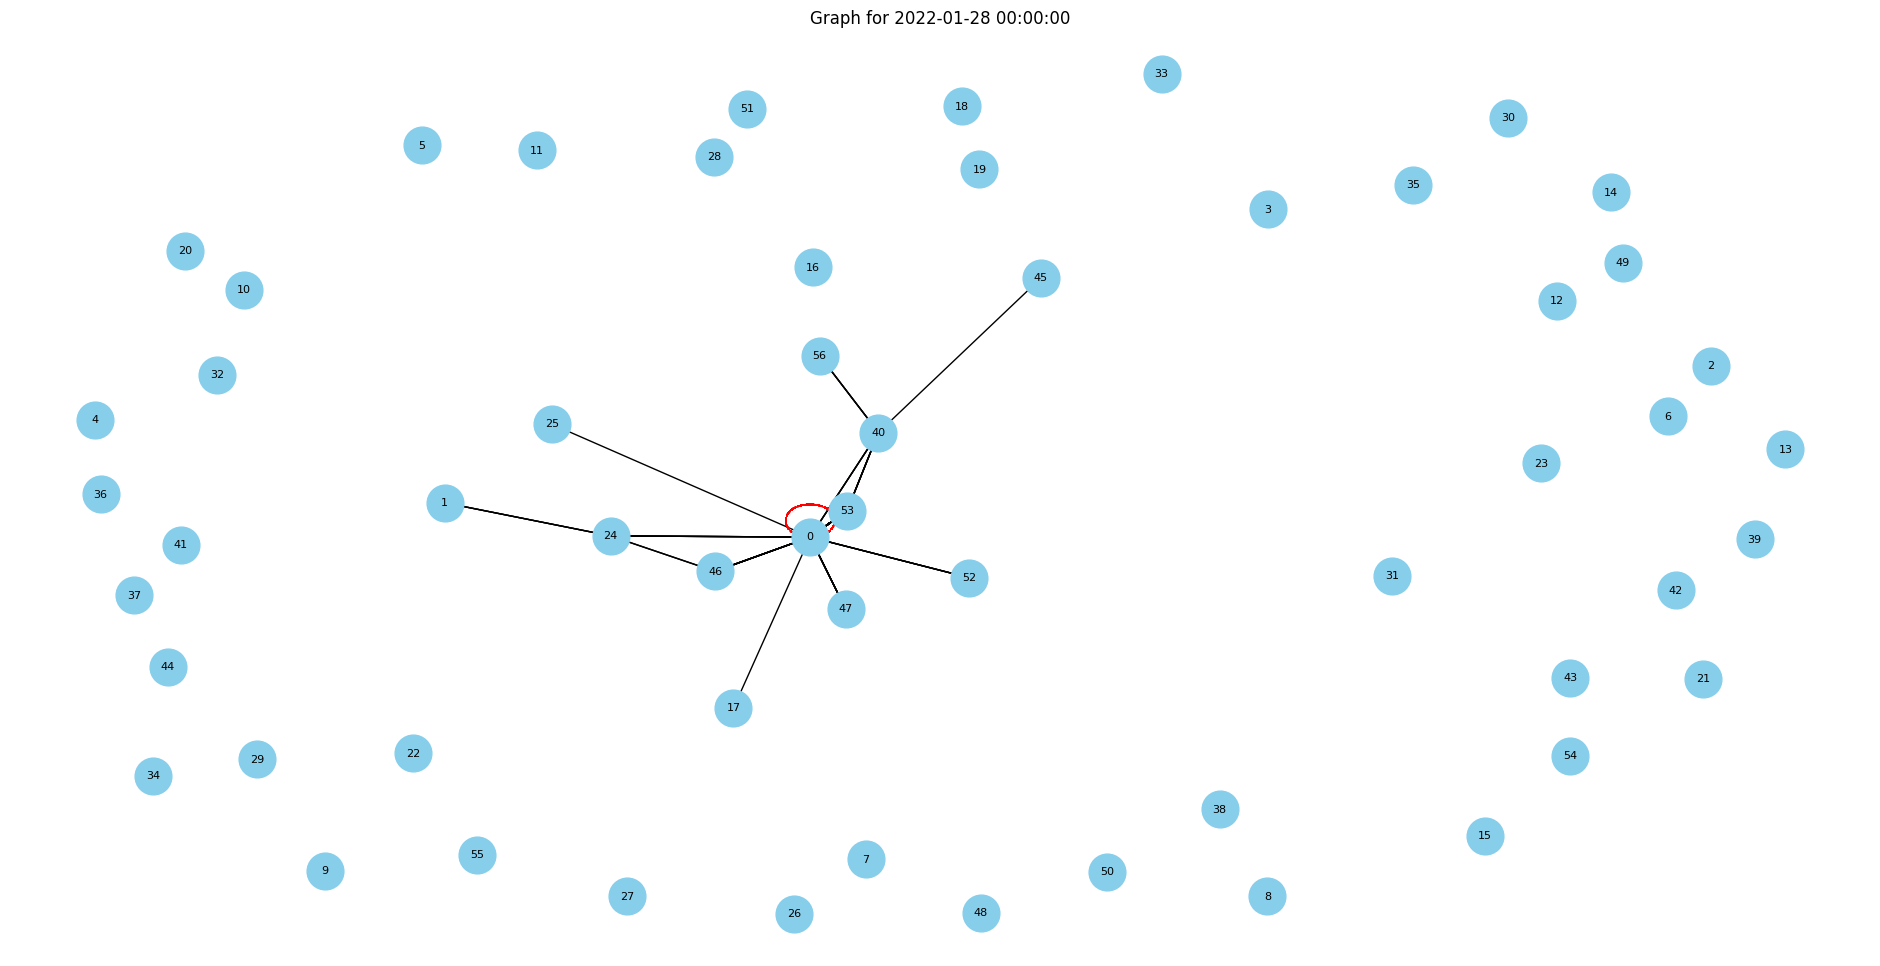

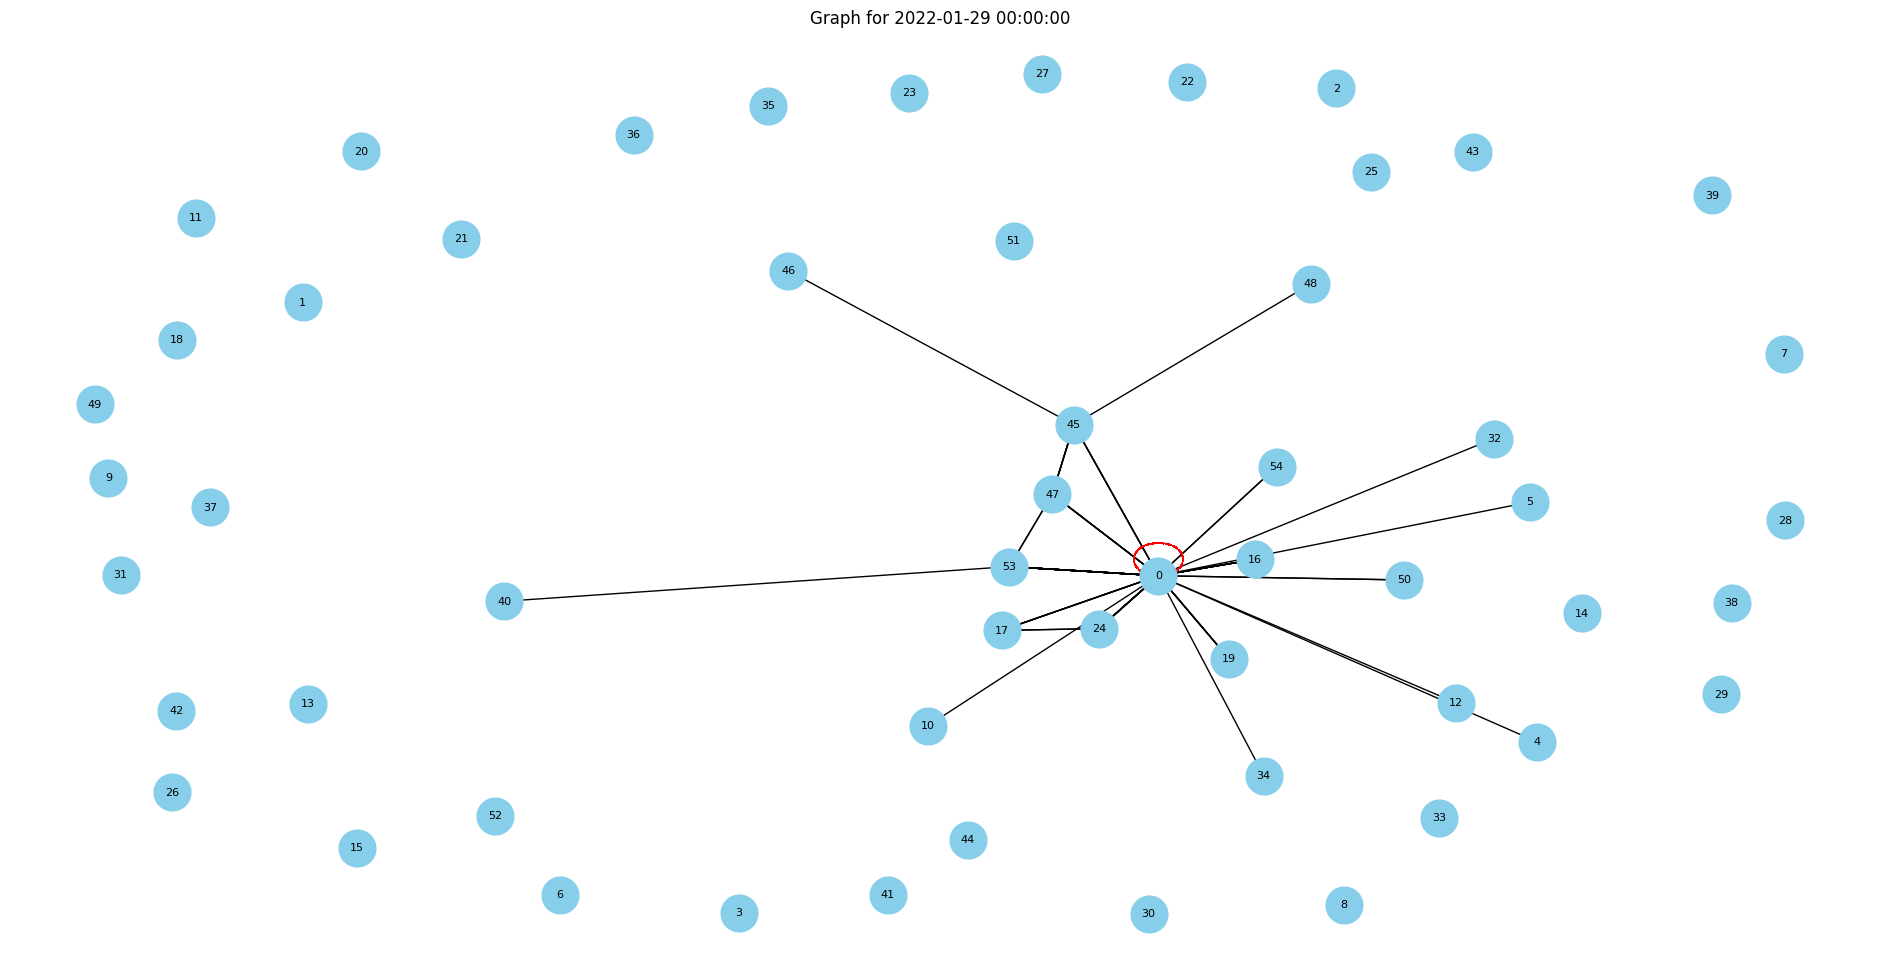

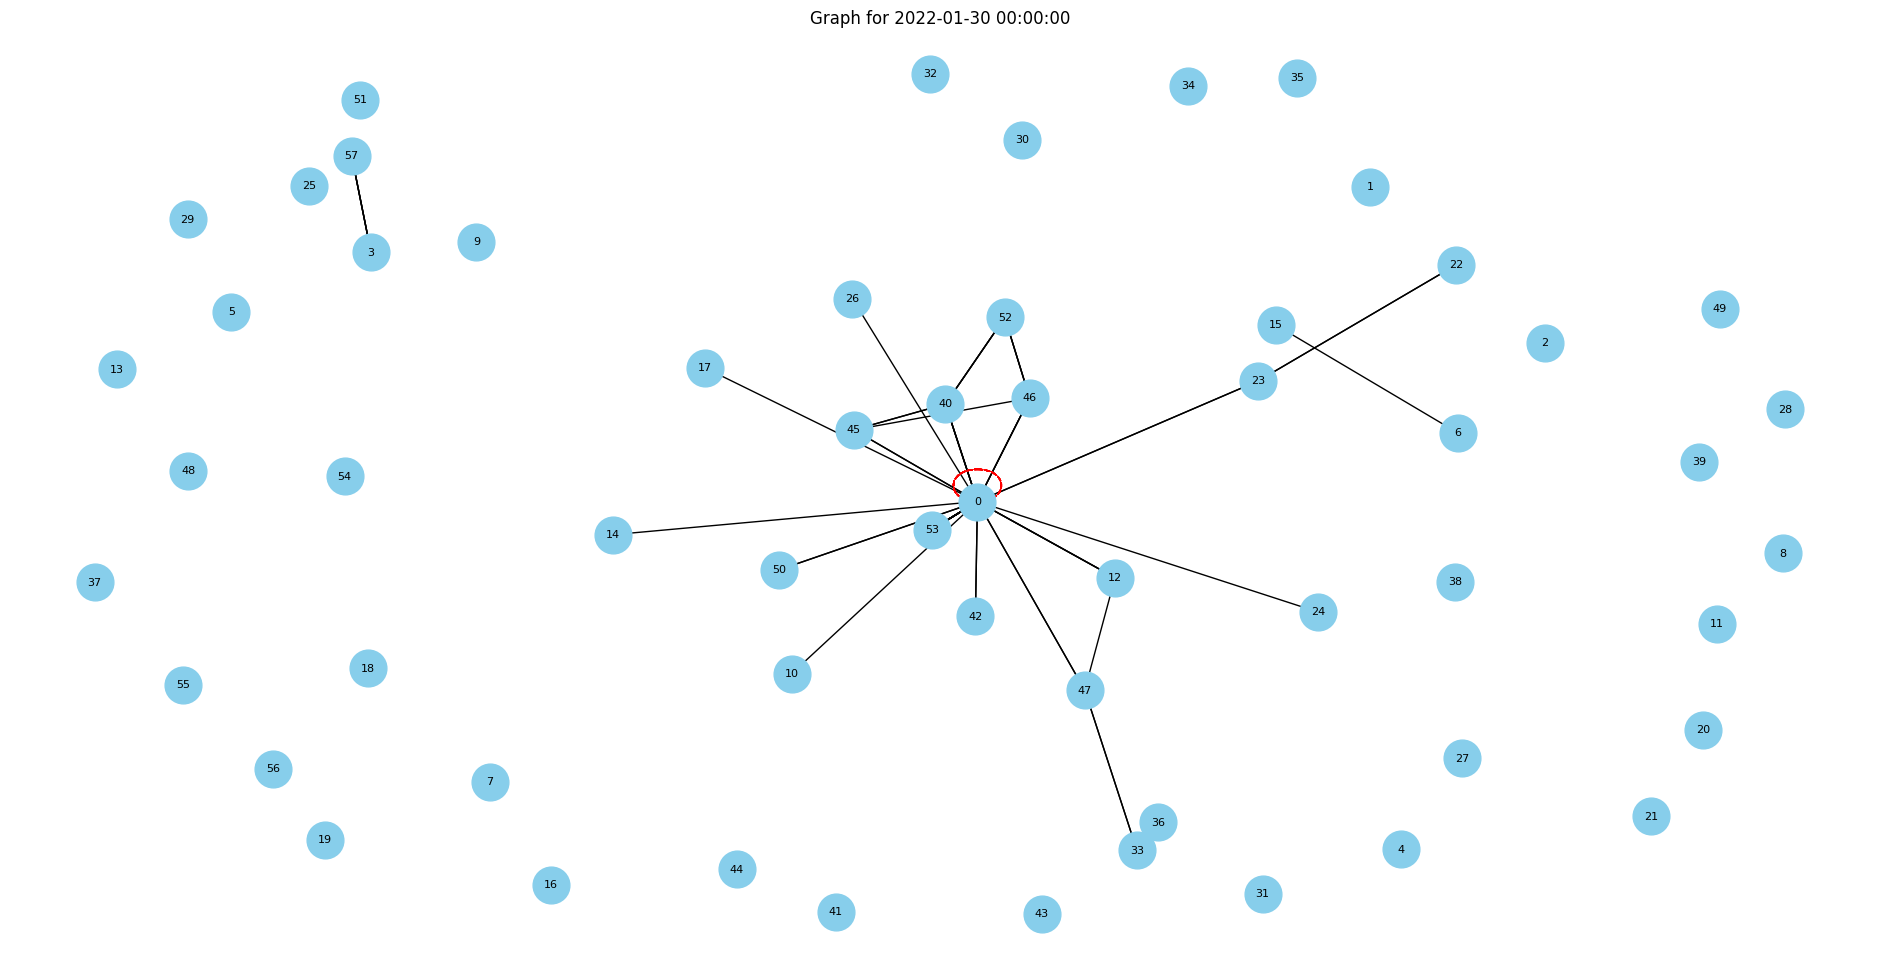

In [128]:
import matplotlib.pyplot as plt
import networkx as nx

# Loop through each graph in the dictionary
for date, G in graphs_by_date.items():
    # Convert the DGL graph to a NetworkX graph
    nx_G = G.to_networkx().to_undirected()
    
    # Use the spring layout to position nodes, with adjusted spacing
    pos = nx.spring_layout(nx_G, k=0.3, iterations=20)  # Adjust k for more spacing
    
    # Manually scale positions to increase space
    for node in pos:
        pos[node] = [pos[node][0] * 2, pos[node][1] * 2]  # Scale for more spacing
    
    plt.figure(figsize=(24, 12))
    
    # Draw non-self-loop edges
    regular_edges = [(u, v) for u, v in nx_G.edges() if u != v]
    nx.draw_networkx_edges(nx_G, pos, edgelist=regular_edges, edge_color='black')
    
    # Draw self-loop edges with a different style
    self_loop_edges = [(u, v) for u, v in nx_G.edges() if u == v]
    nx.draw_networkx_edges(nx_G, pos, edgelist=self_loop_edges, edge_color='red', style='dashed')

    # Draw the nodes
    nx.draw_networkx_nodes(nx_G, pos, node_size=700, node_color='skyblue')
    
    # Draw the node labels
    nx.draw_networkx_labels(nx_G, pos, font_size=8)
    
    plt.title(f"Graph for {date}")
    plt.axis('off')  # Hide the axes
    plt.show()


In [129]:
for date, g in graphs_by_date.items():
    graphs_by_date[date] = dgl.add_self_loop(g)

In [130]:
def collate(samples):
    graphs = [sample for sample in samples]
    batched_graph = dgl.batch(graphs)
    return batched_graph

In [131]:
from torch.utils.data import DataLoader

# Convert the dictionary to a list for DataLoader
graph_list = list(graphs_by_date.values())

# Create a DataLoader
data_loader = DataLoader(graph_list, batch_size=1, shuffle=True, collate_fn=collate)


In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
import dgl.nn as dglnn
class EdgePredictingGAT(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(EdgePredictingGAT, self).__init__()
        self.conv1 = dglnn.GATConv(in_feats, hidden_size, num_heads=1)
        self.conv2 = dglnn.GATConv(hidden_size, hidden_size, num_heads=1)
        self.edge_predictor = nn.Linear(2 * hidden_size, num_classes)

    def forward(self, g, node_features):
        # Apply GNN layers
        h = self.conv1(g, node_features).flatten(1)
        h = F.relu(h)
        h = self.conv2(g, h).flatten(1)

        # Predict edge features
        src, dst = g.edges()
        edge_features = torch.cat([h[src], h[dst]], dim=1)
        return self.edge_predictor(edge_features)

# Initialize the model
model = EdgePredictingGAT(in_feats=1, hidden_size=16, num_classes=len(y_encoder.classes_))


In [133]:
import torch

def create_node_features_from_edges(graph, edge_feature_name):
    # Initialize node features with zeros
    node_features = torch.zeros((graph.num_nodes(), 1), dtype=torch.float32)

    # For each edge, add its feature to both the source and destination node
    for src, dst in zip(graph.edges()[0], graph.edges()[1]):
        edge_feature = graph.edata[edge_feature_name][src]
        node_features[src] += edge_feature
        node_features[dst] += edge_feature

    return node_features


In [134]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
# Training loop
# Training loop
for epoch in range(50):  # number of epochs
    for batched_graph in data_loader:
        # Create node features from edge features
        node_features = create_node_features_from_edges(batched_graph, 'scaled_mood')
        
        # Forward pass
        edge_logits = model(batched_graph, node_features)
        loss = criterion(edge_logits, batched_graph.edata['y'])
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch}, Loss: {loss.item()}")




Epoch 0, Loss: 6572.03173828125
Epoch 0, Loss: 3028.239990234375
Epoch 0, Loss: 6903.7177734375
Epoch 0, Loss: 8464.1796875
Epoch 0, Loss: 208.7289276123047
Epoch 0, Loss: 5271.4599609375
Epoch 0, Loss: 796.0234375
Epoch 0, Loss: 5058.12548828125
Epoch 0, Loss: 130.43099975585938
Epoch 0, Loss: 68.9684829711914
Epoch 0, Loss: 1010.3032836914062
Epoch 0, Loss: 1599.11474609375
Epoch 0, Loss: 3249.033203125
Epoch 0, Loss: 3796.397216796875
Epoch 0, Loss: 1293.2674560546875
Epoch 0, Loss: 8710.6611328125
Epoch 0, Loss: 475.9247131347656
Epoch 0, Loss: 11888.4111328125
Epoch 0, Loss: 279.8118591308594
Epoch 0, Loss: 1947.8319091796875
Epoch 0, Loss: 7249.21875
Epoch 0, Loss: 3099.1708984375
Epoch 0, Loss: 1515.2156982421875
Epoch 0, Loss: 864.5857543945312
Epoch 0, Loss: 4011.017578125
Epoch 0, Loss: 1547.2877197265625
Epoch 0, Loss: 357.28009033203125
Epoch 0, Loss: 3473.79443359375
Epoch 0, Loss: 382.70166015625
Epoch 0, Loss: 572.37548828125
Epoch 1, Loss: 935.6489868164062
Epoch 1, Los

Epoch 8, Loss: 132.32054138183594
Epoch 8, Loss: 215.65797424316406
Epoch 8, Loss: 5.439244270324707
Epoch 8, Loss: 65.84068298339844
Epoch 8, Loss: 827.9078979492188
Epoch 8, Loss: 544.1408081054688
Epoch 8, Loss: 1202.8232421875
Epoch 8, Loss: 157.16702270507812
Epoch 8, Loss: 166.13412475585938
Epoch 8, Loss: 89.83496856689453
Epoch 8, Loss: 951.0863647460938
Epoch 8, Loss: 153.71041870117188
Epoch 8, Loss: 975.0277099609375
Epoch 8, Loss: 1174.167724609375
Epoch 8, Loss: 94.53614807128906
Epoch 8, Loss: 502.8935852050781
Epoch 8, Loss: 269.6259765625
Epoch 8, Loss: 522.7930908203125
Epoch 9, Loss: 447.26458740234375
Epoch 9, Loss: 80.02643585205078
Epoch 9, Loss: 213.22178649902344
Epoch 9, Loss: 297.2839050292969
Epoch 9, Loss: 227.57557678222656
Epoch 9, Loss: 225.53842163085938
Epoch 9, Loss: 3088.377685546875
Epoch 9, Loss: 49.2452278137207
Epoch 9, Loss: 313.01287841796875
Epoch 9, Loss: 1.6237819194793701
Epoch 9, Loss: 136.29623413085938
Epoch 9, Loss: 571.9594116210938
Epoc

Epoch 16, Loss: 1042.466552734375
Epoch 16, Loss: 2768.212646484375
Epoch 16, Loss: 6920.28173828125
Epoch 16, Loss: 1240.0433349609375
Epoch 16, Loss: 177.16993713378906
Epoch 16, Loss: 315.54840087890625
Epoch 16, Loss: 1862.0435791015625
Epoch 16, Loss: 1010.2405395507812
Epoch 16, Loss: 2658.809326171875
Epoch 16, Loss: 667.3070678710938
Epoch 16, Loss: 761.993896484375
Epoch 16, Loss: 414.01458740234375
Epoch 16, Loss: 441.2618713378906
Epoch 16, Loss: 433.49615478515625
Epoch 17, Loss: 1095.4085693359375
Epoch 17, Loss: 2647.3037109375
Epoch 17, Loss: 388.100341796875
Epoch 17, Loss: 1473.2109375
Epoch 17, Loss: 482.4186096191406
Epoch 17, Loss: 93.79466247558594
Epoch 17, Loss: 273.15167236328125
Epoch 17, Loss: 52.980464935302734
Epoch 17, Loss: 341.5703125
Epoch 17, Loss: 734.58154296875
Epoch 17, Loss: 155.3878631591797
Epoch 17, Loss: 1121.6197509765625
Epoch 17, Loss: 83.43618774414062
Epoch 17, Loss: 175.16156005859375
Epoch 17, Loss: 113.78863525390625
Epoch 17, Loss: 580

Epoch 24, Loss: 65.4863052368164
Epoch 24, Loss: 670.812744140625
Epoch 24, Loss: 53.35273742675781
Epoch 24, Loss: 85.00004577636719
Epoch 24, Loss: 93.71627044677734
Epoch 24, Loss: 157.91416931152344
Epoch 24, Loss: 7.816625118255615
Epoch 24, Loss: 49.75264358520508
Epoch 24, Loss: 94.78350830078125
Epoch 24, Loss: 7.346169471740723
Epoch 25, Loss: 97.7964096069336
Epoch 25, Loss: 87.13053131103516
Epoch 25, Loss: 8.507450103759766
Epoch 25, Loss: 74.26820373535156
Epoch 25, Loss: 45.90235900878906
Epoch 25, Loss: 58.52650833129883
Epoch 25, Loss: 12.49220085144043
Epoch 25, Loss: 2.1698710918426514
Epoch 25, Loss: 11.774951934814453
Epoch 25, Loss: 118.98748016357422
Epoch 25, Loss: 257.1191711425781
Epoch 25, Loss: 22.2168025970459
Epoch 25, Loss: 271.6418151855469
Epoch 25, Loss: 322.6422424316406
Epoch 25, Loss: 4.4648847579956055
Epoch 25, Loss: 104.78315734863281
Epoch 25, Loss: 67.53709411621094
Epoch 25, Loss: 19.382308959960938
Epoch 25, Loss: 34.51026153564453
Epoch 25, L

Epoch 32, Loss: 59.845149993896484
Epoch 32, Loss: 33.004798889160156
Epoch 32, Loss: 23.310283660888672
Epoch 32, Loss: 49.912994384765625
Epoch 32, Loss: 31.25281524658203
Epoch 32, Loss: 16.108335494995117
Epoch 32, Loss: 5.3853325843811035
Epoch 32, Loss: 26.122482299804688
Epoch 32, Loss: 17.595701217651367
Epoch 32, Loss: 10.483147621154785
Epoch 32, Loss: 13.252357482910156
Epoch 33, Loss: 7.865074157714844
Epoch 33, Loss: 20.093212127685547
Epoch 33, Loss: 17.829320907592773
Epoch 33, Loss: 15.753681182861328
Epoch 33, Loss: 4.063340663909912
Epoch 33, Loss: 97.42852783203125
Epoch 33, Loss: 16.192846298217773
Epoch 33, Loss: 11.542593002319336
Epoch 33, Loss: 26.469398498535156
Epoch 33, Loss: 5.026772499084473
Epoch 33, Loss: 281.7530212402344
Epoch 33, Loss: 11.658833503723145
Epoch 33, Loss: 24.72043800354004
Epoch 33, Loss: 1.0978977680206299
Epoch 33, Loss: 38.64319610595703
Epoch 33, Loss: 30.456069946289062
Epoch 33, Loss: 144.23545837402344
Epoch 33, Loss: 12.710950851

Epoch 40, Loss: 117.2491455078125
Epoch 40, Loss: 5.076004505157471
Epoch 40, Loss: 48.520992279052734
Epoch 40, Loss: 5.4288434982299805
Epoch 40, Loss: 19.130680084228516
Epoch 40, Loss: 24.29061508178711
Epoch 40, Loss: 34.99736404418945
Epoch 40, Loss: 20.808879852294922
Epoch 40, Loss: 58.50873947143555
Epoch 40, Loss: 1.4996434450149536
Epoch 40, Loss: 11.585014343261719
Epoch 41, Loss: 31.81962013244629
Epoch 41, Loss: 4.8998260498046875
Epoch 41, Loss: 44.526275634765625
Epoch 41, Loss: 24.69779396057129
Epoch 41, Loss: 11.48596477508545
Epoch 41, Loss: 0.9978158473968506
Epoch 41, Loss: 15.376179695129395
Epoch 41, Loss: 6.652238368988037
Epoch 41, Loss: 50.01490783691406
Epoch 41, Loss: 19.875438690185547
Epoch 41, Loss: 58.80622863769531
Epoch 41, Loss: 19.13272476196289
Epoch 41, Loss: 45.52267837524414
Epoch 41, Loss: 25.85453224182129
Epoch 41, Loss: 7.518688201904297
Epoch 41, Loss: 1.4744774103164673
Epoch 41, Loss: 9.184125900268555
Epoch 41, Loss: 16.169626235961914
E

Epoch 48, Loss: 14.390201568603516
Epoch 48, Loss: 13.601704597473145
Epoch 48, Loss: 1.1447588205337524
Epoch 48, Loss: 2.084534168243408
Epoch 48, Loss: 21.946319580078125
Epoch 48, Loss: 7.328859806060791
Epoch 48, Loss: 4.192868232727051
Epoch 48, Loss: 63.67133712768555
Epoch 48, Loss: 21.502933502197266
Epoch 49, Loss: 12.05311107635498
Epoch 49, Loss: 2.2631707191467285
Epoch 49, Loss: 7.804599285125732
Epoch 49, Loss: 6.141128063201904
Epoch 49, Loss: 5.192869663238525
Epoch 49, Loss: 8.569175720214844
Epoch 49, Loss: 3.1089510917663574
Epoch 49, Loss: 4.312250137329102
Epoch 49, Loss: 14.39106559753418
Epoch 49, Loss: 48.94218063354492
Epoch 49, Loss: 2.7860069274902344
Epoch 49, Loss: 3.5493075847625732
Epoch 49, Loss: 3.6839256286621094
Epoch 49, Loss: 17.61658477783203
Epoch 49, Loss: 45.40618133544922
Epoch 49, Loss: 84.77597045898438
Epoch 49, Loss: 2.7346713542938232
Epoch 49, Loss: 21.678443908691406
Epoch 49, Loss: 22.289958953857422
Epoch 49, Loss: 20.171979904174805


## Prediction

In [135]:
# Example DataFrame for testing
#test_df = pd.read_csv("C:/gdelt/test_gcl.csv, sep = '\t')  
#df1 = pd.read_csv("C:/gdelt/gdelt_data_combined/GDELT_merged_1998to2023.csv", sep='\t')
test_df = pd.read_csv("./Data/test_gcl.csv", sep=',')

In [136]:
print(test_df.head())

      SQLDATE Actor1CountryCode Actor1Type1Code Actor2CountryCode  \
0  29-01-2022               NaN             NaN               FRA   
1  29-01-2022               NaN             LEG               NaN   
2  29-01-2022               NaN             GOV               NaN   
3  29-01-2022               NaN             GOV               NaN   
4  29-01-2022               NaN             NaN               NaN   

  Actor2Type1Code  IsRootEvent  EventCode  EventBaseCode  EventRootCode  \
0             NaN            1        141            141             14   
1             NaN            1         12             12              1   
2             CVL            0        173            173             17   
3             NaN            0        141            141             14   
4             OPP            0        141            141             14   

   QuadClass Actor1Geo_CountryCode Actor2Geo_CountryCode  ActionGeo_Type  \
0          3                   NaN                    FR  

In [137]:
# Preprocess test DataFrame
test_df['SQLDATE'] = pd.to_datetime(test_df['SQLDATE'])
actor1_test_encoded = country1_encoder.transform(test_df['Actor1CountryCode'].fillna(''))
actor2_test_encoded = country2_encoder.transform(test_df['Actor2CountryCode'].fillna(''))

# test_df['y'] = y_encoder.transform(test_df['y'])

# Create test graph

chosen_date = '2023-01-01'  # Replace with your chosen date
test_date = pd.to_datetime(chosen_date)

test_group = test_df[test_df['SQLDATE'] == test_date]

test_graph = dgl.graph((torch.tensor(actor1_test_encoded[test_group.index]), torch.tensor(actor2_test_encoded[test_group.index])))
test_graph.edata['scaled_mood'] = torch.tensor(test_group['scaled_mood'].values, dtype=torch.float32)

# test_graph.edata['y'] = torch.tensor(test_group['y'].values, dtype=torch.int64)

# Add self loops
test_graph = dgl.add_self_loop(test_graph)


C:\Users\aadit\AppData\Local\Temp\ipykernel_13064\3103709282.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_df['SQLDATE'] = pd.to_datetime(test_df['SQLDATE'])


In [138]:
# Preprocess test DataFrame
test_df['SQLDATE'] = pd.to_datetime(test_df['SQLDATE'])
actor1_test_encoded = country1_encoder.transform(test_df['Actor1CountryCode'].fillna(''))
actor2_test_encoded = country2_encoder.transform(test_df['Actor2CountryCode'].fillna(''))

chosen_date = '2022-01-30'  # The chosen date for testing
test_date = pd.to_datetime(chosen_date)

# Filter test DataFrame for the chosen date
test_group = test_df[test_df['SQLDATE'] == test_date]

# print statements
print("Number of rows in test_group:", len(test_group))
if test_group.empty:
    print("No data available for the chosen date.")

# Verify the length of encoded arrays
print("Length of actor1_test_encoded:", len(actor1_test_encoded))
print("Length of actor2_test_encoded:", len(actor2_test_encoded))
print("Sample of encoded values:", actor1_test_encoded[:5], actor2_test_encoded[:5])

# Create test graph
test_graph = dgl.graph((torch.tensor(actor1_test_encoded[test_group.index]), torch.tensor(actor2_test_encoded[test_group.index])))
print("Number of edges in test graph:", test_graph.num_edges())

# Add 'scaled_mood' feature to the test graph
test_graph.edata['scaled_mood'] = torch.tensor(test_group['scaled_mood'].values, dtype=torch.float32)

# Add self loops
test_graph = dgl.add_self_loop(test_graph)

# Additional check to see if the graph has nodes and self-loops are added
print("Number of nodes in test graph:", test_graph.num_nodes())


Number of rows in test_group: 72
Length of actor1_test_encoded: 108
Length of actor2_test_encoded: 108
Sample of encoded values: [0 0 0 0 0] [16  0  0  0  0]
Number of edges in test graph: 72
Number of nodes in test graph: 58


In [139]:
print(test_graph.num_edges())

130


In [140]:
def predict_with_gnn(model, test_graph1):
    # test_graph is a single DGLGraph with 'scaled_mood' edge feature
    # Create node features from edge features
    node_features = create_node_features_from_edges(test_graph, 'scaled_mood')
    
    # Forward pass - get logits
    edge_logits = model(test_graph, node_features)
    
    # Convert logits to probabilities
    probabilities = torch.softmax(edge_logits, dim=1)
    
    # Get the predicted classes
    predictions = torch.argmax(probabilities, dim=1)
    
    return predictions, probabilities

# Example usage
test_graph1 = test_graph  # your test graph with 'scaled_mood' feature
predictions, probabilities = predict_with_gnn(model, test_graph1)

# Print or process predictions and probabilities as needed
print(predictions, probabilities)

tensor([5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5,
        5, 1, 5, 5, 1, 1, 1, 1, 5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 1, 5, 1, 5, 1, 5,
        1, 5, 5, 1, 5, 5, 5, 1, 5, 1, 1, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 1, 1, 5,
        1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) tensor([[0.0000e+00, 0.0000e+00, 1.0269e-33,  ..., 0.0000e+00, 0.0000e+00,
         1.0492e-07],
        [0.0000e+00, 1.0000e+00, 9.9459e-16,  ..., 3.6686e-40, 3.5403e-25,
         1.3057e-18],
        [4.7722e-07, 7.7586e-01, 6.0136e-03,  ..., 3.1947e-06, 5.5606e-04,
         4.7856e-03],
        ...,
        [6.3528e-32, 9.9997e-01, 1.1154e-10,  ..., 7.9851e-27, 7.8508e-17,
         1.8014e-12],
        [1.9618e-44, 1.0000e+00, 1.3235e-14,  ..., 3.4155e-37, 2.5516e-23,
         3.0377e-17],
        [0.0000e+00, 1.0000e+00, 9.9458e-16,  ..., 3.6686e-40, 

In [141]:
print(len(predictions))
print(len(probabilities))

130
130


### Visualization

C:\Users\aadit\AppData\Local\Temp\ipykernel_13064\3059464941.py:41: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(nx_G, pos, edgelist=[(u, v)], edge_color='blue', style='dashed', connectionstyle='arc3,rad=0.2')


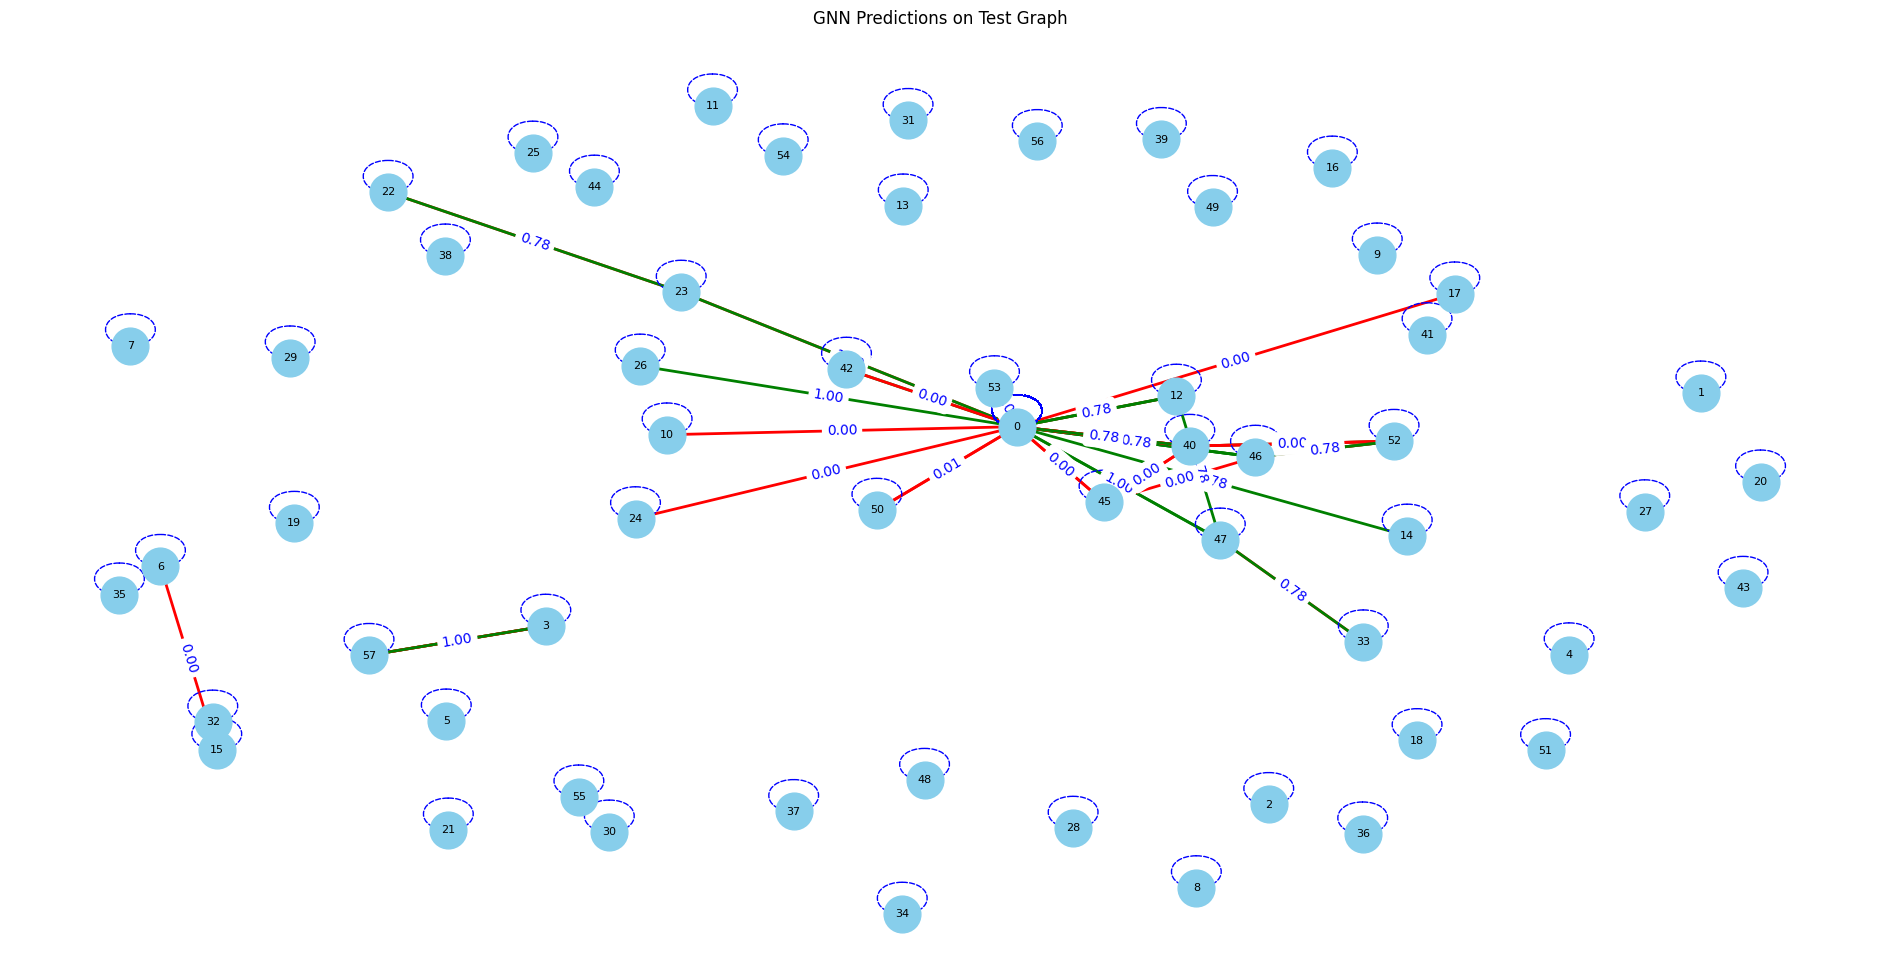

In [142]:
import matplotlib.pyplot as plt
import networkx as nx

# Convert the DGL graph to NetworkX
nx_G = test_graph1.to_networkx().to_undirected()

# Generate layout for the nodes
pos = nx.spring_layout(nx_G, k=0.3, iterations=20)

# Manually scale positions to increase space
for node in pos:
    pos[node] = [pos[node][0] * 2, pos[node][1] * 2]

# Draw the graph
plt.figure(figsize=(24, 12))

# Draw non-self-loop edges
regular_edges = [(u, v) for u, v in nx_G.edges() if u != v]
# Draw self-loop edges separately
self_loops = [(u, v) for u, v in nx_G.edges() if u == v]

# convert predictions to a list for iteration
prediction_list = predictions.tolist()

# Color mapping for regular edges
edge_colors = ['green' if prediction_list[i] == 1 else 'red' for i, (u, v) in enumerate(regular_edges)]

# Draw regular edges using the color mapping
nx.draw_networkx_edges(nx_G, pos, edgelist=regular_edges, edge_color=edge_colors, width=2)

# Draw the nodes
nx.draw_networkx_nodes(nx_G, pos, node_size=700, node_color='skyblue')

# Draw node labels
nx.draw_networkx_labels(nx_G, pos, font_size=8)

for u, v in self_loops:
    # This draws a self-loop with unique style
    nx.draw_networkx_edges(nx_G, pos, edgelist=[(u, v)], edge_color='blue', style='dashed', connectionstyle='arc3,rad=0.2')

# draw edge labels to show prediction scores
edge_labels = dict(((u, v), f"{prob:.2f}") for (u, v), prob in zip(regular_edges, probabilities[:, 1].tolist())) 
nx.draw_networkx_edge_labels(nx_G, pos, edge_labels=edge_labels, font_color='blue')

# Set the title and show the plot
plt.title("GNN Predictions on Test Graph")
plt.axis('off')  # Hide the axes
plt.show()


#### Note: In the above predicted graph, edges marked in green show unrest event probabilities of 0.5 and over while red indicates <0.5 probabilities. The edge weight shows the probability value itself.

In [143]:
endTime = time.time()
print(endTime - startTime)

126.68740129470825
